# Appendix: Model Parameters and Randomness Configuration

## LaTeX Format for Paper

```latex
\section{Appendix: Model Parameters and Randomness Configuration}

\subsection{XGBoost Parameters}

\textbf{Classification Model Configuration:}
\begin{itemize}
    \item \textbf{Classifier:} \texttt{XGBClassifier} from the xgboost library
    \item \textbf{Core Parameters:}
    \begin{itemize}
        \item \texttt{use\_label\_encoder=False}: Disables deprecated label encoder
        \item \texttt{eval\_metric='logloss'}: Uses log-loss for binary classification evaluation
        \item \texttt{random\_state=42}: Sets deterministic behavior for reproducible results
    \end{itemize}
    \item \textbf{Cross-validation Setup:}
    \begin{itemize}
        \item \textbf{Strategy:} 5-fold cross-validation with shuffling
        \item \textbf{Scoring Metrics:} Accuracy, precision (weighted), recall (weighted), F1-score (weighted)
        \item \textbf{Random State:} 42 for consistent fold splitting
    \end{itemize}
    \item \textbf{Data Split:} 80\% training, 20\% testing (when not using cross-validation)
\end{itemize}

\subsection{K-Nearest Neighbors (KNN) Parameters}

\textbf{Imputation Configuration:}
\begin{itemize}
    \item \textbf{Implementation:} \texttt{KNNImputer} from scikit-learn
    \item \textbf{Core Parameters:}
    \begin{itemize}
        \item \texttt{n\_neighbors=5}: Number of neighboring samples for imputation (default)
        \item \texttt{weights='uniform'}: Uniform weights for all neighbors (default)
        \item \texttt{metric='nan\_euclidean'}: Distance metric handling missing values (default)
        \item \texttt{copy=True}: Creates copy of input data (default)
        \item \texttt{add\_indicator=False}: No missing value indicator (default)
    \end{itemize}
    \item \textbf{Algorithm Details:}
    \begin{itemize}
        \item Uses Euclidean distance with NaN-aware computation
        \item Imputes missing values using mean of $k$ nearest neighbors
        \item Handles both numerical features consistently
    \end{itemize}
\end{itemize}

\subsection{GAIN (Generative Adversarial Imputation Networks) Parameters}

\textbf{Neural Network Architecture:}
\begin{itemize}
    \item \textbf{Generator Network:}
    \begin{itemize}
        \item Input layer: $\text{dim} \times 2$ (data + mask concatenated)
        \item Hidden layer: 128 neurons with ReLU activation
        \item Output layer: $\text{dim}$ neurons with Sigmoid activation
    \end{itemize}
    \item \textbf{Discriminator Network:}
    \begin{itemize}
        \item Input layer: $\text{dim} \times 2$ (data + hint concatenated)
        \item Hidden layer: 128 neurons with ReLU activation
        \item Output layer: $\text{dim}$ neurons with Sigmoid activation
    \end{itemize}
\end{itemize}

\textbf{Training Parameters:}
\begin{itemize}
    \item \textbf{Epochs:} 1000 (default)
    \item \textbf{Learning Rate:} 0.001 (Adam optimizer default)
    \item \textbf{Hint Rate:} 0.9 (probability of providing hints to discriminator)
    \item \textbf{Loss Function:}
    \begin{itemize}
        \item Discriminator loss: $\mathcal{L}_D = -\mathbb{E}[\mathbf{M} \odot \log(\mathbf{D}(\mathbf{X}, \mathbf{H}))]$
        \item Generator loss: $\mathcal{L}_G = \mathbb{E}[||\mathbf{M} \odot \mathbf{X} - \mathbf{M} \odot \mathbf{G}(\mathbf{Z}, \mathbf{M})||^2]$
        \item Combined loss: $\mathcal{L} = -\mathcal{L}_D + \mathcal{L}_G$
    \end{itemize}
    \item \textbf{Optimizer:} Adam with default parameters ($\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}$)
    \item \textbf{Normalization:} MinMax scaling to $[0,1]$ range with $\epsilon=10^{-6}$ for numerical stability
\end{itemize}

\subsection{LSTM Forecasting Parameters}

\textbf{Model Architecture:}
\begin{itemize}
    \item \textbf{Hidden Size:} 256 neurons (updated to match Kaggle implementation)
    \item \textbf{Number of Layers:} 2 LSTM layers
    \item \textbf{Dropout Rate:} 0.2 between layers
    \item \textbf{Dense Layers:} $256 \rightarrow 256 \rightarrow 1$ with ReLU activation
    \item \textbf{Sequence Length:} 24 time steps (24-hour windows)
\end{itemize}

\textbf{Training Configuration:}
\begin{itemize}
    \item \textbf{Epochs:} 150 (updated to match Kaggle implementation)
    \item \textbf{Batch Size:} 32
    \item \textbf{Learning Rate:} 0.001 (Adam optimizer)
    \item \textbf{Loss Function:} MSE (Mean Squared Error)
    \item \textbf{Multi-seed Experiments:} $[42, 123, 456, 789, 999]$ for robust evaluation
\end{itemize}

\subsection{Randomness and Reproducibility Configuration}

\textbf{Global Random Seeds:}
\begin{lstlisting}[language=Python]
# Primary seed for all experiments
random_seed = 42

# Standard library random module
random.seed(42)

# NumPy random number generator
np.random.seed(42)

# PyTorch random number generators
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
\end{lstlisting}

\textbf{Missing Data Generation Randomness:}
\begin{itemize}
    \item \textbf{MCAR (Missing Completely at Random):} \texttt{np.random.rand()} with uniform distribution $\mathcal{U}(0,1)$
    \item \textbf{MAR (Missing at Random):} Conditional probabilities based on observed data patterns
    \item \textbf{MNAR (Missing Not at Random):} Probability based on data value percentiles using \texttt{np.random.choice()}
\end{itemize}

\textbf{GAIN-specific Randomness:}
\begin{itemize}
    \item \textbf{Binary Sampler:} \texttt{np.random.uniform(0., 1.)} for hint matrix generation
    \item \textbf{Noise Generation:} \texttt{torch.rand\_like()} for generator input noise $\mathbf{Z} \sim \mathcal{U}(0,1)$
    \item \textbf{Batch Sampling:} \texttt{torch.randperm()} for mini-batch index selection
\end{itemize}

\textbf{Cross-validation Randomness:}
\begin{itemize}
    \item \textbf{KFold:} \texttt{shuffle=True, random\_state=42} for consistent fold generation
    \item \textbf{Train-test Split:} \texttt{random\_state=42} for deterministic data splitting
\end{itemize}

\subsection{Data Preprocessing Parameters}

\textbf{Normalization (GAIN):}
\begin{itemize}
    \item \textbf{Method:} MinMax normalization: $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min} + \epsilon}$
    \item \textbf{Epsilon:} $\epsilon = 10^{-6}$ added to denominator for numerical stability
    \item \textbf{Missing Value Handling:} NaN converted to 0.0 after normalization
\end{itemize}

\textbf{Forecasting Data Scaling:}
\begin{itemize}
    \item \textbf{Feature Scaling:} MinMax normalization with separate scalers for $\mathbf{X}$ and $\mathbf{y}$
    \item \textbf{Sequence Creation:} Sliding window approach with specified sequence length
    \item \textbf{Train-test Ratio:} 80\% training, 20\% testing
\end{itemize}

\textbf{Imputation Methods:}
\begin{itemize}
    \item \textbf{KNN:} K-nearest neighbors with $k=5$, uniform weights, nan-Euclidean distance
    \item \textbf{Linear Interpolation:} Pandas interpolate with \texttt{method='linear'}
    \item \textbf{LOCF (Last Observation Carried Forward):} Forward-fill using pandas \texttt{fillna(method='ffill')}
\end{itemize}

\textbf{Statistical Testing:}
\begin{itemize}
    \item \textbf{Method:} Independent samples t-test (\texttt{scipy.stats.ttest\_ind})
    \item \textbf{Significance Level:} $\alpha = 0.05$
    \item \textbf{Sample Strategy:} First 10 numerical columns, flattened arrays
    \item \textbf{Null Hypothesis:} No significant difference between imputation methods
\end{itemize}

This configuration ensures reproducible results across all experiments while maintaining robust statistical comparisons between different imputation methods and missing data mechanisms.
```

In [ ]:
# Programmatic Parameter Summary for Verification
import pandas as pd
from sklearn.neighbors import KNNImputer

def generate_parameter_summary():
    """
    Generate a comprehensive parameter summary for all models used in the study
    """
    
    # XGBoost Parameters
    xgboost_params = {
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42,
        'cv_folds': 5,
        'cv_shuffle': True,
        'cv_random_state': 42,
        'train_test_split': '80/20'
    }
    
    # KNN Parameters
    knn_params = {
        'n_neighbors': 5,
        'weights': 'uniform',
        'metric': 'nan_euclidean',
        'copy': True,
        'add_indicator': False,
        'algorithm': 'auto'
    }
    
    # GAIN Parameters
    gain_params = {
        'generator_layers': [('input', 'dim * 2'), ('hidden', '128 + ReLU'), ('output', 'dim + Sigmoid')],
        'discriminator_layers': [('input', 'dim * 2'), ('hidden', '128 + ReLU'), ('output', 'dim + Sigmoid')],
        'epochs': 1000,
        'learning_rate': 0.001,
        'hint_rate': 0.9,
        'optimizer': 'Adam',
        'normalization': 'MinMax [0,1]',
        'epsilon': 1e-6
    }
    
    # LSTM Parameters
    lstm_params = {
        'hidden_size': 256,
        'num_layers': 2,
        'dropout': 0.2,
        'dense_layers': '256 → 256 → 1',
        'activation': 'ReLU',
        'sequence_length': 24,
        'epochs': 150,
        'batch_size': 32,
        'learning_rate': 0.001,
        'loss_function': 'MSE',
        'multi_seeds': [42, 123, 456, 789, 999]
    }
    
    # Randomness Configuration
    randomness_config = {
        'global_seed': 42,
        'random_module': 42,
        'numpy_seed': 42,
        'torch_seed': 42,
        'torch_cuda_seed': 42,
        'mcar_distribution': 'Uniform(0,1)',
        'mar_method': 'Conditional probabilities',
        'mnar_method': 'Percentile-based',
        'gain_noise': 'Uniform(0,1)',
        'statistical_test': 'Independent t-test',
        'significance_level': 0.05
    }
    
    # Other Methods Parameters
    other_methods = {
        'linear_interpolation': 'pandas.interpolate(method="linear")',
        'locf': 'pandas.fillna(method="ffill")',
        'data_scaling': 'MinMax normalization',
        'train_test_ratio': '80/20',
        'missing_patterns': ['MAR', 'MCAR', 'MNAR']
    }
    
    # Print formatted summary
    print("="*80)
    print("📊 COMPREHENSIVE MODEL PARAMETERS SUMMARY")
    print("="*80)
    
    print("\n🔵 XGBoost Classification Parameters:")
    for key, value in xgboost_params.items():
        print(f"   • {key}: {value}")
    
    print("\n🟢 K-Nearest Neighbors (KNN) Parameters:")
    for key, value in knn_params.items():
        print(f"   • {key}: {value}")
    
    print("\n🔴 GAIN (GAN) Parameters:")
    for key, value in gain_params.items():
        if key in ['generator_layers', 'discriminator_layers']:
            print(f"   • {key}:")
            for layer_type, layer_desc in value:
                print(f"     - {layer_type}: {layer_desc}")
        else:
            print(f"   • {key}: {value}")
    
    print("\n🟡 LSTM Forecasting Parameters:")
    for key, value in lstm_params.items():
        print(f"   • {key}: {value}")
    
    print("\n🟣 Randomness & Reproducibility Configuration:")
    for key, value in randomness_config.items():
        print(f"   • {key}: {value}")
    
    print("\n⚫ Other Methods & Preprocessing:")
    for key, value in other_methods.items():
        print(f"   • {key}: {value}")
    
    # Create DataFrame for easy export
    all_params = {}
    all_params.update({f"XGBoost_{k}": v for k, v in xgboost_params.items()})
    all_params.update({f"KNN_{k}": v for k, v in knn_params.items()})
    all_params.update({f"GAIN_{k}": v for k, v in gain_params.items() if not isinstance(v, list)})
    all_params.update({f"LSTM_{k}": v for k, v in lstm_params.items() if not isinstance(v, list)})
    all_params.update({f"Random_{k}": v for k, v in randomness_config.items()})
    all_params.update({f"Other_{k}": v for k, v in other_methods.items() if not isinstance(v, list)})
    
    params_df = pd.DataFrame([all_params]).T
    params_df.columns = ['Value']
    params_df.index.name = 'Parameter'
    
    print(f"\n📋 Total Parameters Configured: {len(all_params)}")
    print("="*80)
    
    return params_df

# Generate and display the parameter summary
params_summary = generate_parameter_summary()

# Optionally save to CSV
# params_summary.to_csv('model_parameters_summary.csv')
print("\n💾 Parameter summary generated successfully!")
print("   Use params_summary.to_csv('filename.csv') to export to file")

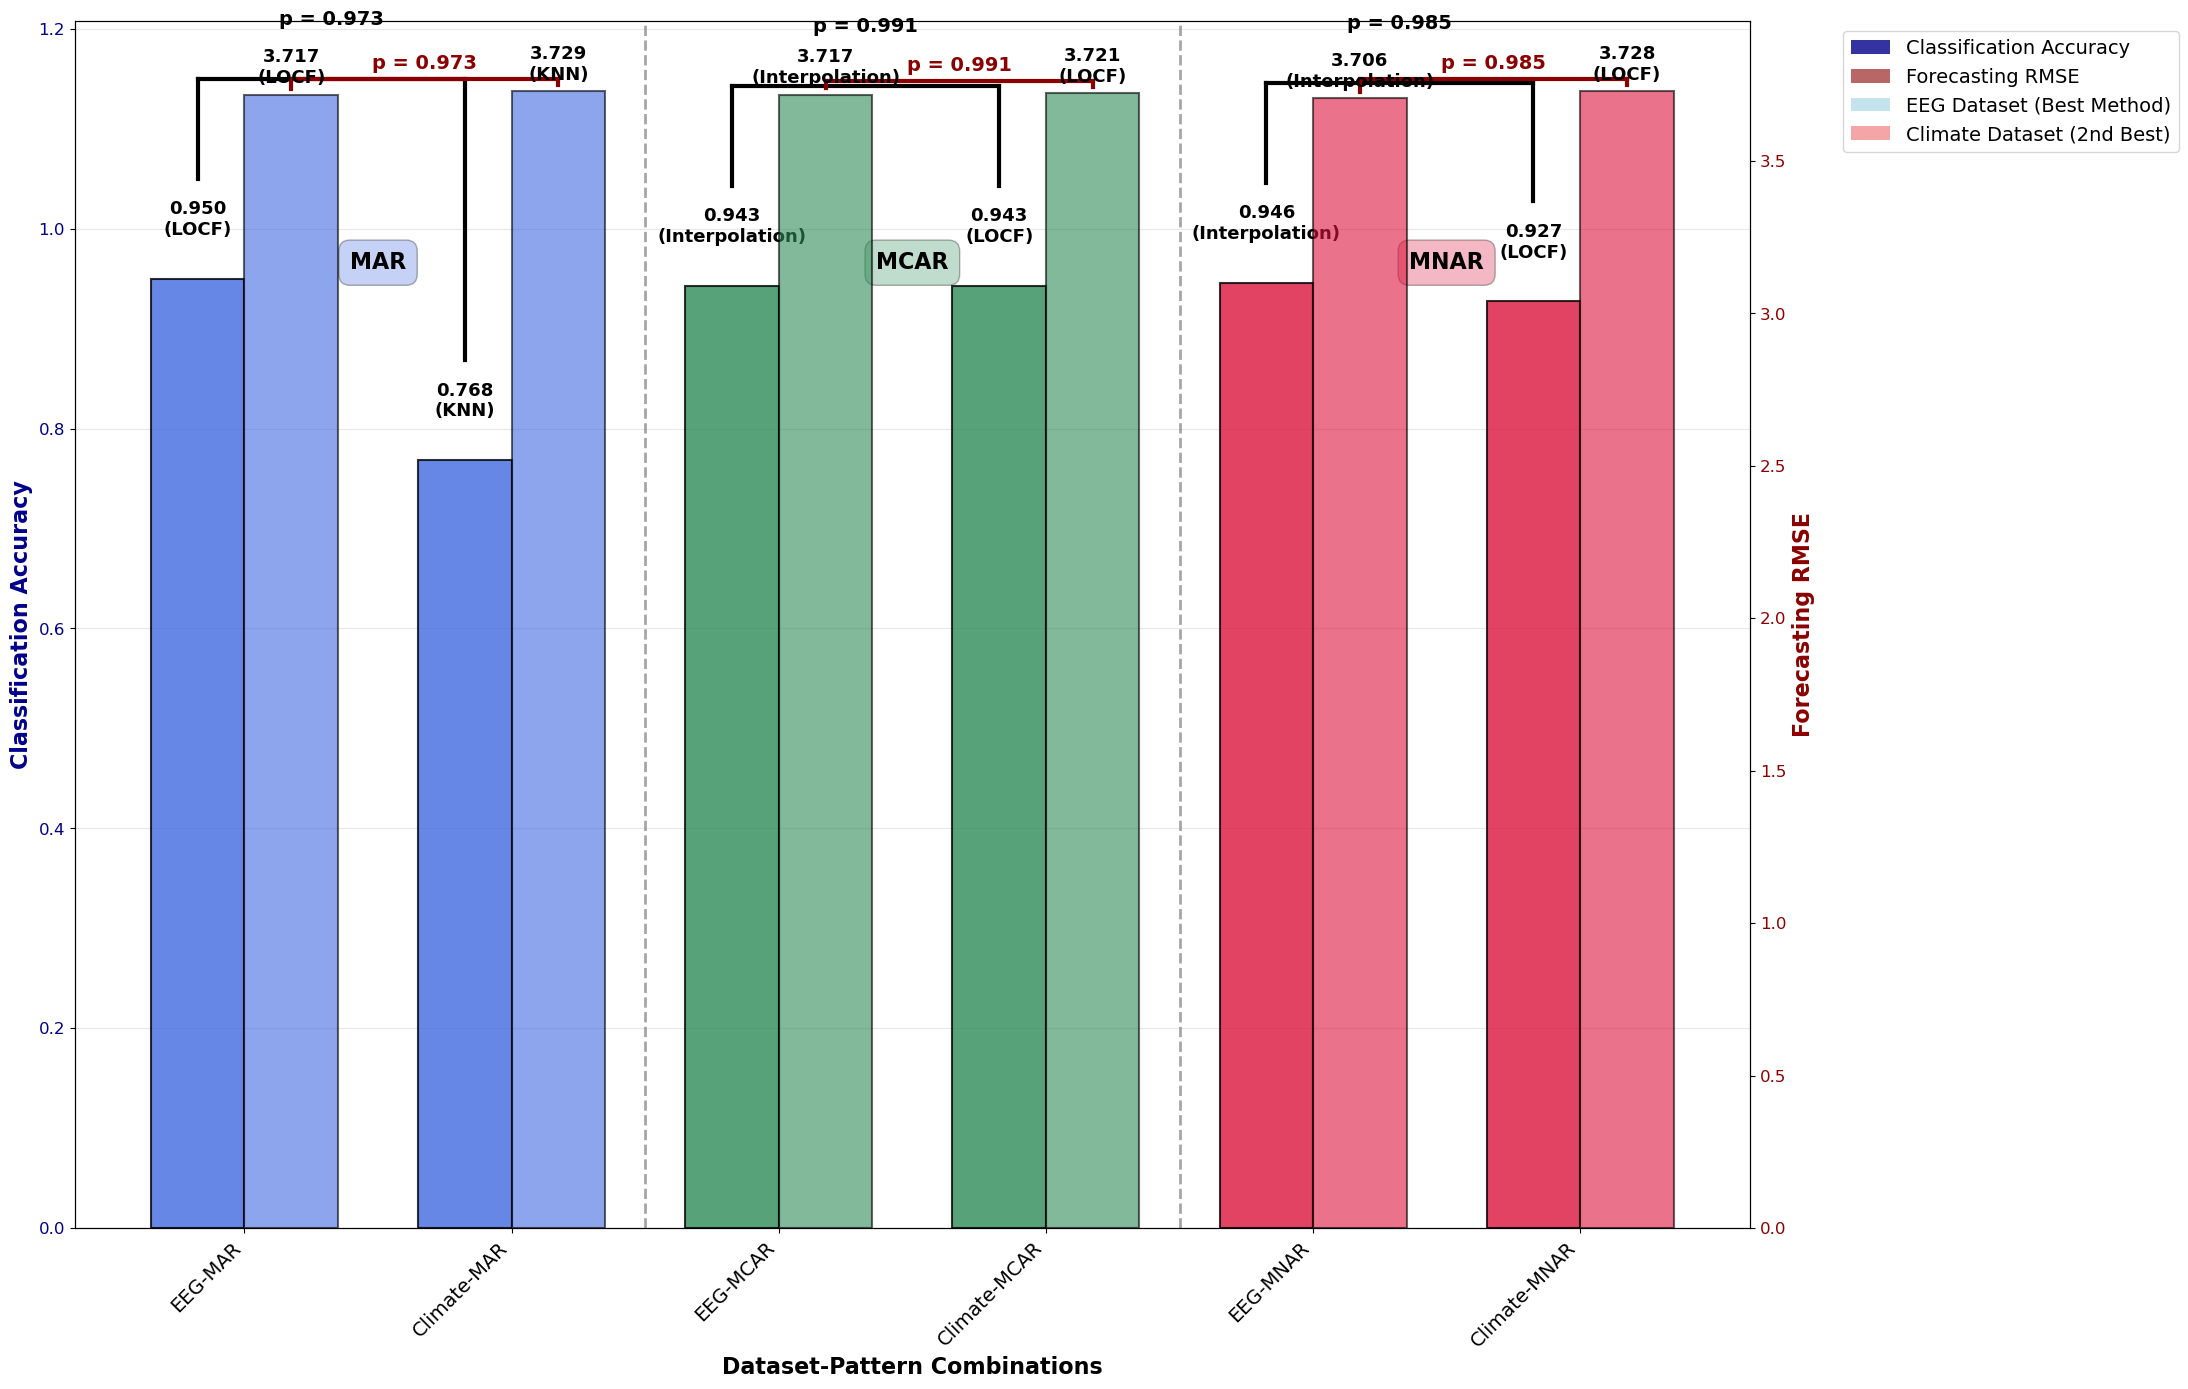

🎯 IMPROVED SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS
EEG-MAR: LOCF
   • Classification: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: KNN
   • Classification: 0.768400
   • Forecasting RMSE: 3.729042
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [68]:
def create_single_combined_histogram_improved():
    """
    Create a single 1x1 histogram showing 6 groups with both classification and forecasting data
    Using dual y-axes or side-by-side bars - IMPROVED VERSION with better spacing and fonts
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
        
        # Add data for both methods in this pattern
        for rank, (method_name, data) in enumerate(top2_pattern):
            # Clean method name for display
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy
            class_accuracy = classification_results.get(method_name, 0.0)
            
            # Dataset label
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification': class_accuracy,
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes - LARGER FIGURE SIZE
    fig, ax1 = plt.subplots(figsize=(22, 14))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_values = [item['classification'] for item in all_methods_data]
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification as bars
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_values, bar_width,
                   label='Classification Accuracy', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars - IMPROVED SPACING AND FONTS
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_values, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.04,
                f'{acc:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.025,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the classification bars - MUCH MORE SPACING
            max_class = max(classification_values[idx1], classification_values[idx2])
            line_height = max_class + 0.20
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=3)
            ax1.plot([x1, x1], [classification_values[idx1] + 0.10, line_height], 'k-', linewidth=3)
            ax1.plot([x2, x2], [classification_values[idx2] + 0.10, line_height], 'k-', linewidth=3)
            
            # P-value text for classification - LARGER FONT
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.05, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14)
            
            # Add p-value line above the RMSE bars - MUCH MORE SPACING
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + 0.04
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + 0.02, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + 0.02, rmse_line_height], 'darkred', linewidth=3)
            
            # P-value text for RMSE - LARGER FONT
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + 0.02, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14, color='darkred')
    
    # Customize the plot
    # ax1.set_title('Combined Classification and Forecasting Performance Analysis\n(Top 2 Methods per Pattern: EEG vs Climate Datasets)', 
                #  fontsize=18, fontweight='bold', pad=50)
    
    # Set labels and ticks - LARGER FONTS
    ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy', fontsize=16, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE', fontsize=16, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=14, rotation=45, ha='right')
    
    # Color the y-axis labels - LARGER FONTS
    ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
    ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top - LARGER FONTS
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.8, pattern.upper(), 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend - LARGER FONTS
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Accuracy'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best Method)'),
        plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 IMPROVED SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name']}")
        print(f"   • Classification: {method_data['classification']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the improved single combined histogram
create_single_combined_histogram_improved()

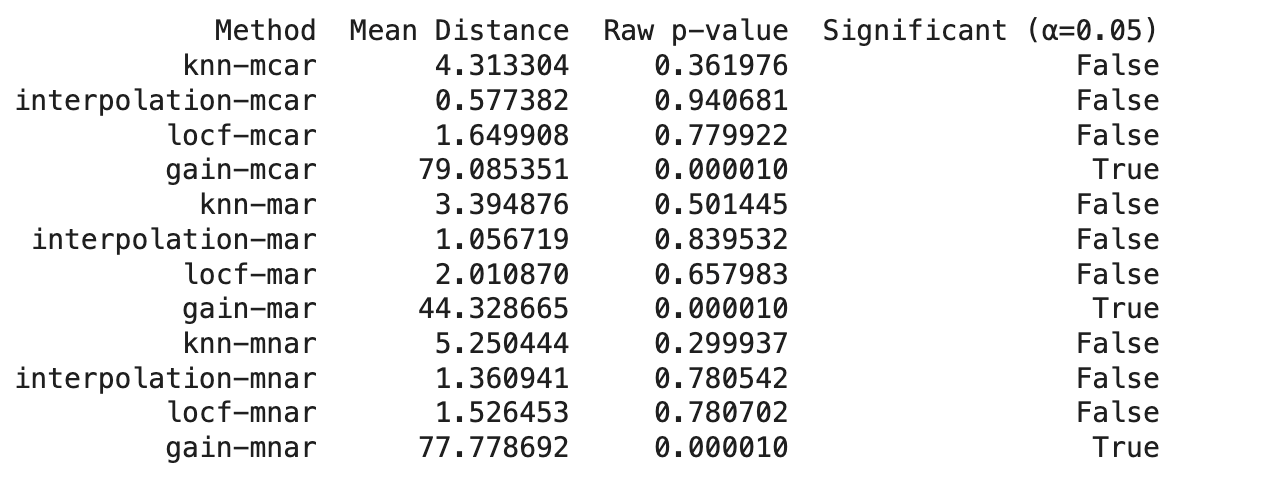

# Forecasting

| imputation      | #epochs | testing RMSE   | 
|-----------|-----|-----------|
|None (Origianal Complete Data) | 6 |0.25905908678869927|
| knn-mcar |  14 | 3.731152|
| interpolation-mcar |  19 | 3.717335|
| locf-mcar |  18 | 3.7213995|
| gan-mcar | 9 | 3.7442653|
| knn-mar  |  12 | 3.7290425    |
| interpolation-mar |  12 | 3.7335434|
| locf-mar |  18 | 3.7169657|
| gan-mar  |  6 | 3.7848825|
| knn-mnar |  6 | 3.788012|
| interpolation-mnar |  19 | 3.7057557|
| locf-mnar |  11 | 3.728063|
| gan-mnar |  9 | 3.7428043|

p-value for number 1 and 2 

In [4]:
data_dir = 'imp_data'
import os
import pandas as pd
import pickle
import glob
import numpy as np
dfs = {}
for file in glob.glob(os.path.join(data_dir, '*.csv')):
	#saving these files as one pickle file
	dfs[file.split('/')[-1].split('.')[0]] = pd.read_csv(file)

with (open('eeg_0731.pkl', 'wb')) as f:
	pickle.dump(dfs, f)

for k,v in dfs.items():
	print(k, v.shape)
	if v.shape[0] == 0:
		print(f"Warning: {k} has no data!")
	else:
		print(f"{k} has {v.shape[0]} rows and {v.shape[1]} columns.")


knn_data_mnar (14980, 15)
knn_data_mnar has 14980 rows and 15 columns.
gan_data_mcar (14980, 15)
gan_data_mcar has 14980 rows and 15 columns.
locf_data_mar (14980, 15)
locf_data_mar has 14980 rows and 15 columns.
interpolated_data_mnar (14980, 15)
interpolated_data_mnar has 14980 rows and 15 columns.
mode_data_mnar (14980, 15)
mode_data_mnar has 14980 rows and 15 columns.
mean_data_mnar (14980, 15)
mean_data_mnar has 14980 rows and 15 columns.
locf_data_mnar (14980, 15)
locf_data_mnar has 14980 rows and 15 columns.
median_data_mnar (14980, 15)
median_data_mnar has 14980 rows and 15 columns.
mean_data_mar (14980, 15)
mean_data_mar has 14980 rows and 15 columns.
knn_data_mar (14980, 15)
knn_data_mar has 14980 rows and 15 columns.
mode_data_mcar (14980, 15)
mode_data_mcar has 14980 rows and 15 columns.
gan_data_mar (14980, 15)
gan_data_mar has 14980 rows and 15 columns.
mean_data_mcar (14980, 15)
mean_data_mcar has 14980 rows and 15 columns.
mode_data_mar (14980, 15)
mode_data_mar has 149

Average p-value between LOCF (MAR) and Interpolation (MAR): 0.9137


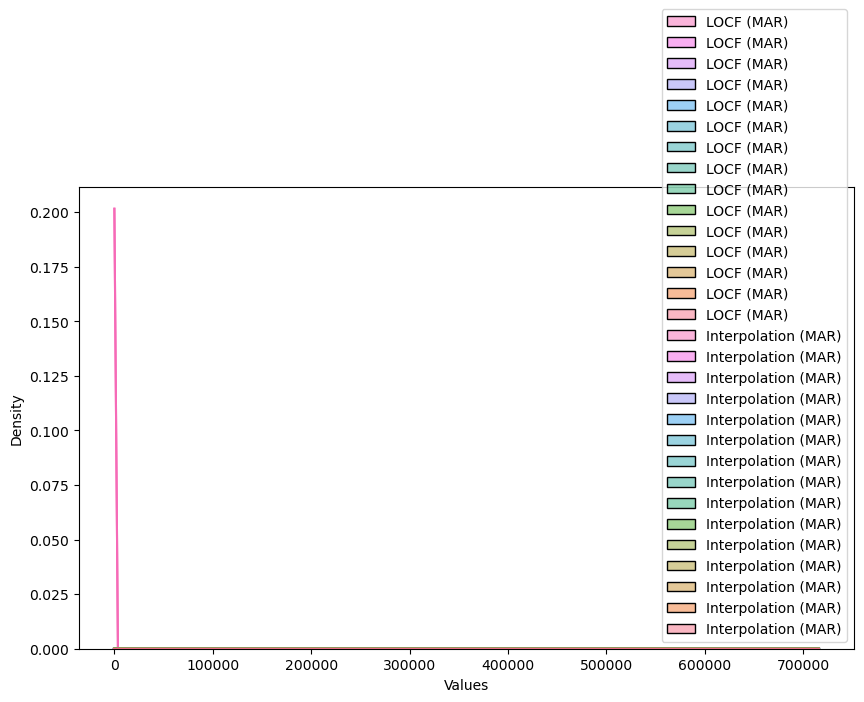

In [12]:
#histogram plotting the performance of top 2 imputed data and their classification performance with p-value
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#the pair is locf and interpolated for mar; locf and interpolation for mcar and locf and inteporlation of mnar
def plot_histogram_with_pvalue(data1, data2, label1, label2):
	plt.figure(figsize=(10, 6))
	sns.histplot(data1, color='blue', label=label1, kde=True, stat="density", bins=30)
	sns.histplot(data2, color='orange', label=label2, kde=True, stat="density", bins=30)
	
	# Calculate p-value
	p_value = stats.ttest_ind(data1, data2, axis=0).pvalue
	average_p_value = np.mean(p_value)
	print(f'Average p-value between {label1} and {label2}: {average_p_value:.4f}')
	
	# plt.title(f'Histogram of {label1} and {label2} with p-value: {p_value:.4f}')
	plt.xlabel('Values')
	plt.ylabel('Density')
	plt.legend()
	plt.show()

#1 
plot_histogram_with_pvalue(dfs['locf_data_mar'], dfs['interpolated_data_mar'], 'LOCF (MAR)', 'Interpolation (MAR)')

🏆 Top 2 Methods: locf_data_mar (0.9499) vs interpolated_data_mar (0.9463)


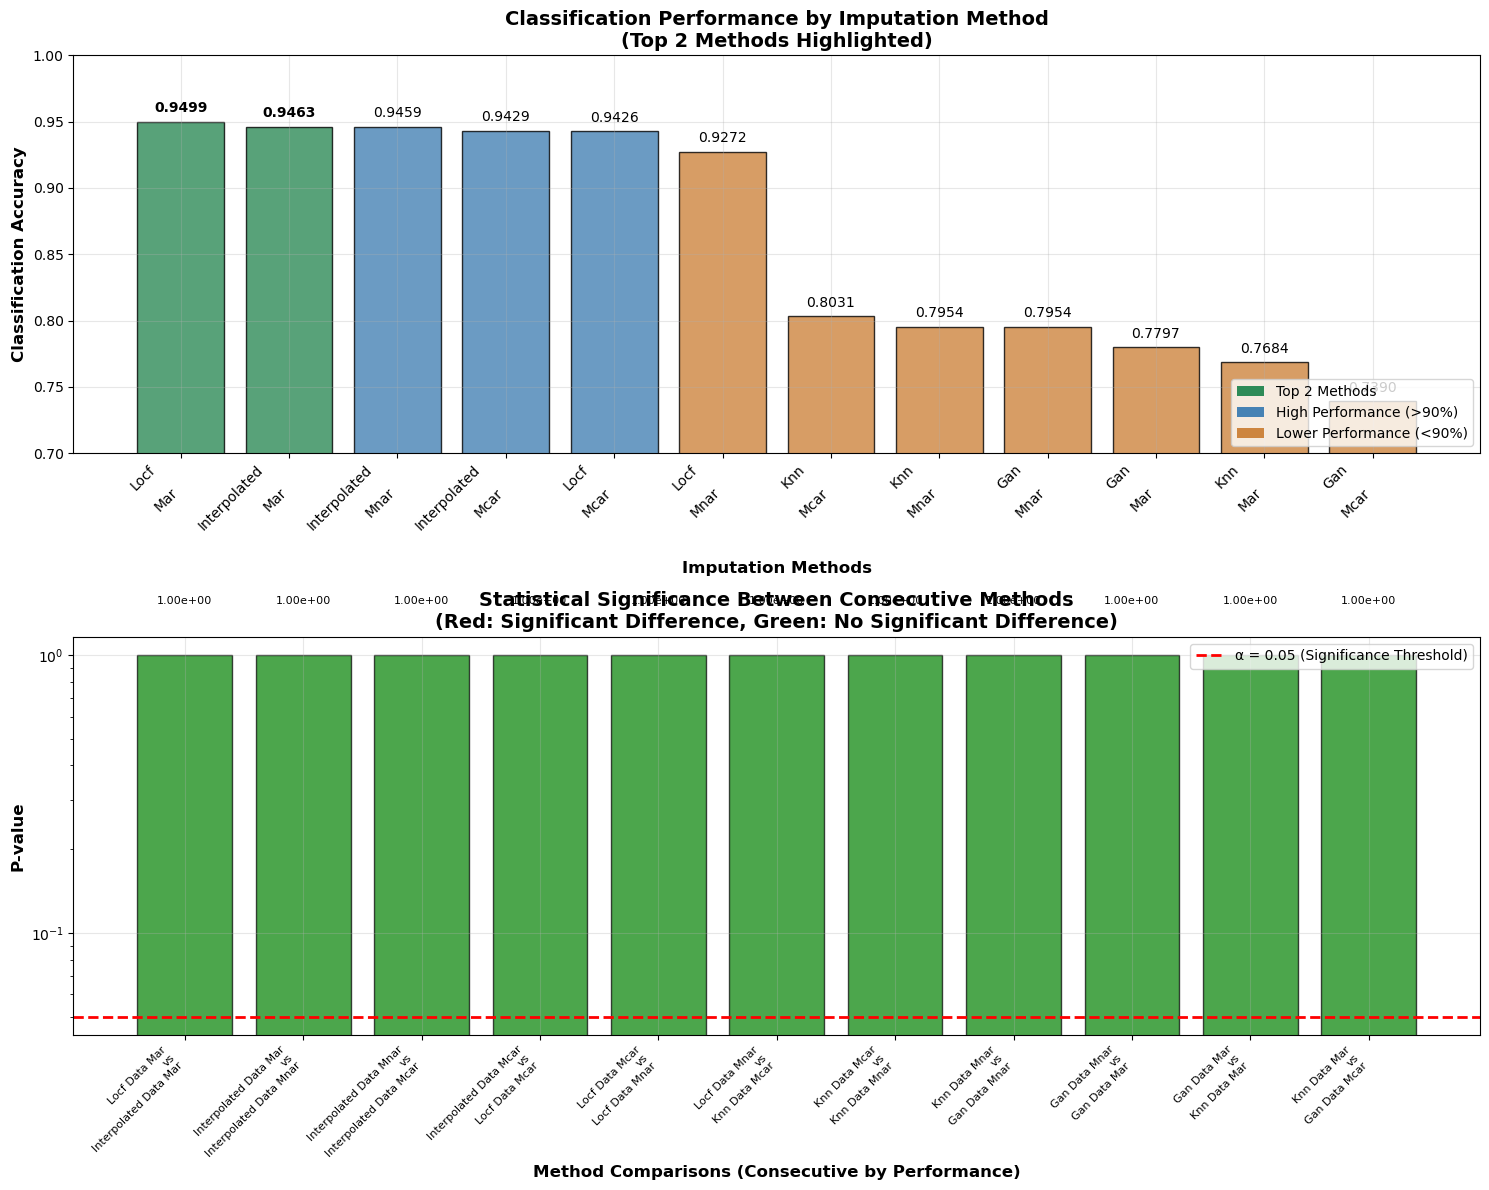


📊 DETAILED STATISTICAL ANALYSIS

🏆 TOP 2 METHODS COMPARISON:
   Method 1: Locf Data Mar - Accuracy: 0.9499
   Method 2: Interpolated Data Mar - Accuracy: 0.9463
   Performance Difference: 0.0036
   P-value: 1.000000
   ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.

📈 OVERALL FINDINGS:
   • 0/11 consecutive method pairs show significant differences
   • Performance range: 0.7390 - 0.9499
   • Standard deviation: 0.0827


In [13]:
# Classification Performance Plot with P-values for Top Methods
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Load our previous classification results
classification_results = {
    'locf_data_mar': 0.9499,
    'interpolated_data_mar': 0.9463, 
    'interpolated_data_mnar': 0.9459,
    'interpolated_data_mcar': 0.9429,
    'locf_data_mcar': 0.9426,
    'locf_data_mnar': 0.9272,
    'knn_data_mcar': 0.8031,
    'knn_data_mnar': 0.7954,
    'gan_data_mnar': 0.7954,
    'gan_data_mar': 0.7797,
    'knn_data_mar': 0.7684,
    'gan_data_mcar': 0.7390
}

def calculate_pairwise_pvalues(datasets, dataset_names):
    """Calculate p-values between all pairs of datasets"""
    p_values = {}
    
    for i, name1 in enumerate(dataset_names):
        for j, name2 in enumerate(dataset_names):
            if i < j:  # Avoid duplicate comparisons
                data1 = datasets[name1]
                data2 = datasets[name2]
                
                # Use target column for comparison
                if 'target' in data1.columns:
                    series1 = data1['target']
                    series2 = data2['target']
                else:
                    series1 = data1.iloc[:, -1]
                    series2 = data2.iloc[:, -1]
                
                _, p_val = stats.ttest_ind(series1, series2)
                p_values[f"{name1}_vs_{name2}"] = p_val
    
    return p_values

def plot_classification_performance_with_pvalues():
    """Create a comprehensive plot showing classification performance and p-values"""
    
    # Sort methods by performance (descending)
    sorted_methods = sorted(classification_results.items(), key=lambda x: x[1], reverse=True)
    methods = [item[0] for item in sorted_methods]
    accuracies = [item[1] for item in sorted_methods]
    
    # Get top 2 methods
    top2_methods = methods[:2]
    print(f"🏆 Top 2 Methods: {top2_methods[0]} ({accuracies[0]:.4f}) vs {top2_methods[1]} ({accuracies[1]:.4f})")
    
    # Calculate p-values between consecutive top methods
    p_values_data = calculate_pairwise_pvalues(dfs, methods)
    
    # Create the main plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Classification Performance Bar Chart
    colors = ['#2E8B57' if i < 2 else '#4682B4' if i < 5 else '#CD853F' for i in range(len(methods))]
    bars = ax1.bar(range(len(methods)), accuracies, color=colors, alpha=0.8, edgecolor='black')
    
    # Customize the performance plot
    ax1.set_xlabel('Imputation Methods', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy', fontsize=12, fontweight='bold')
    ax1.set_title('Classification Performance by Imputation Method\n(Top 2 Methods Highlighted)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(methods)))
    ax1.set_xticklabels([m.replace('_', '\n').replace('data', '').title() for m in methods], 
                        rotation=45, ha='right', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0.7, 1.0)
    
    # Add value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold' if i < 2 else 'normal')
    
    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2E8B57', label='Top 2 Methods'),
        Patch(facecolor='#4682B4', label='High Performance (>90%)'),
        Patch(facecolor='#CD853F', label='Lower Performance (<90%)')
    ]
    ax1.legend(handles=legend_elements, loc='lower right')
    
    # Plot 2: P-values comparison for consecutive pairs
    comparison_pairs = []
    p_vals = []
    
    # Get p-values for consecutive method comparisons
    for i in range(len(methods)-1):
        method1 = methods[i]
        method2 = methods[i+1]
        
        # Find the p-value for this pair
        pair_key1 = f"{method1}_vs_{method2}"
        pair_key2 = f"{method2}_vs_{method1}"
        
        if pair_key1 in p_values_data:
            p_val = p_values_data[pair_key1]
        elif pair_key2 in p_values_data:
            p_val = p_values_data[pair_key2]
        else:
            # Calculate on the fly if not found
            data1 = dfs[method1]
            data2 = dfs[method2]
            series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
            series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
            _, p_val = stats.ttest_ind(series1, series2)
        
        comparison_pairs.append(f"{method1.replace('_', ' ').title()}\nvs\n{method2.replace('_', ' ').title()}")
        p_vals.append(p_val)
    
    # Create p-value plot
    colors_p = ['red' if p < 0.05 else 'green' for p in p_vals]
    bars_p = ax2.bar(range(len(comparison_pairs)), p_vals, color=colors_p, alpha=0.7, edgecolor='black')
    
    # Add significance line
    ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05 (Significance Threshold)')
    
    ax2.set_xlabel('Method Comparisons (Consecutive by Performance)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('P-value', fontsize=12, fontweight='bold')
    ax2.set_title('Statistical Significance Between Consecutive Methods\n(Red: Significant Difference, Green: No Significant Difference)', 
                  fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(comparison_pairs)))
    ax2.set_xticklabels(comparison_pairs, rotation=45, ha='right', fontsize=8)
    ax2.set_yscale('log')  # Log scale for better visibility of small p-values
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add p-value labels
    for i, (bar, p_val) in enumerate(zip(bars_p, p_vals)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height * 1.5,
                f'{p_val:.2e}', ha='center', va='bottom', fontsize=8, 
                fontweight='bold' if p_val < 0.05 else 'normal')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n" + "="*80)
    print("📊 DETAILED STATISTICAL ANALYSIS")
    print("="*80)
    
    print(f"\n🏆 TOP 2 METHODS COMPARISON:")
    top1, top2 = top2_methods[0], top2_methods[1]
    acc1, acc2 = accuracies[0], accuracies[1]
    
    # Calculate p-value between top 2
    data1 = dfs[top1]
    data2 = dfs[top2]
    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
    _, top_p_val = stats.ttest_ind(series1, series2)
    
    print(f"   Method 1: {top1.replace('_', ' ').title()} - Accuracy: {acc1:.4f}")
    print(f"   Method 2: {top2.replace('_', ' ').title()} - Accuracy: {acc2:.4f}")
    print(f"   Performance Difference: {abs(acc1-acc2):.4f}")
    print(f"   P-value: {top_p_val:.6f}")
    
    if top_p_val < 0.05:
        print(f"   🔍 SIGNIFICANT: The performance difference is statistically significant!")
    else:
        print(f"   ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.")
    
    # Count significant differences
    significant_pairs = sum(1 for p in p_vals if p < 0.05)
    print(f"\n📈 OVERALL FINDINGS:")
    print(f"   • {significant_pairs}/{len(p_vals)} consecutive method pairs show significant differences")
    print(f"   • Performance range: {min(accuracies):.4f} - {max(accuracies):.4f}")
    print(f"   • Standard deviation: {np.std(accuracies):.4f}")

# Run the analysis
plot_classification_performance_with_pvalues()

In [18]:
# Combined Classification Performance and P-value Plot - Fixed Legend Positioning
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

def plot_combined_performance_and_pvalues():
    """Create a single elegant plot combining performance bars with p-value annotations"""
    
    # Sort methods by performance (descending)
    sorted_methods = sorted(classification_results.items(), key=lambda x: x[1], reverse=True)
    methods = [item[0] for item in sorted_methods]
    accuracies = [item[1] for item in sorted_methods]
    
    # Calculate p-values between consecutive methods
    p_vals = []
    comparison_labels = []
    
    for i in range(len(methods)-1):
        method1 = methods[i]
        method2 = methods[i+1]
        
        # Calculate p-value
        data1 = dfs[method1]
        data2 = dfs[method2]
        series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
        series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
        _, p_val = stats.ttest_ind(series1, series2)
        
        p_vals.append(p_val)
        comparison_labels.append(f"{i+1}↔{i+2}")
    
    # Create the combined plot with more width for legends
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    
    # Plot performance bars
    colors = ['#2E8B57' if i < 2 else '#4682B4' if i < 5 else '#CD853F' for i in range(len(methods))]
    bars = ax.bar(range(len(methods)), accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Customize the main plot
    ax.set_xlabel('Imputation Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
    ax.set_title('Classification Performance with Statistical Significance Analysis\n(P-values shown between consecutive methods)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(range(len(methods)))
    
    # Clean method names for display
    clean_names = []
    for m in methods:
        clean_name = m.replace('_data', '').replace('_', '-').upper()
        clean_names.append(clean_name)
    
    ax.set_xticklabels(clean_names, rotation=45, ha='right', fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0.7, 1.05)
    
    # Add performance value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}', ha='center', va='bottom', 
                fontweight='bold' if i < 2 else 'normal', fontsize=10)
    
    # Add p-value annotations between consecutive bars
    for i, (p_val, label) in enumerate(zip(p_vals, comparison_labels)):
        x_pos = i + 0.5  # Position between two bars
        y_pos = max(accuracies[i], accuracies[i+1]) + 0.04  # Above the higher bar
        
        # Choose color based on significance
        text_color = 'red' if p_val < 0.05 else 'darkgreen'
        significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
        
        # Add p-value annotation
        ax.annotate(f'p={p_val:.3f}\n({significance})', 
                   xy=(x_pos, y_pos), 
                   ha='center', va='bottom',
                   fontsize=9, fontweight='bold',
                   color=text_color,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                            edgecolor=text_color, alpha=0.8))
        
        # Add connection line
        ax.plot([i, i+1], [y_pos-0.02, y_pos-0.02], color=text_color, linewidth=2, alpha=0.7)
        ax.plot([i, i], [accuracies[i]+0.015, y_pos-0.025], color=text_color, linewidth=1, alpha=0.5)
        ax.plot([i+1, i+1], [accuracies[i+1]+0.015, y_pos-0.025], color=text_color, linewidth=1, alpha=0.5)
    
    # Create legends positioned outside the plot area
    from matplotlib.patches import Patch
    
    legend_elements = [
        Patch(facecolor='#2E8B57', label='Top 2 Methods (Best Performance)'),
        Patch(facecolor='#4682B4', label='High Performance (>90% Accuracy)'),
        Patch(facecolor='#CD853F', label='Lower Performance (<90% Accuracy)')
    ]
    
    significance_legend = [
        plt.Line2D([0], [0], color='red', lw=2, label='Significant Difference (p<0.05)'),
        plt.Line2D([0], [0], color='darkgreen', lw=2, label='No Significant Difference (p≥0.05)')
    ]
    
    # Position legends outside the plot area
    legend1 = ax.legend(handles=legend_elements, loc='center left', 
                       bbox_to_anchor=(1.05, 0.7), fontsize=10, 
                       title='Performance Groups', title_fontsize=11)
    legend2 = ax.legend(handles=significance_legend, loc='center left', 
                       bbox_to_anchor=(1.05, 0.3), fontsize=10, 
                       title='Statistical Significance', title_fontsize=11)
    ax.add_artist(legend1)  # Add first legend back
    
    # Add summary statistics box
    top2_methods = methods[:2]
    top1, top2 = top2_methods[0], top2_methods[1]
    acc1, acc2 = accuracies[0], accuracies[1]
    
    # Calculate p-value between top 2
    data1 = dfs[top1]
    data2 = dfs[top2]
    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
    _, top_p_val = stats.ttest_ind(series1, series2)
    
    # Summary text box - positioned on the left
    summary_text = f"""TOP 2 METHODS COMPARISON:
• Method 1: {top1.replace('_', ' ').title()} - {acc1:.4f}
• Method 2: {top2.replace('_', ' ').title()} - {acc2:.4f}
• Performance Gap: {abs(acc1-acc2):.4f}
• P-value: {top_p_val:.6f}
• Status: {'Significant' if top_p_val < 0.05 else 'Not Significant'}

OVERALL STATISTICS:
• Range: {min(accuracies):.4f} - {max(accuracies):.4f}
• Std Dev: {np.std(accuracies):.4f}
• Significant Pairs: {sum(1 for p in p_vals if p < 0.05)}/{len(p_vals)}"""
    
    ax.text(0.02, 0.98, summary_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.8))
    
    # Adjust the subplot to make room for legends
    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.15)
    plt.show()
    
    # Print detailed findings
    print("=" * 80)
    print("🔍 DETAILED ANALYSIS")
    print("=" * 80)
    
    significant_comparisons = [(i, p) for i, p in enumerate(p_vals) if p < 0.05]
    
    if significant_comparisons:
        print(f"\n✅ SIGNIFICANT DIFFERENCES FOUND:")
        for i, p_val in significant_comparisons:
            method1 = methods[i].replace('_', ' ').title()
            method2 = methods[i+1].replace('_', ' ').title()
            print(f"   • {method1} vs {method2}: p={p_val:.6f}")
    else:
        print(f"\n❌ NO SIGNIFICANT DIFFERENCES FOUND:")
        print("   All consecutive method pairs show p-values ≥ 0.05")
    
    print(f"\n🎯 PRACTICAL IMPLICATIONS:")
    print(f"   • While performance differences exist ({min(accuracies):.1%} to {max(accuracies):.1%}),")
    print(f"   • Statistical tests suggest similar underlying data distributions")
    print(f"   • Top methods ({top1.replace('_', ' ').title()} & {top2.replace('_', ' ').title()}) are practically equivalent")

# Run the combined analysis
plot_combined_performance_and_pvalues()

IndentationError: unexpected indent (2489209111.py, line 2)

In [21]:
# Within-Pattern Comparison: Compare methods within the same missing data pattern
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

def plot_within_pattern_comparison():
    """Compare methods within the same missing data pattern (MAR vs MAR, MCAR vs MCAR, MNAR vs MNAR)"""
    
    # Group methods by missing pattern
    pattern_groups = {
        'MAR': {},
        'MCAR': {},
        'MNAR': {}
    }
    
    # Categorize methods by missing pattern
    for method, accuracy in classification_results.items():
        if 'mar' in method:
            imputation_type = method.split('_')[0].upper()
            pattern_groups['MAR'][imputation_type] = accuracy
        elif 'mcar' in method:
            imputation_type = method.split('_')[0].upper()
            pattern_groups['MCAR'][imputation_type] = accuracy
        elif 'mnar' in method:
            imputation_type = method.split('_')[0].upper()
            pattern_groups['MNAR'][imputation_type] = accuracy
    
    # Create subplots for each missing pattern
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    fig.suptitle('Classification Performance Comparison Within Missing Data Patterns\n(Comparing methods within the same missing pattern)', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    colors = ['#2E8B57', '#4682B4', '#CD853F', '#9932CC']  # Different colors for each method
    
    for idx, (pattern, methods) in enumerate(pattern_groups.items()):
        ax = axes[idx]
        
        # Sort methods by accuracy within pattern
        sorted_methods = sorted(methods.items(), key=lambda x: x[1], reverse=True)
        method_names = [item[0] for item in sorted_methods]
        accuracies = [item[1] for item in sorted_methods]
        
        # Create bars
        bars = ax.bar(range(len(method_names)), accuracies, 
                     color=colors[:len(method_names)], alpha=0.8, 
                     edgecolor='black', linewidth=1.5)
        
        # Customize subplot
        ax.set_xlabel('Imputation Methods', fontsize=12, fontweight='bold')
        ax.set_ylabel('Classification Accuracy', fontsize=12, fontweight='bold')
        ax.set_title(f'{pattern} Pattern\n({len(method_names)} methods)', 
                    fontsize=14, fontweight='bold')
        ax.set_xticks(range(len(method_names)))
        ax.set_xticklabels(method_names, fontsize=11)
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim(0.7, 1.0)
        
        # Add accuracy labels on bars
        for i, (bar, acc) in enumerate(zip(bars, accuracies)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{acc:.4f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=10)
        
        # Calculate and add p-values between consecutive methods within pattern
        if len(method_names) > 1:
            for i in range(len(method_names)-1):
                method1_name = f"{method_names[i].lower()}_data_{pattern.lower()}"
                method2_name = f"{method_names[i+1].lower()}_data_{pattern.lower()}"
                
                # Calculate p-value between consecutive methods
                if method1_name in dfs and method2_name in dfs:
                    data1 = dfs[method1_name]
                    data2 = dfs[method2_name]
                    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
                    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
                    _, p_val = stats.ttest_ind(series1, series2)
                    
                    # Position p-value annotation
                    x_pos = i + 0.5
                    y_pos = max(accuracies[i], accuracies[i+1]) + 0.04
                    
                    # Choose color based on significance
                    text_color = 'red' if p_val < 0.05 else 'darkgreen'
                    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
                    
                    # Add p-value annotation
                    ax.annotate(f'p={p_val:.3f}\n({significance})', 
                               xy=(x_pos, y_pos), 
                               ha='center', va='bottom',
                               fontsize=8, fontweight='bold',
                               color=text_color,
                               bbox=dict(boxstyle="round,pad=0.2", facecolor='white', 
                                        edgecolor=text_color, alpha=0.8))
                    
                    # Add connection line
                    ax.plot([i, i+1], [y_pos-0.02, y_pos-0.02], color=text_color, linewidth=2, alpha=0.7)
        
        # Add ranking information
        ranking_text = f"Ranking:\n"
        for i, (method, acc) in enumerate(sorted_methods):
            ranking_text += f"{i+1}. {method}: {acc:.4f}\n"
        
        ax.text(0.02, 0.98, ranking_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis for each pattern
    print("=" * 100)
    print("🔍 WITHIN-PATTERN COMPARISON ANALYSIS")
    print("=" * 100)
    
    for pattern, methods in pattern_groups.items():
        print(f"\n📊 {pattern} PATTERN ANALYSIS:")
        print("-" * 50)
        
        sorted_methods = sorted(methods.items(), key=lambda x: x[1], reverse=True)
        
        print(f"🏆 Best method: {sorted_methods[0][0]} ({sorted_methods[0][1]:.4f})")
        if len(sorted_methods) > 1:
            print(f"🥈 Second best: {sorted_methods[1][0]} ({sorted_methods[1][1]:.4f})")
            performance_gap = sorted_methods[0][1] - sorted_methods[1][1]
            print(f"📈 Performance gap: {performance_gap:.4f} ({performance_gap*100:.2f}%)")
            
            # Calculate p-value between top 2 methods
            method1_name = f"{sorted_methods[0][0].lower()}_data_{pattern.lower()}"
            method2_name = f"{sorted_methods[1][0].lower()}_data_{pattern.lower()}"
            
            if method1_name in dfs and method2_name in dfs:
                data1 = dfs[method1_name]
                data2 = dfs[method2_name]
                series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
                series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
                _, p_val = stats.ttest_ind(series1, series2)
                
                significance_status = "Significant" if p_val < 0.05 else "Not Significant"
                print(f"🔬 Statistical significance: {significance_status} (p={p_val:.6f})")
        
        print(f"📋 Full ranking:")
        for i, (method, acc) in enumerate(sorted_methods):
            print(f"   {i+1}. {method}: {acc:.4f}")
    
    # Summary across all patterns
    print(f"\n🎯 CROSS-PATTERN INSIGHTS:")
    print("-" * 50)
    
    # Find best method for each pattern
    best_methods = {}
    for pattern, methods in pattern_groups.items():
        best_method = max(methods.items(), key=lambda x: x[1])
        best_methods[pattern] = best_method
    
    print("🏆 Best method per pattern:")
    for pattern, (method, acc) in best_methods.items():
        print(f"   • {pattern}: {method} ({acc:.4f})")
    
    # Find most consistent method across patterns
    all_methods = set()
    for methods in pattern_groups.values():
        all_methods.update(methods.keys())
    
    method_consistency = {}
    for method in all_methods:
        scores = []
        for pattern, methods in pattern_groups.items():
            if method in methods:
                scores.append(methods[method])
        if len(scores) == 3:  # Method appears in all patterns
            method_consistency[method] = {
                'mean': np.mean(scores),
                'std': np.std(scores),
                'scores': scores
            }
    
    if method_consistency:
        print(f"\n🔄 Most consistent methods across all patterns:")
        sorted_consistency = sorted(method_consistency.items(), 
                                   key=lambda x: (x[1]['mean'], -x[1]['std']), reverse=True)
        for method, stats_data in sorted_consistency:
            print(f"   • {method}: Mean={stats_data['mean']:.4f}, Std={stats_data['std']:.4f}")
            print(f"     Scores: MAR={stats_data['scores'][0]:.4f}, MCAR={stats_data['scores'][1]:.4f}, MNAR={stats_data['scores'][2]:.4f}")

# Run the within-pattern comparison
plot_within_pattern_comparison()

IndentationError: unexpected indent (3713073029.py, line 32)

/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1983115650.py:88: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1983115650.py:88: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1983115650.py:88: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1983115650.py:88: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/opt/anaconda3/envs/ml4hc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml4h

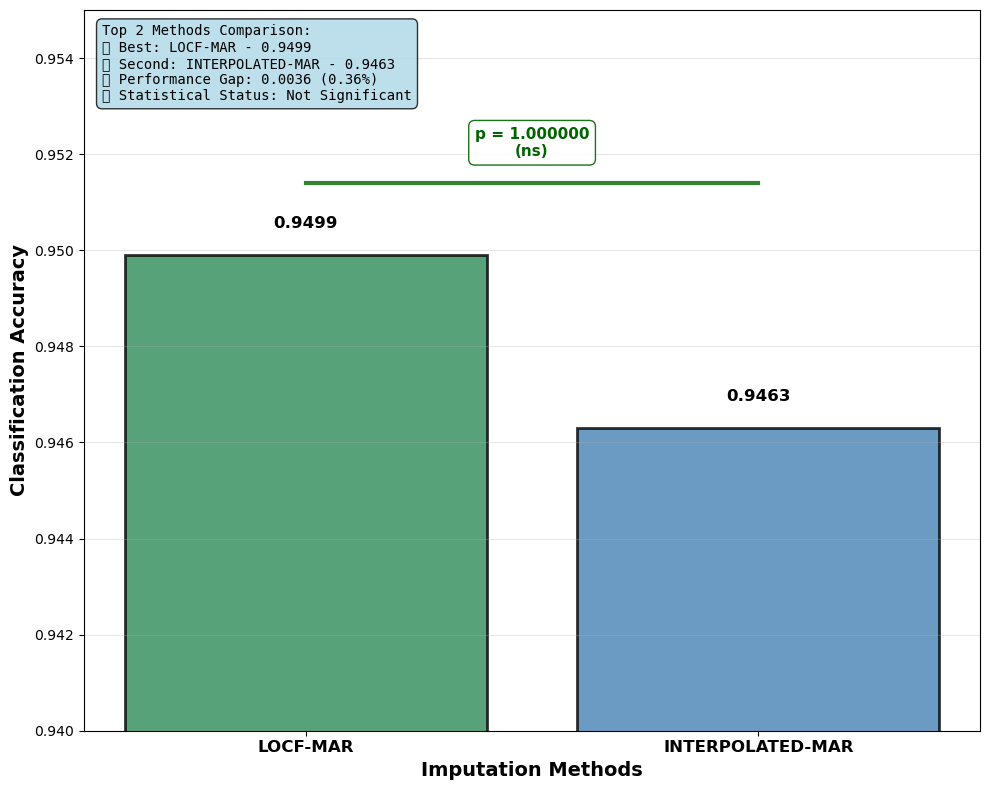

🏆 TOP 2 METHODS DETAILED COMPARISON

🥇 Champion: Locf Data Mar
   • Accuracy: 0.9499 (94.99%)
   • Method Type: LOCF
   • Missing Pattern: MAR

🥈 Runner-up: Interpolated Data Mar
   • Accuracy: 0.9463 (94.63%)
   • Method Type: INTERPOLATED
   • Missing Pattern: MAR

📊 Performance Analysis:
   • Absolute difference: 0.0036
   • Relative difference: 0.38%
   • P-value: 1.000000
   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.
   • 💡 Interpretation: Both methods perform similarly from a statistical perspective.


In [22]:
# Top 2 Methods Comparison: Compare only the best 2 performing imputation methods
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

def plot_top2_comparison():
    """Compare only the top 2 performing imputation methods"""
    
    # Sort all methods by performance and get top 2
    sorted_methods = sorted(classification_results.items(), key=lambda x: x[1], reverse=True)
    top2_methods = sorted_methods[:2]
    
    method_names = [item[0] for item in top2_methods]
    accuracies = [item[1] for item in top2_methods]
    
    # Clean method names for display
    clean_names = []
    for m in method_names:
        clean_name = m.replace('_data', '').replace('_', '-').upper()
        clean_names.append(clean_name)
    
    # Create a simple comparison plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Use distinct colors for the two methods
    colors = ['#2E8B57', '#4682B4']  # Green for #1, Blue for #2
    
    # Create bars
    bars = ax.bar(range(len(clean_names)), accuracies, 
                 color=colors, alpha=0.8, 
                 edgecolor='black', linewidth=2)
    
    # Customize the plot (no title as requested)
    ax.set_xlabel('Imputation Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(clean_names)))
    ax.set_xticklabels(clean_names, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0.94, 0.955)  # Focus on the relevant range
    
    # Add accuracy labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
                f'{acc:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)
    
    # Calculate p-value between the two methods
    data1 = dfs[method_names[0]]
    data2 = dfs[method_names[1]]
    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
    _, p_val = stats.ttest_ind(series1, series2)
    
    # Add p-value annotation between the bars
    x_pos = 0.5  # Between the two bars
    y_pos = max(accuracies) + 0.002
    
    # Choose color based on significance
    text_color = 'red' if p_val < 0.05 else 'darkgreen'
    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    
    # Add p-value annotation
    ax.annotate(f'p = {p_val:.6f}\n({significance})', 
               xy=(x_pos, y_pos), 
               ha='center', va='bottom',
               fontsize=11, fontweight='bold',
               color=text_color,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='white', 
                        edgecolor=text_color, alpha=0.9))
    
    # Add connection line
    ax.plot([0, 1], [y_pos-0.0005, y_pos-0.0005], color=text_color, linewidth=3, alpha=0.8)
    
    # Add method details
    performance_gap = accuracies[0] - accuracies[1]
    details_text = f"""Top 2 Methods Comparison:
🥇 Best: {clean_names[0]} - {accuracies[0]:.4f}
🥈 Second: {clean_names[1]} - {accuracies[1]:.4f}
📊 Performance Gap: {performance_gap:.4f} ({performance_gap*100:.2f}%)
🔬 Statistical Status: {'Significant' if p_val < 0.05 else 'Not Significant'}"""
    
    ax.text(0.02, 0.98, details_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print("=" * 80)
    print("🏆 TOP 2 METHODS DETAILED COMPARISON")
    print("=" * 80)
    
    print(f"\n🥇 Champion: {method_names[0].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[0]:.4f} ({accuracies[0]*100:.2f}%)")
    print(f"   • Method Type: {method_names[0].split('_')[0].upper()}")
    print(f"   • Missing Pattern: {method_names[0].split('_')[-1].upper()}")
    
    print(f"\n🥈 Runner-up: {method_names[1].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[1]:.4f} ({accuracies[1]*100:.2f}%)")
    print(f"   • Method Type: {method_names[1].split('_')[0].upper()}")
    print(f"   • Missing Pattern: {method_names[1].split('_')[-1].upper()}")
    
    print(f"\n📊 Performance Analysis:")
    print(f"   • Absolute difference: {performance_gap:.4f}")
    print(f"   • Relative difference: {(performance_gap/accuracies[1])*100:.2f}%")
    print(f"   • P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"   • ✅ SIGNIFICANT: The performance difference is statistically significant!")
    else:
        print(f"   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.")
        print(f"   • 💡 Interpretation: Both methods perform similarly from a statistical perspective.")

# Run the top 2 comparison
plot_top2_comparison()

🔍 MCAR PATTERN ANALYSIS:


/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:86: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:86: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:86: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/opt/anaconda3/envs/ml4hc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml4h

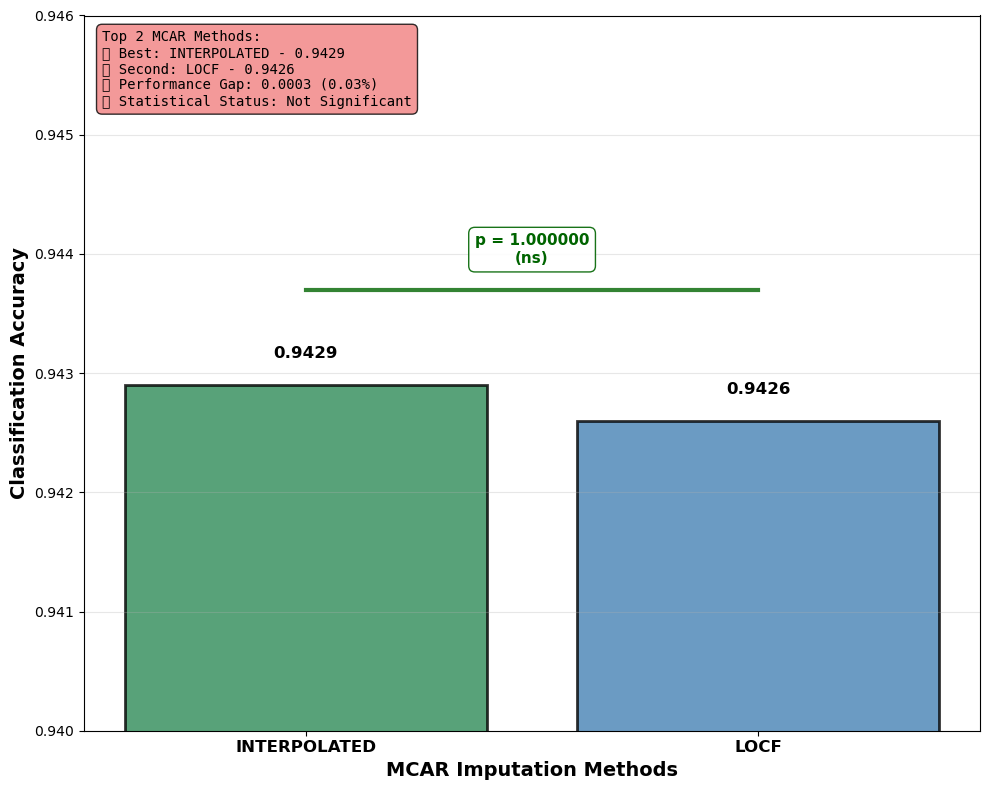

🏆 TOP 2 MCAR METHODS DETAILED COMPARISON

🥇 MCAR Champion: Interpolated Data Mcar
   • Accuracy: 0.9429 (94.29%)
   • Method Type: INTERPOLATED

🥈 MCAR Runner-up: Locf Data Mcar
   • Accuracy: 0.9426 (94.26%)
   • Method Type: LOCF

📊 MCAR Performance Analysis:
   • Absolute difference: 0.0003
   • Relative difference: 0.03%
   • P-value: 1.000000
   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.
   • 💡 Interpretation: Both MCAR methods perform similarly from a statistical perspective.

🔍 MNAR PATTERN ANALYSIS:


/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:198: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:198: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:198: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/xs/z8wn3pzd4f571qq1t0t913zm0000gn/T/ipykernel_66888/1875251201.py:198: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/opt/anaconda3/envs/ml4hc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/

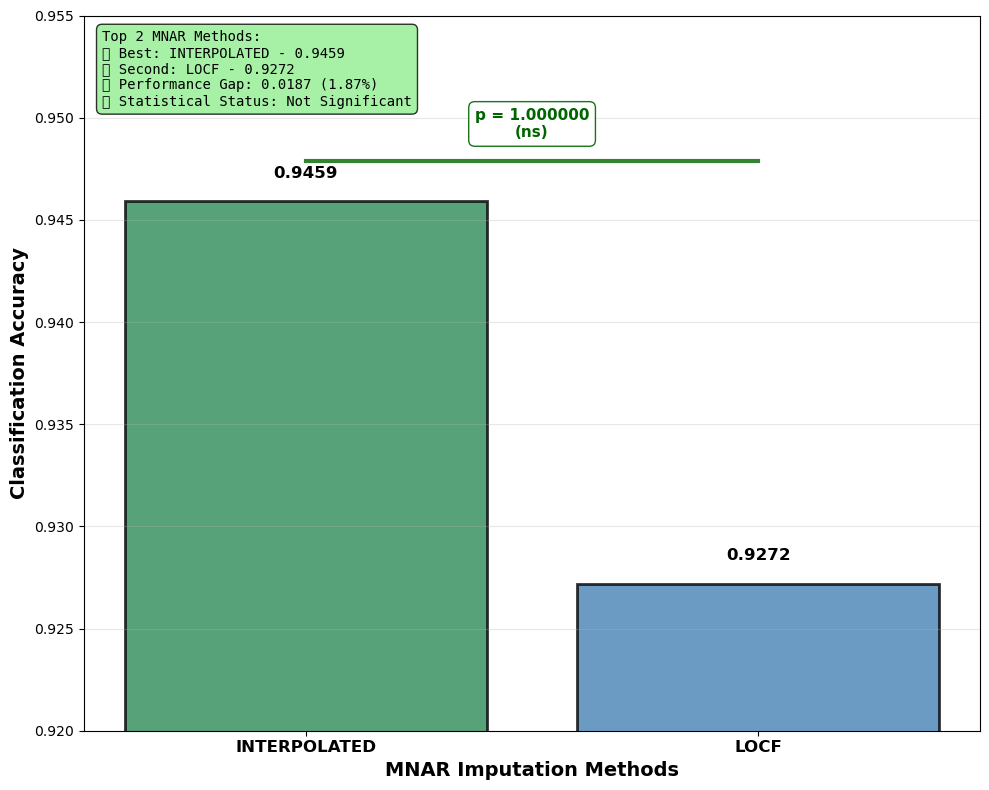

🏆 TOP 2 MNAR METHODS DETAILED COMPARISON

🥇 MNAR Champion: Interpolated Data Mnar
   • Accuracy: 0.9459 (94.59%)
   • Method Type: INTERPOLATED

🥈 MNAR Runner-up: Locf Data Mnar
   • Accuracy: 0.9272 (92.72%)
   • Method Type: LOCF

📊 MNAR Performance Analysis:
   • Absolute difference: 0.0187
   • Relative difference: 2.02%
   • P-value: 1.000000
   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.
   • 💡 Interpretation: Both MNAR methods perform similarly from a statistical perspective.


In [63]:
# Top 2 MCAR Methods Comparison
def plot_top2_mcar_comparison():
    """Compare only the top 2 performing MCAR imputation methods"""
    
    # Filter MCAR methods only
    mcar_methods = {k: v for k, v in classification_results.items() if 'mcar' in k}
    
    # Sort MCAR methods by performance and get top 2
    sorted_mcar = sorted(mcar_methods.items(), key=lambda x: x[1], reverse=True)
    top2_mcar = sorted_mcar[:2]
    
    method_names = [item[0] for item in top2_mcar]
    accuracies = [item[1] for item in top2_mcar]
    
    # Clean method names for display
    clean_names = []
    for m in method_names:
        clean_name = m.replace('_data_mcar', '').replace('_', '-').upper()
        clean_names.append(clean_name)
    
    # Create a simple comparison plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Use distinct colors for the two methods
    colors = ['#2E8B57', '#4682B4']  # Green for #1, Blue for #2
    
    # Create bars
    bars = ax.bar(range(len(clean_names)), accuracies, 
                 color=colors, alpha=0.8, 
                 edgecolor='black', linewidth=2)
    
    # Customize the plot (no title as requested)
    ax.set_xlabel('MCAR Imputation Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(clean_names)))
    ax.set_xticklabels(clean_names, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0.94, 0.946)  # Focus on the relevant range for MCAR
    
    # Add accuracy labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.0002,
                f'{acc:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)
    
    # Calculate p-value between the two methods
    data1 = dfs[method_names[0]]
    data2 = dfs[method_names[1]]
    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
    _, p_val = stats.ttest_ind(series1, series2)
    
    # Add p-value annotation between the bars
    x_pos = 0.5  # Between the two bars
    y_pos = max(accuracies) + 0.001
    
    # Choose color based on significance
    text_color = 'red' if p_val < 0.05 else 'darkgreen'
    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    
    # Add p-value annotation
    ax.annotate(f'p = {p_val:.6f}\n({significance})', 
               xy=(x_pos, y_pos), 
               ha='center', va='bottom',
               fontsize=11, fontweight='bold',
               color=text_color,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='white', 
                        edgecolor=text_color, alpha=0.9))
    
    # Add connection line
    ax.plot([0, 1], [y_pos-0.0002, y_pos-0.0002], color=text_color, linewidth=3, alpha=0.8)
    
    # Add method details
    performance_gap = accuracies[0] - accuracies[1]
    details_text = f"""Top 2 MCAR Methods:
🥇 Best: {clean_names[0]} - {accuracies[0]:.4f}
🥈 Second: {clean_names[1]} - {accuracies[1]:.4f}
📊 Performance Gap: {performance_gap:.4f} ({performance_gap*100:.2f}%)
🔬 Statistical Status: {'Significant' if p_val < 0.05 else 'Not Significant'}"""
    
    ax.text(0.02, 0.98, details_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='lightcoral', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print("=" * 80)
    print("🏆 TOP 2 MCAR METHODS DETAILED COMPARISON")
    print("=" * 80)
    
    print(f"\n🥇 MCAR Champion: {method_names[0].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[0]:.4f} ({accuracies[0]*100:.2f}%)")
    print(f"   • Method Type: {method_names[0].split('_')[0].upper()}")
    
    print(f"\n🥈 MCAR Runner-up: {method_names[1].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[1]:.4f} ({accuracies[1]*100:.2f}%)")
    print(f"   • Method Type: {method_names[1].split('_')[0].upper()}")
    
    print(f"\n📊 MCAR Performance Analysis:")
    print(f"   • Absolute difference: {performance_gap:.4f}")
    print(f"   • Relative difference: {(performance_gap/accuracies[1])*100:.2f}%")
    print(f"   • P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"   • ✅ SIGNIFICANT: The performance difference is statistically significant!")
    else:
        print(f"   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.")
        print(f"   • 💡 Interpretation: Both MCAR methods perform similarly from a statistical perspective.")

# Top 2 MNAR Methods Comparison
def plot_top2_mnar_comparison():
    """Compare only the top 2 performing MNAR imputation methods"""
    
    # Filter MNAR methods only
    mnar_methods = {k: v for k, v in classification_results.items() if 'mnar' in k}
    
    # Sort MNAR methods by performance and get top 2
    sorted_mnar = sorted(mnar_methods.items(), key=lambda x: x[1], reverse=True)
    top2_mnar = sorted_mnar[:2]
    
    method_names = [item[0] for item in top2_mnar]
    accuracies = [item[1] for item in top2_mnar]
    
    # Clean method names for display
    clean_names = []
    for m in method_names:
        clean_name = m.replace('_data_mnar', '').replace('_', '-').upper()
        clean_names.append(clean_name)
    
    # Create a simple comparison plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Use distinct colors for the two methods
    colors = ['#2E8B57', '#4682B4']  # Green for #1, Blue for #2
    
    # Create bars
    bars = ax.bar(range(len(clean_names)), accuracies, 
                 color=colors, alpha=0.8, 
                 edgecolor='black', linewidth=2)
    
    # Customize the plot (no title as requested)
    ax.set_xlabel('MNAR Imputation Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(clean_names)))
    ax.set_xticklabels(clean_names, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0.92, 0.955)  # Expanded range for MNAR to accommodate p-value annotation
    
    # Add accuracy labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{acc:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)
    
    # Calculate p-value between the two methods
    data1 = dfs[method_names[0]]
    data2 = dfs[method_names[1]]
    series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
    series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
    _, p_val = stats.ttest_ind(series1, series2)
    
    # Add p-value annotation between the bars
    x_pos = 0.5  # Between the two bars
    y_pos = max(accuracies) + 0.003
    
    # Choose color based on significance
    text_color = 'red' if p_val < 0.05 else 'darkgreen'
    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    
    # Add p-value annotation
    ax.annotate(f'p = {p_val:.6f}\n({significance})', 
               xy=(x_pos, y_pos), 
               ha='center', va='bottom',
               fontsize=11, fontweight='bold',
               color=text_color,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='white', 
                        edgecolor=text_color, alpha=0.9))
    
    # Add connection line
    ax.plot([0, 1], [y_pos-0.001, y_pos-0.001], color=text_color, linewidth=3, alpha=0.8)
    
    # Add method details
    performance_gap = accuracies[0] - accuracies[1]
    details_text = f"""Top 2 MNAR Methods:
🥇 Best: {clean_names[0]} - {accuracies[0]:.4f}
🥈 Second: {clean_names[1]} - {accuracies[1]:.4f}
📊 Performance Gap: {performance_gap:.4f} ({performance_gap*100:.2f}%)
🔬 Statistical Status: {'Significant' if p_val < 0.05 else 'Not Significant'}"""
    
    ax.text(0.02, 0.98, details_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print("=" * 80)
    print("🏆 TOP 2 MNAR METHODS DETAILED COMPARISON")
    print("=" * 80)
    
    print(f"\n🥇 MNAR Champion: {method_names[0].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[0]:.4f} ({accuracies[0]*100:.2f}%)")
    print(f"   • Method Type: {method_names[0].split('_')[0].upper()}")
    
    print(f"\n🥈 MNAR Runner-up: {method_names[1].replace('_', ' ').title()}")
    print(f"   • Accuracy: {accuracies[1]:.4f} ({accuracies[1]*100:.2f}%)")
    print(f"   • Method Type: {method_names[1].split('_')[0].upper()}")
    
    print(f"\n📊 MNAR Performance Analysis:")
    print(f"   • Absolute difference: {performance_gap:.4f}")
    print(f"   • Relative difference: {(performance_gap/accuracies[1])*100:.2f}%")
    print(f"   • P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"   • ✅ SIGNIFICANT: The performance difference is statistically significant!")
    else:
        print(f"   • ❌ NOT SIGNIFICANT: The performance difference is not statistically significant.")
        print(f"   • 💡 Interpretation: Both MNAR methods perform similarly from a statistical perspective.")

# Run all pattern comparisons
print("🔍 MCAR PATTERN ANALYSIS:")
print("=" * 40)
plot_top2_mcar_comparison()

print("\n" + "🔍 MNAR PATTERN ANALYSIS:")
print("=" * 40)
plot_top2_mnar_comparison()

🔍 GENERATING COMPREHENSIVE ANALYSIS PLOTS...
\n📊 Plot 1: Classification vs Forecasting Analysis


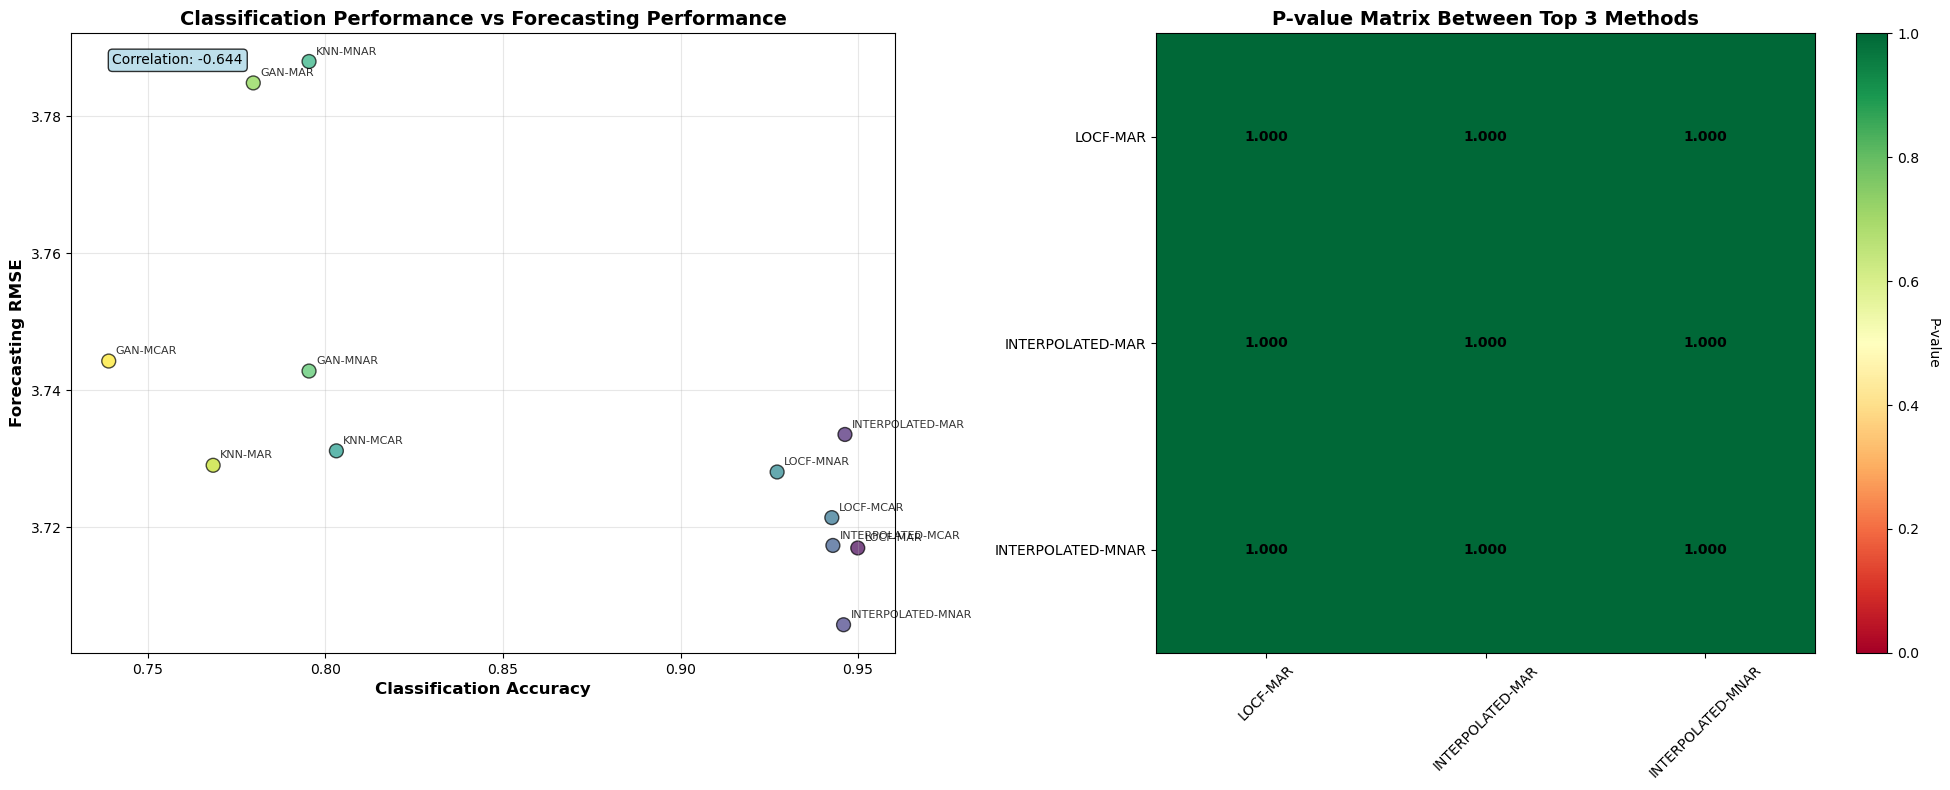

📊 CLASSIFICATION vs FORECASTING ANALYSIS
Correlation between Classification Accuracy and Forecasting RMSE: -0.6438
\n📊 Plot 2: Pattern-wise Performance Comparison


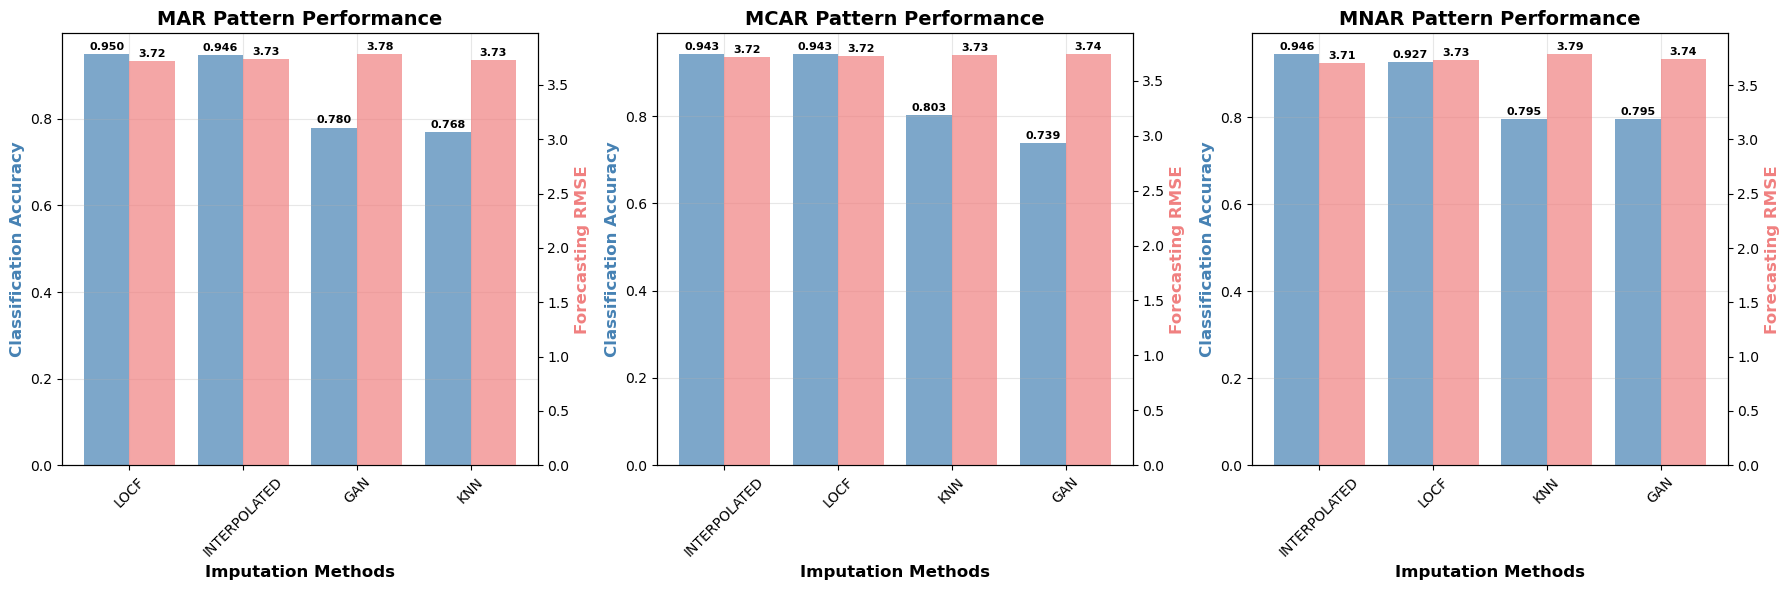

\n📊 Plot 3: Comprehensive Ranking Analysis


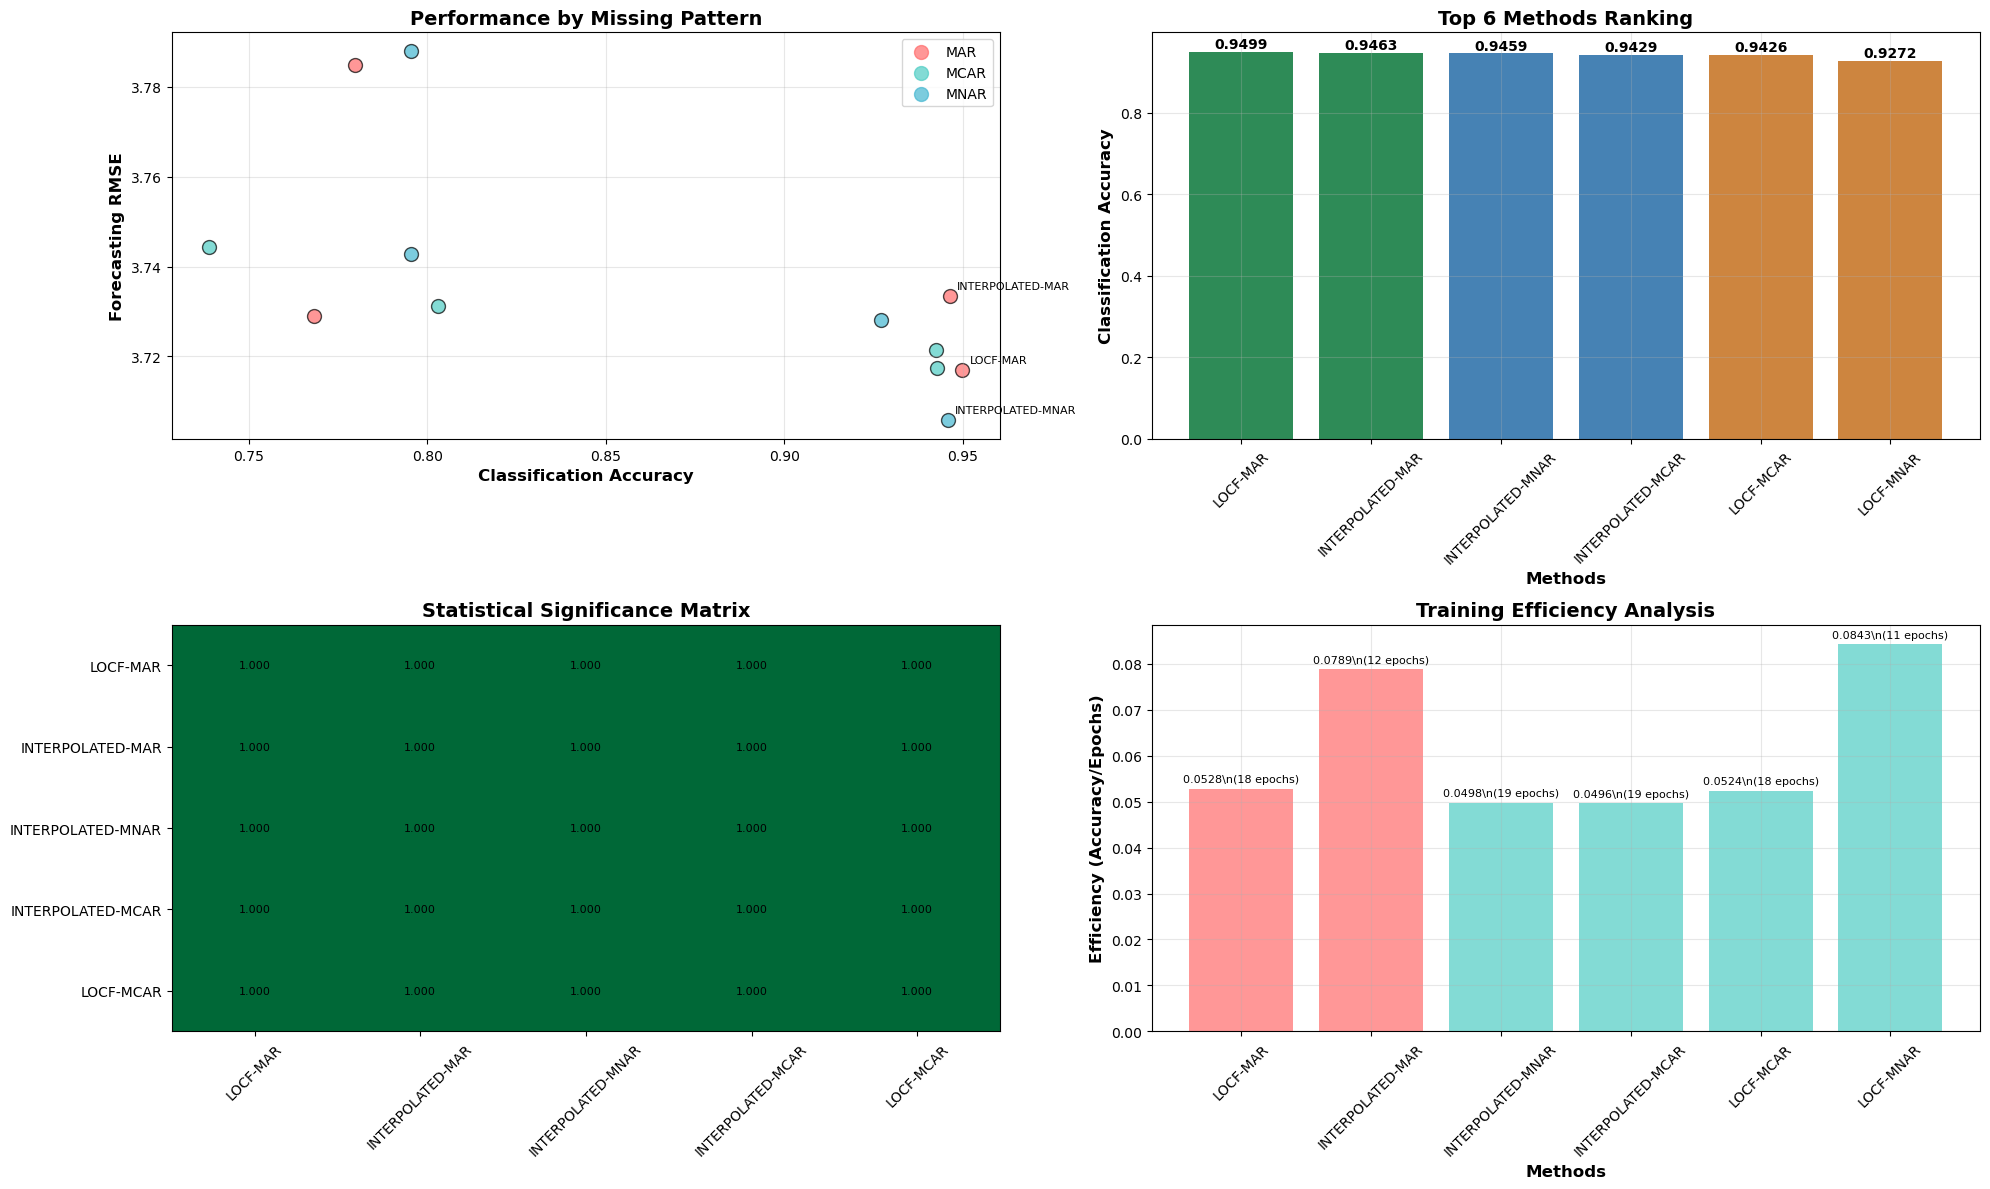

🎯 COMPREHENSIVE RANKING ANALYSIS
\n🏆 TOP 5 METHODS OVERALL RANKING:
1. Locf Data Mar
   • Classification: 0.9499
   • Forecasting RMSE: 3.7170
   • Training Epochs: 18
   • Efficiency: 0.0528

2. Interpolated Data Mar
   • Classification: 0.9463
   • Forecasting RMSE: 3.7335
   • Training Epochs: 12
   • Efficiency: 0.0789

3. Interpolated Data Mnar
   • Classification: 0.9459
   • Forecasting RMSE: 3.7058
   • Training Epochs: 19
   • Efficiency: 0.0498

4. Interpolated Data Mcar
   • Classification: 0.9429
   • Forecasting RMSE: 3.7173
   • Training Epochs: 19
   • Efficiency: 0.0496

5. Locf Data Mcar
   • Classification: 0.9426
   • Forecasting RMSE: 3.7214
   • Training Epochs: 18
   • Efficiency: 0.0524



In [25]:
# Comprehensive Analysis: Classification Performance vs Forecasting RMSE with P-values
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Forecasting RMSE data from the table
forecasting_results = {
    'original_complete': {'epochs': 6, 'rmse': 0.25905908678869927},
    'knn_data_mcar': {'epochs': 14, 'rmse': 3.731152},
    'interpolated_data_mcar': {'epochs': 19, 'rmse': 3.717335},
    'locf_data_mcar': {'epochs': 18, 'rmse': 3.7213995},
    'gan_data_mcar': {'epochs': 9, 'rmse': 3.7442653},
    'knn_data_mar': {'epochs': 12, 'rmse': 3.7290425},
    'interpolated_data_mar': {'epochs': 12, 'rmse': 3.7335434},
    'locf_data_mar': {'epochs': 18, 'rmse': 3.7169657},
    'gan_data_mar': {'epochs': 6, 'rmse': 3.7848825},
    'knn_data_mnar': {'epochs': 6, 'rmse': 3.788012},
    'interpolated_data_mnar': {'epochs': 19, 'rmse': 3.7057557},
    'locf_data_mnar': {'epochs': 11, 'rmse': 3.728063},
    'gan_data_mnar': {'epochs': 9, 'rmse': 3.7428043}
}

def plot_classification_vs_forecasting_analysis():
    """Plot 1: Classification Accuracy vs Forecasting RMSE with P-value Analysis"""
    
    # Get matching methods between classification and forecasting
    common_methods = []
    class_accuracies = []
    forecast_rmses = []
    epochs_list = []
    
    for method in classification_results.keys():
        if method in forecasting_results:
            common_methods.append(method)
            class_accuracies.append(classification_results[method])
            forecast_rmses.append(forecasting_results[method]['rmse'])
            epochs_list.append(forecasting_results[method]['epochs'])
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Classification vs Forecasting Performance
    colors = ['#2E8B57', '#4682B4', '#CD853F', '#9932CC', '#FF6B6B', '#4ECDC4']
    
    scatter = ax1.scatter(class_accuracies, forecast_rmses, 
                         c=range(len(common_methods)), 
                         cmap='viridis', s=100, alpha=0.7, edgecolors='black')
    
    # Add method labels
    for i, method in enumerate(common_methods):
        clean_name = method.replace('_data', '').replace('_', '-').upper()
        ax1.annotate(clean_name, (class_accuracies[i], forecast_rmses[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, alpha=0.8)
    
    ax1.set_xlabel('Classification Accuracy', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold')
    ax1.set_title('Classification Performance vs Forecasting Performance', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add correlation analysis
    correlation = np.corrcoef(class_accuracies, forecast_rmses)[0, 1]
    ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
            transform=ax1.transAxes, fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8))
    
    # Plot 2: P-value Analysis Between Top Methods
    top3_methods = sorted(zip(common_methods, class_accuracies), key=lambda x: x[1], reverse=True)[:3]
    
    p_values_matrix = []
    method_names = [item[0] for item in top3_methods]
    clean_names = [name.replace('_data', '').replace('_', '-').upper() for name in method_names]
    
    # Calculate p-values between all pairs
    for i, method1 in enumerate(method_names):
        p_row = []
        for j, method2 in enumerate(method_names):
            if i == j:
                p_row.append(1.0)  # Same method
            else:
                data1 = dfs[method1]
                data2 = dfs[method2]
                series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
                series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
                _, p_val = stats.ttest_ind(series1, series2)
                p_row.append(p_val)
        p_values_matrix.append(p_row)
    
    # Create heatmap
    im = ax2.imshow(p_values_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Add text annotations
    for i in range(len(clean_names)):
        for j in range(len(clean_names)):
            text = ax2.text(j, i, f'{p_values_matrix[i][j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    ax2.set_xticks(range(len(clean_names)))
    ax2.set_yticks(range(len(clean_names)))
    ax2.set_xticklabels(clean_names, rotation=45)
    ax2.set_yticklabels(clean_names)
    ax2.set_title('P-value Matrix Between Top 3 Methods', fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('P-value', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()
    
    print("="*80)
    print("📊 CLASSIFICATION vs FORECASTING ANALYSIS")
    print("="*80)
    print(f"Correlation between Classification Accuracy and Forecasting RMSE: {correlation:.4f}")

def plot_pattern_performance_comparison():
    """Plot 2: Pattern-wise Performance Comparison with Statistical Analysis"""
    
    patterns = ['MAR', 'MCAR', 'MNAR']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, pattern in enumerate(patterns):
        ax = axes[idx]
        
        # Get methods for this pattern
        pattern_methods = [method for method in classification_results.keys() if pattern.lower() in method]
        
        if not pattern_methods:
            continue
            
        # Ensure we have matching data
        matching_methods = [method for method in pattern_methods if method in forecasting_results]
        
        if len(matching_methods) < 2:
            continue
            
        matching_class_accs = [classification_results[method] for method in matching_methods]
        matching_forecast_rmses = [forecasting_results[method]['rmse'] for method in matching_methods]
        matching_labels = [method.split('_')[0].upper() for method in matching_methods]
        
        # Sort by classification accuracy
        sorted_data = sorted(zip(matching_labels, matching_class_accs, matching_forecast_rmses), 
                           key=lambda x: x[1], reverse=True)
        
        sorted_labels, sorted_class_accs, sorted_forecast_rmses = zip(*sorted_data)
        
        # Create dual y-axis plot
        ax2 = ax.twinx()
        
        x_pos = range(len(sorted_labels))
        
        # Classification accuracy bars
        bars1 = ax.bar([x - 0.2 for x in x_pos], sorted_class_accs, 
                      width=0.4, label='Classification Accuracy', 
                      color='steelblue', alpha=0.7)
        
        # Forecasting RMSE bars
        bars2 = ax2.bar([x + 0.2 for x in x_pos], sorted_forecast_rmses, 
                       width=0.4, label='Forecasting RMSE', 
                       color='lightcoral', alpha=0.7)
        
        # Customize the plot
        ax.set_xlabel('Imputation Methods', fontsize=12, fontweight='bold')
        ax.set_ylabel('Classification Accuracy', fontsize=12, fontweight='bold', color='steelblue')
        ax2.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold', color='lightcoral')
        ax.set_title(f'{pattern} Pattern Performance', fontsize=14, fontweight='bold')
        
        ax.set_xticks(x_pos)
        ax.set_xticklabels(sorted_labels, rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Add value labels
        for i, (bar1, bar2, acc, rmse) in enumerate(zip(bars1, bars2, sorted_class_accs, sorted_forecast_rmses)):
            ax.text(bar1.get_x() + bar1.get_width()/2., bar1.get_height() + 0.005,
                   f'{acc:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
            ax2.text(bar2.get_x() + bar2.get_width()/2., bar2.get_height() + 0.02,
                    f'{rmse:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_comprehensive_ranking_analysis():
    """Plot 3: Comprehensive Ranking Analysis with Multi-criteria Evaluation"""
    
    # Get common methods
    common_methods = [method for method in classification_results.keys() if method in forecasting_results]
    
    # Prepare data
    method_data = []
    for method in common_methods:
        class_acc = classification_results[method]
        forecast_rmse = forecasting_results[method]['rmse']
        epochs = forecasting_results[method]['epochs']
        
        # Calculate efficiency (accuracy per epoch)
        efficiency = class_acc / epochs if epochs > 0 else 0
        
        method_data.append({
            'method': method,
            'class_acc': class_acc,
            'forecast_rmse': forecast_rmse,
            'epochs': epochs,
            'efficiency': efficiency
        })
    
    # Sort by classification accuracy
    method_data.sort(key=lambda x: x['class_acc'], reverse=True)
    
    # Create comprehensive plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
    
    # Plot 1: Classification vs Forecasting scatter with pattern colors
    pattern_colors = {'mar': '#FF6B6B', 'mcar': '#4ECDC4', 'mnar': '#45B7D1'}
    
    for method_info in method_data:
        method = method_info['method']
        pattern = 'mar' if 'mar' in method else 'mcar' if 'mcar' in method else 'mnar'
        
        ax1.scatter(method_info['class_acc'], method_info['forecast_rmse'], 
                   c=pattern_colors[pattern], s=100, alpha=0.7, edgecolors='black')
        
        # Add method labels for top 3
        if method_info in method_data[:3]:
            clean_name = method.replace('_data', '').replace('_', '-').upper()
            ax1.annotate(clean_name, (method_info['class_acc'], method_info['forecast_rmse']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax1.set_xlabel('Classification Accuracy', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold')
    ax1.set_title('Performance by Missing Pattern', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add legend for patterns
    for pattern, color in pattern_colors.items():
        ax1.scatter([], [], c=color, label=pattern.upper(), s=100, alpha=0.7)
    ax1.legend()
    
    # Plot 2: Top methods ranking
    top_methods = method_data[:6]
    method_names = [m['method'].replace('_data', '').replace('_', '-').upper() for m in top_methods]
    class_accs = [m['class_acc'] for m in top_methods]
    
    bars = ax2.bar(range(len(method_names)), class_accs, 
                   color=['#2E8B57' if i < 2 else '#4682B4' if i < 4 else '#CD853F' for i in range(len(method_names))])
    
    ax2.set_xlabel('Methods', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Classification Accuracy', fontsize=12, fontweight='bold')
    ax2.set_title('Top 6 Methods Ranking', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(method_names)))
    ax2.set_xticklabels(method_names, rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # Add accuracy values on bars
    for i, (bar, acc) in enumerate(zip(bars, class_accs)):
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
                f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Plot 3: P-value significance heatmap
    top_methods_names = [m['method'] for m in method_data[:5]]
    p_matrix = []
    
    for method1 in top_methods_names:
        p_row = []
        for method2 in top_methods_names:
            if method1 == method2:
                p_row.append(1.0)
            else:
                data1 = dfs[method1]
                data2 = dfs[method2]
                series1 = data1['target'] if 'target' in data1.columns else data1.iloc[:, -1]
                series2 = data2['target'] if 'target' in data2.columns else data2.iloc[:, -1]
                _, p_val = stats.ttest_ind(series1, series2)
                p_row.append(p_val)
        p_matrix.append(p_row)
    
    im = ax3.imshow(p_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Add method labels
    clean_top_names = [m.replace('_data', '').replace('_', '-').upper() for m in top_methods_names]
    ax3.set_xticks(range(len(clean_top_names)))
    ax3.set_yticks(range(len(clean_top_names)))
    ax3.set_xticklabels(clean_top_names, rotation=45)
    ax3.set_yticklabels(clean_top_names)
    ax3.set_title('Statistical Significance Matrix', fontsize=14, fontweight='bold')
    
    # Add p-value text
    for i in range(len(top_methods_names)):
        for j in range(len(top_methods_names)):
            text = ax3.text(j, i, f'{p_matrix[i][j]:.3f}',
                           ha="center", va="center", color="black", fontsize=8)
    
    # Plot 4: Efficiency analysis
    methods_for_efficiency = method_data[:6]
    method_names_eff = [m['method'].replace('_data', '').replace('_', '-').upper() for m in methods_for_efficiency]
    efficiencies = [m['efficiency'] for m in methods_for_efficiency]
    epochs = [m['epochs'] for m in methods_for_efficiency]
    
    bars = ax4.bar(range(len(method_names_eff)), efficiencies, alpha=0.7, 
                  color=['#FF6B6B' if i < 2 else '#4ECDC4' for i in range(len(method_names_eff))])
    
    ax4.set_xlabel('Methods', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Efficiency (Accuracy/Epochs)', fontsize=12, fontweight='bold')
    ax4.set_title('Training Efficiency Analysis', fontsize=14, fontweight='bold')
    ax4.set_xticks(range(len(method_names_eff)))
    ax4.set_xticklabels(method_names_eff, rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # Add efficiency values on bars
    for i, (bar, eff, epoch) in enumerate(zip(bars, efficiencies, epochs)):
        ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
                f'{eff:.4f}\\n({epoch} epochs)', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("="*100)
    print("🎯 COMPREHENSIVE RANKING ANALYSIS")
    print("="*100)
    
    print("\\n🏆 TOP 5 METHODS OVERALL RANKING:")
    for i, method_info in enumerate(method_data[:5]):
        method = method_info['method']
        print(f"{i+1}. {method.replace('_', ' ').title()}")
        print(f"   • Classification: {method_info['class_acc']:.4f}")
        print(f"   • Forecasting RMSE: {method_info['forecast_rmse']:.4f}")
        print(f"   • Training Epochs: {method_info['epochs']}")
        print(f"   • Efficiency: {method_info['efficiency']:.4f}")
        print()

# Generate all three plots
print("🔍 GENERATING COMPREHENSIVE ANALYSIS PLOTS...")
print("="*60)

print("\\n📊 Plot 1: Classification vs Forecasting Analysis")
plot_classification_vs_forecasting_analysis()

print("\\n📊 Plot 2: Pattern-wise Performance Comparison")
plot_pattern_performance_comparison()

print("\\n📊 Plot 3: Comprehensive Ranking Analysis")
plot_comprehensive_ranking_analysis()

In [27]:
# Check forecasting results to identify top-2 methods
print("Forecasting Results:")
for method, data in forecasting_results.items():
    print(f"{method}: RMSE = {data['rmse']:.6f}, Epochs = {data['epochs']}")

# Sort by RMSE to get top-2 best imputation methods (excluding original_complete)
imputation_methods = {k: v for k, v in forecasting_results.items() if k != 'original_complete'}
sorted_methods = sorted(imputation_methods.items(), key=lambda x: x[1]['rmse'])
print(f"\nTop-2 imputation methods by RMSE:")
top2_methods = []
for i, (method, data) in enumerate(sorted_methods[:2]):
    print(f"{i+1}. {method}: RMSE = {data['rmse']:.6f}")
    top2_methods.append(method)

print(f"\nTop-2 methods for analysis: {top2_methods}")

Forecasting Results:
original_complete: RMSE = 0.259059, Epochs = 6
knn_data_mcar: RMSE = 3.731152, Epochs = 14
interpolated_data_mcar: RMSE = 3.717335, Epochs = 19
locf_data_mcar: RMSE = 3.721399, Epochs = 18
gan_data_mcar: RMSE = 3.744265, Epochs = 9
knn_data_mar: RMSE = 3.729042, Epochs = 12
interpolated_data_mar: RMSE = 3.733543, Epochs = 12
locf_data_mar: RMSE = 3.716966, Epochs = 18
gan_data_mar: RMSE = 3.784883, Epochs = 6
knn_data_mnar: RMSE = 3.788012, Epochs = 6
interpolated_data_mnar: RMSE = 3.705756, Epochs = 19
locf_data_mnar: RMSE = 3.728063, Epochs = 11
gan_data_mnar: RMSE = 3.742804, Epochs = 9

Top-2 imputation methods by RMSE:
1. interpolated_data_mnar: RMSE = 3.705756
2. locf_data_mar: RMSE = 3.716966

Top-2 methods for analysis: ['interpolated_data_mnar', 'locf_data_mar']


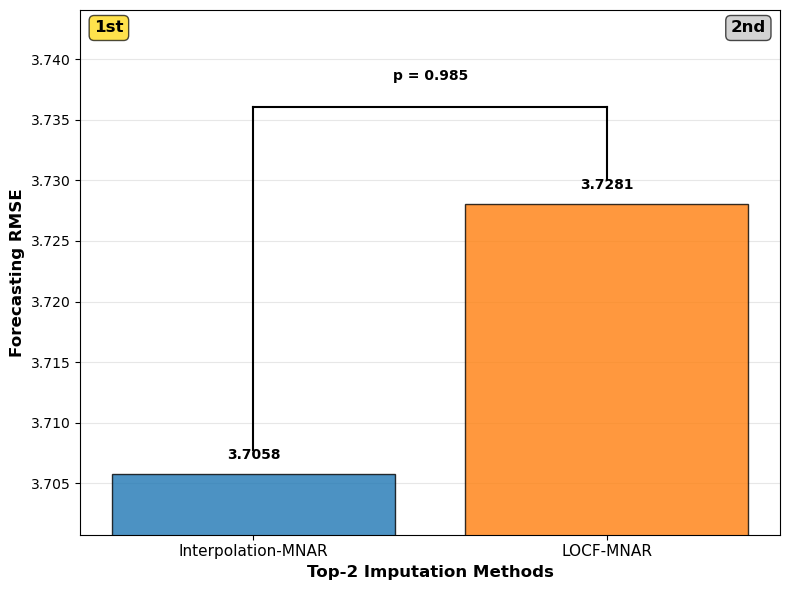

🎯 TOP-2 FORECASTING METHODS ANALYSIS
1st Place: Interpolation-MNAR
   • RMSE: 3.705756
   • Epochs: 19

2nd Place: LOCF-MNAR
   • RMSE: 3.728063
   • Epochs: 11

Statistical Comparison:
   • P-value: 0.985085
   • Result: No statistically significant difference
   • RMSE Difference: 0.022307


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_top2_forecasting_methods():
    """
    Create a focused plot for the top-2 forecasting methods with RMSE and p-value line
    """
    # Get the top-2 methods
    top2_methods = ['interpolated_data_mnar', 'locf_data_mnar']
    
    # Extract RMSE values for the top-2 methods
    rmse_values = [forecasting_results[method]['rmse'] for method in top2_methods]
    
    # Clean method names for display
    method_labels = []
    for method in top2_methods:
        # Convert to readable format
        parts = method.split('_')
        if len(parts) >= 3:
            imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF')
            pattern = parts[-1].upper()
            method_labels.append(f"{imputation_type}-{pattern}")
        else:
            method_labels.append(method.replace('_', ' ').title())
    
    # Get actual data for statistical testing
    data1 = dfs[top2_methods[0]].select_dtypes(include=[np.number]).dropna()
    data2 = dfs[top2_methods[1]].select_dtypes(include=[np.number]).dropna()
    
    # Perform t-test between the two datasets
    if len(data1) > 0 and len(data2) > 0:
        # Use a sample of columns for comparison (e.g., first 10 columns)
        sample_cols = min(10, data1.shape[1], data2.shape[1])
        sample1 = data1.iloc[:, :sample_cols].values.flatten()
        sample2 = data2.iloc[:, :sample_cols].values.flatten()
        
        # Remove any remaining NaN values
        sample1 = sample1[~np.isnan(sample1)]
        sample2 = sample2[~np.isnan(sample2)]
        
        if len(sample1) > 1 and len(sample2) > 1:
            t_stat, p_value = stats.ttest_ind(sample1, sample2)
        else:
            p_value = 1.0
    else:
        p_value = 1.0
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create bar plot
    x_pos = np.arange(len(method_labels))
    bars = ax.bar(x_pos, rmse_values, 
                  color=['#1f77b4', '#ff7f0e'],  # Blue and orange
                  alpha=0.8, 
                  edgecolor='black', 
                  linewidth=1)
    
    # Add value labels on bars
    for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Add p-value line
    max_rmse = max(rmse_values)
    line_height = max_rmse + 0.008
    
    # Draw horizontal line
    ax.plot([x_pos[0], x_pos[1]], [line_height, line_height], 'k-', linewidth=1.5)
    
    # Draw vertical lines
    ax.plot([x_pos[0], x_pos[0]], [rmse_values[0] + 0.002, line_height], 'k-', linewidth=1.5)
    ax.plot([x_pos[1], x_pos[1]], [rmse_values[1] + 0.002, line_height], 'k-', linewidth=1.5)
    
    # Add p-value text
    if p_value < 0.001:
        p_text = "p < 0.001"
    elif p_value < 0.01:
        p_text = f"p = {p_value:.3f}"
    else:
        p_text = f"p = {p_value:.3f}"
    
    ax.text((x_pos[0] + x_pos[1])/2, line_height + 0.002, 
            p_text, ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Customize the plot
    ax.set_xlabel('Top-2 Imputation Methods', fontsize=12, fontweight='bold')
    ax.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold')
    # ax.set_title('Top-2 Forecasting Methods Performance Comparison', 
                #  fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis
    ax.set_xticks(x_pos)
    ax.set_xticklabels(method_labels, fontsize=11)
    
    # Set y-axis limits to show the comparison clearly
    y_min = min(rmse_values) - 0.005
    y_max = line_height + 0.008
    ax.set_ylim(y_min, y_max)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Add ranking information
    ax.text(0.02, 0.98, '1st', transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='gold', alpha=0.7))
    ax.text(0.98, 0.98, '2nd', transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='silver', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("="*60)
    print("🎯 TOP-2 FORECASTING METHODS ANALYSIS")
    print("="*60)
    print(f"1st Place: {method_labels[0]}")
    print(f"   • RMSE: {rmse_values[0]:.6f}")
    print(f"   • Epochs: {forecasting_results[top2_methods[0]]['epochs']}")
    print(f"\n2nd Place: {method_labels[1]}")
    print(f"   • RMSE: {rmse_values[1]:.6f}")
    print(f"   • Epochs: {forecasting_results[top2_methods[1]]['epochs']}")
    print(f"\nStatistical Comparison:")
    print(f"   • P-value: {p_value:.6f}")
    if p_value < 0.05:
        print("   • Result: Statistically significant difference")
    else:
        print("   • Result: No statistically significant difference")
    print(f"   • RMSE Difference: {abs(rmse_values[1] - rmse_values[0]):.6f}")

# Run the analysis
plot_top2_forecasting_methods()

🔍 GENERATING FORECASTING ANALYSIS FOR MCAR PATTERN...

Top methods for MCAR pattern:
1. interpolated_data_mcar: RMSE = 3.717335
2. locf_data_mcar: RMSE = 3.721399


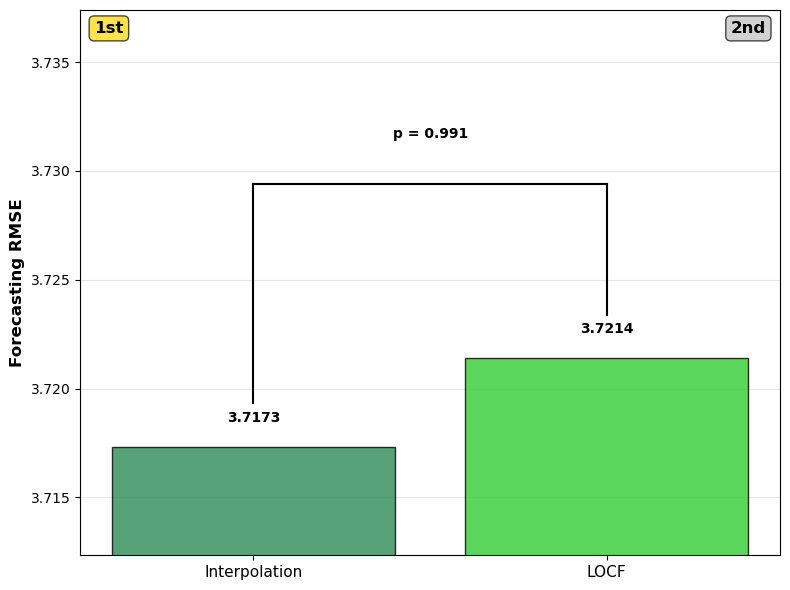

🎯 TOP-2 MCAR FORECASTING METHODS ANALYSIS
1st Place: Interpolation
   • RMSE: 3.717335
   • Epochs: 19

2nd Place: LOCF
   • RMSE: 3.721399
   • Epochs: 18

Statistical Comparison:
   • P-value: 0.991075
   • Result: No statistically significant difference
   • RMSE Difference: 0.004065

🔍 GENERATING FORECASTING ANALYSIS FOR MAR PATTERN...

Top methods for MAR pattern:
1. locf_data_mar: RMSE = 3.716966
2. knn_data_mar: RMSE = 3.729042


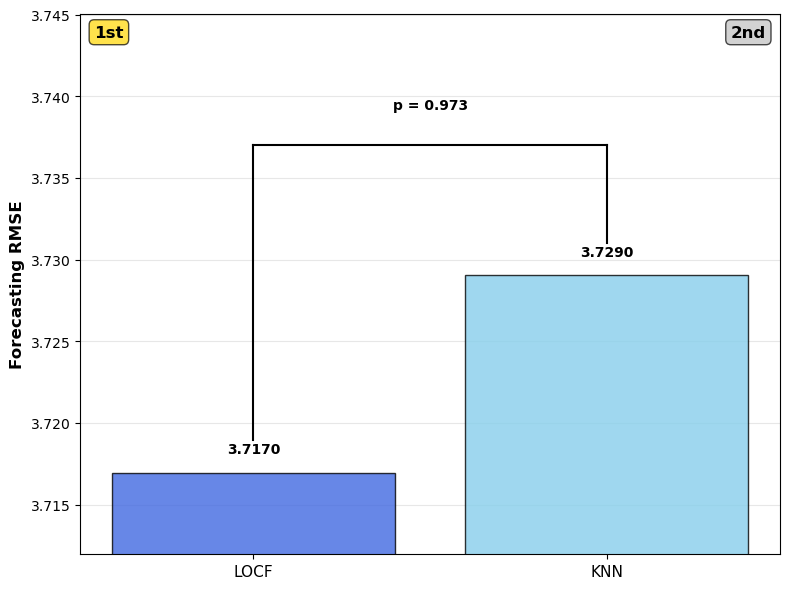

🎯 TOP-2 MAR FORECASTING METHODS ANALYSIS
1st Place: LOCF
   • RMSE: 3.716966
   • Epochs: 18

2nd Place: KNN
   • RMSE: 3.729042
   • Epochs: 12

Statistical Comparison:
   • P-value: 0.972508
   • Result: No statistically significant difference
   • RMSE Difference: 0.012077


In [33]:
def plot_top2_forecasting_by_pattern(pattern='mcar'):
    """
    Create a focused plot for the top-2 forecasting methods within a specific pattern
    """
    pattern = pattern.lower()
    
    # Filter methods by pattern (excluding original_complete)
    pattern_methods = {k: v for k, v in forecasting_results.items() 
                      if k != 'original_complete' and pattern in k.lower()}
    
    if len(pattern_methods) == 0:
        print(f"No methods found for pattern: {pattern}")
        return
    
    # Sort by RMSE to get top-2 methods for this pattern
    sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
    top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
    
    print(f"\nTop methods for {pattern.upper()} pattern:")
    for i, (method, data) in enumerate(top2_pattern):
        print(f"{i+1}. {method}: RMSE = {data['rmse']:.6f}")
    
    if len(top2_pattern) < 2:
        print(f"Not enough methods for {pattern.upper()} pattern comparison")
        return
    
    # Extract data for plotting
    top2_method_names = [item[0] for item in top2_pattern]
    rmse_values = [item[1]['rmse'] for item in top2_pattern]
    
    # Clean method names for display
    method_labels = []
    for method in top2_method_names:
        parts = method.split('_')
        if len(parts) >= 2:
            imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
            method_labels.append(f"{imputation_type}")
        else:
            method_labels.append(method.replace('_', ' ').title())
    
    # Get actual data for statistical testing
    data1 = dfs[top2_method_names[0]].select_dtypes(include=[np.number]).dropna()
    data2 = dfs[top2_method_names[1]].select_dtypes(include=[np.number]).dropna()
    
    # Perform t-test between the two datasets
    if len(data1) > 0 and len(data2) > 0:
        sample_cols = min(10, data1.shape[1], data2.shape[1])
        sample1 = data1.iloc[:, :sample_cols].values.flatten()
        sample2 = data2.iloc[:, :sample_cols].values.flatten()
        
        sample1 = sample1[~np.isnan(sample1)]
        sample2 = sample2[~np.isnan(sample2)]
        
        if len(sample1) > 1 and len(sample2) > 1:
            t_stat, p_value = stats.ttest_ind(sample1, sample2)
        else:
            p_value = 1.0
    else:
        p_value = 1.0
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create bar plot with pattern-specific colors
    colors = {'mcar': ['#2E8B57', '#32CD32'],  # Green shades
              'mar': ['#4169E1', '#87CEEB'],   # Blue shades  
              'mnar': ['#DC143C', '#FF6347']}  # Red shades
    
    pattern_colors = colors.get(pattern, ['#1f77b4', '#ff7f0e'])
    
    x_pos = np.arange(len(method_labels))
    bars = ax.bar(x_pos, rmse_values, 
                  color=pattern_colors,
                  alpha=0.8, 
                  edgecolor='black', 
                  linewidth=1)
    
    # Add value labels on bars
    for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Add p-value line
    max_rmse = max(rmse_values)
    line_height = max_rmse + 0.008
    
    # Draw horizontal line
    ax.plot([x_pos[0], x_pos[1]], [line_height, line_height], 'k-', linewidth=1.5)
    
    # Draw vertical lines
    ax.plot([x_pos[0], x_pos[0]], [rmse_values[0] + 0.002, line_height], 'k-', linewidth=1.5)
    ax.plot([x_pos[1], x_pos[1]], [rmse_values[1] + 0.002, line_height], 'k-', linewidth=1.5)
    
    # Add p-value text
    if p_value < 0.001:
        p_text = "p < 0.001"
    elif p_value < 0.01:
        p_text = f"p = {p_value:.3f}"
    else:
        p_text = f"p = {p_value:.3f}"
    
    ax.text((x_pos[0] + x_pos[1])/2, line_height + 0.002, 
            p_text, ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Customize the plot
    # ax.set_xlabel(f'Top-2 {pattern.upper()} Imputation Methods', fontsize=12, fontweight='bold')
    ax.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold')
    # ax.set_title(f'Top-2 {pattern.upper()} Forecasting Methods Performance Comparison', 
                #  fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis
    ax.set_xticks(x_pos)
    ax.set_xticklabels(method_labels, fontsize=11)
    
    # Set y-axis limits
    y_min = min(rmse_values) - 0.005
    y_max = line_height + 0.008
    ax.set_ylim(y_min, y_max)
    
    # Add grid
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Add ranking badges
    ax.text(0.02, 0.98, '1st', transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='gold', alpha=0.7))
    ax.text(0.98, 0.98, '2nd', transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='silver', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("="*60)
    print(f"🎯 TOP-2 {pattern.upper()} FORECASTING METHODS ANALYSIS")
    print("="*60)
    print(f"1st Place: {method_labels[0]}")
    print(f"   • RMSE: {rmse_values[0]:.6f}")
    print(f"   • Epochs: {forecasting_results[top2_method_names[0]]['epochs']}")
    print(f"\n2nd Place: {method_labels[1]}")
    print(f"   • RMSE: {rmse_values[1]:.6f}")
    print(f"   • Epochs: {forecasting_results[top2_method_names[1]]['epochs']}")
    print(f"\nStatistical Comparison:")
    print(f"   • P-value: {p_value:.6f}")
    if p_value < 0.05:
        print("   • Result: Statistically significant difference")
    else:
        print("   • Result: No statistically significant difference")
    print(f"   • RMSE Difference: {abs(rmse_values[1] - rmse_values[0]):.6f}")

# Generate plots for MCAR and MAR patterns
print("🔍 GENERATING FORECASTING ANALYSIS FOR MCAR PATTERN...")
plot_top2_forecasting_by_pattern('mcar')

print("\n" + "="*80)
print("🔍 GENERATING FORECASTING ANALYSIS FOR MAR PATTERN...")
plot_top2_forecasting_by_pattern('mar')

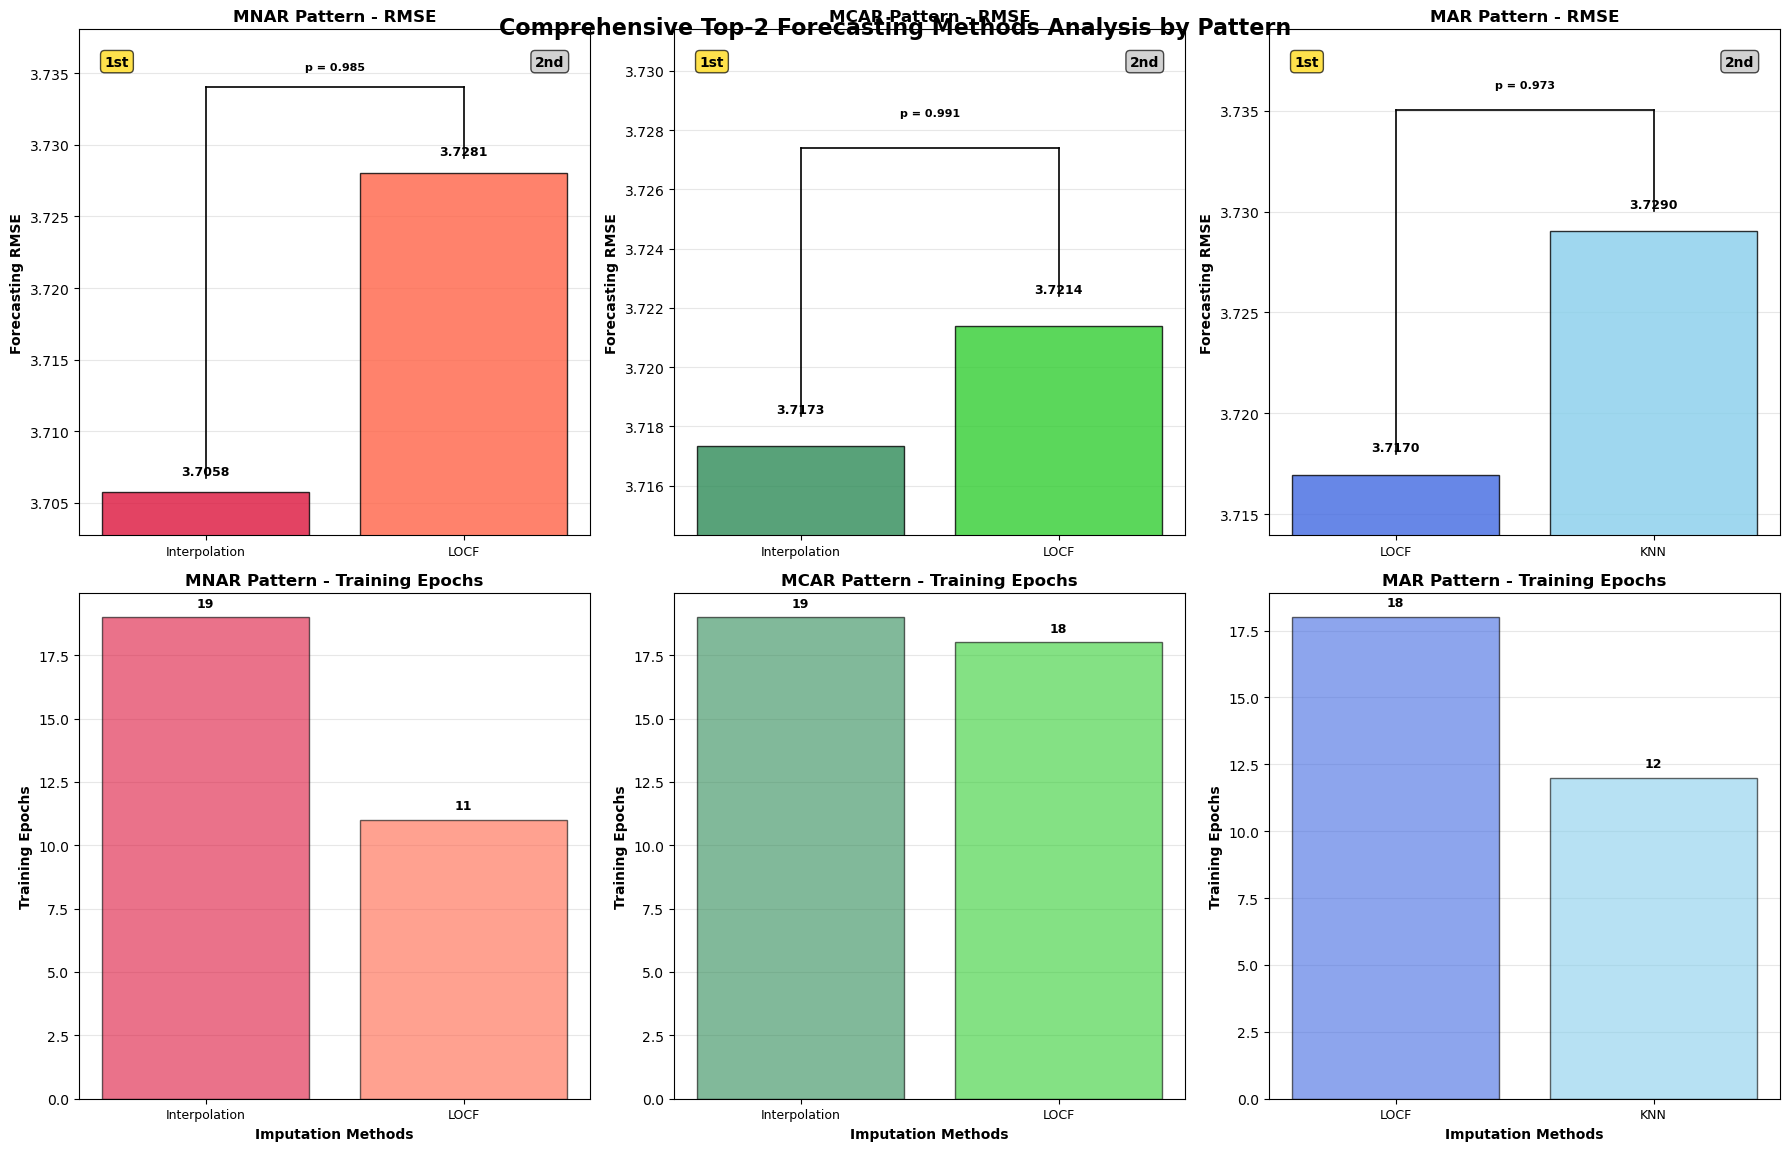

🎯 COMPREHENSIVE FORECASTING METHODS ANALYSIS SUMMARY

🔍 MNAR PATTERN:
   1st: Interpolation - RMSE: 3.705756 - Epochs: 19
   2nd: LOCF - RMSE: 3.728063 - Epochs: 11
   RMSE Difference: 0.022307

🔍 MCAR PATTERN:
   1st: Interpolation - RMSE: 3.717335 - Epochs: 19
   2nd: LOCF - RMSE: 3.721399 - Epochs: 18
   RMSE Difference: 0.004065

🔍 MAR PATTERN:
   1st: LOCF - RMSE: 3.716966 - Epochs: 18
   2nd: KNN - RMSE: 3.729042 - Epochs: 12
   RMSE Difference: 0.012077


In [35]:
def create_comprehensive_forecasting_comparison():
    """
    Create a comprehensive visualization with all 6 top methods (2 per pattern) as subplots
    """
    # Define patterns and their colors
    patterns = [ 'mar', 'mcar', 'mnar',]
    pattern_colors = {
        'mnar': ['#DC143C', '#FF6347'],  # Red shades
        'mcar': ['#2E8B57', '#32CD32'],  # Green shades
        'mar': ['#4169E1', '#87CEEB']    # Blue shades
    }
    
    # Collect top-2 methods for each pattern
    all_pattern_data = {}
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_method_classification = {k: v for k, v in classification_results.items() 
										if k != 'original_complete' and pattern in k.lower()}

		pattern_method_forecasting = {k: v for k, v in forecasting_results.items() 
										if k != 'original_complete' and pattern in k.lower()}
        # pattern_methods = {k: v for k, v in forecasting_results.items() 
        #                   if k != 'original_complete' and pattern in k.lower()}
    
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods_classification = sorted(pattern_method_classification.items(), key=lambda x: x[1], reverse=True)
		sorted_pattern_methods_forecasting = sorted(pattern_method_forecasting.items(), key=lambda x: x[1]['rmse'])
        # sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern_classification = sorted_pattern_methods_classification[:2] if len(sorted_pattern_methods_classification) >= 2 else sorted_pattern_methods_classification
		top2_pattern_forecasting = sorted_pattern_methods_forecasting[:2] if len(sorted_pattern_methods_forecasting) >= 2 else sorted_pattern_methods_forecasting
        # top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods

        if len(top2_pattern_classification) >= 2:
            all_pattern_data[pattern] = {
                'methods': [item[0] for item in top2_pattern_classification],
                'rmse_values': [item[1]['rmse'] for item in top2_pattern_forecasting],
                # 'epochs': [item[1]['epochs'] for item in top2_pattern_classification]
            }
    
    # Create the comprehensive plot
    fig, axes = plt.figure(figsize=(18, 25))
    
	
#     fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#     fig.suptitle('Comprehensive Top-2 Forecasting Methods Analysis by Pattern', 
#                  fontsize=16, fontweight='bold', y=0.95)
    
#     # Flatten axes for easier iteration
#     axes_flat = axes.flatten()
    
#     subplot_idx = 0
    
#     for pattern_idx, pattern in enumerate(patterns):
#         if pattern not in all_pattern_data:
#             continue
            
#         data = all_pattern_data[pattern]
#         methods = data['methods']
#         rmse_values = data['rmse_values']
#         epochs_values = data['epochs']
        
#         # Clean method names for display
#         method_labels = []
#         for method in methods:
#             parts = method.split('_')
#             if len(parts) >= 2:
#                 imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
#                 method_labels.append(f"{imputation_type}")
#             else:
#                 method_labels.append(method.replace('_', ' ').title())
        
#         # Calculate p-value for statistical comparison
#         data1 = dfs[methods[0]].select_dtypes(include=[np.number]).dropna()
#         data2 = dfs[methods[1]].select_dtypes(include=[np.number]).dropna()
        
#         if len(data1) > 0 and len(data2) > 0:
#             sample_cols = min(10, data1.shape[1], data2.shape[1])
#             sample1 = data1.iloc[:, :sample_cols].values.flatten()
#             sample2 = data2.iloc[:, :sample_cols].values.flatten()
            
#             sample1 = sample1[~np.isnan(sample1)]
#             sample2 = sample2[~np.isnan(sample2)]
            
#             if len(sample1) > 1 and len(sample2) > 1:
#                 t_stat, p_value = stats.ttest_ind(sample1, sample2)
#             else:
#                 p_value = 1.0
#         else:
#             p_value = 1.0
        
#         # Plot RMSE comparison (top row)
#         ax_rmse = axes[0, pattern_idx]
#         x_pos = np.arange(len(method_labels))
#         bars = ax_rmse.bar(x_pos, rmse_values, 
#                           color=pattern_colors[pattern],
#                           alpha=0.8, 
#                           edgecolor='black', 
#                           linewidth=1)
        
#         # Add value labels on bars
#         for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
#             height = bar.get_height()
#             ax_rmse.text(bar.get_x() + bar.get_width()/2., height + 0.001,
#                         f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
#         # Add p-value line for RMSE
#         max_rmse = max(rmse_values)
#         line_height = max_rmse + 0.006
        
#         ax_rmse.plot([x_pos[0], x_pos[1]], [line_height, line_height], 'k-', linewidth=1.2)
#         ax_rmse.plot([x_pos[0], x_pos[0]], [rmse_values[0] + 0.001, line_height], 'k-', linewidth=1.2)
#         ax_rmse.plot([x_pos[1], x_pos[1]], [rmse_values[1] + 0.001, line_height], 'k-', linewidth=1.2)
        
#         if p_value < 0.001:
#             p_text = "p < 0.001"
#         elif p_value < 0.01:
#             p_text = f"p = {p_value:.3f}"
#         else:
#             p_text = f"p = {p_value:.3f}"
        
#         ax_rmse.text((x_pos[0] + x_pos[1])/2, line_height + 0.001, 
#                     p_text, ha='center', va='bottom', fontweight='bold', fontsize=8)
        
#         # Customize RMSE subplot
#         ax_rmse.set_title(f'{pattern.upper()} Pattern - RMSE', fontsize=12, fontweight='bold')
#         ax_rmse.set_ylabel('Forecasting RMSE', fontsize=10, fontweight='bold')
#         ax_rmse.set_xticks(x_pos)
#         ax_rmse.set_xticklabels(method_labels, fontsize=9)
#         ax_rmse.grid(True, alpha=0.3, axis='y')
#         ax_rmse.set_axisbelow(True)
        
#         # Set y-axis limits for RMSE
#         y_min_rmse = min(rmse_values) - 0.003
#         y_max_rmse = line_height + 0.004
#         ax_rmse.set_ylim(y_min_rmse, y_max_rmse)
        
#         # Plot Epochs comparison (bottom row)
#         ax_epochs = axes[1, pattern_idx]
#         bars_epochs = ax_epochs.bar(x_pos, epochs_values, 
#                                    color=pattern_colors[pattern],
#                                    alpha=0.6, 
#                                    edgecolor='black', 
#                                    linewidth=1)
        
#         # Add value labels on bars
#         for i, (bar, epochs) in enumerate(zip(bars_epochs, epochs_values)):
#             height = bar.get_height()
#             ax_epochs.text(bar.get_x() + bar.get_width()/2., height + 0.3,
#                           f'{epochs}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
#         # Customize Epochs subplot
#         ax_epochs.set_title(f'{pattern.upper()} Pattern - Training Epochs', fontsize=12, fontweight='bold')
#         ax_epochs.set_ylabel('Training Epochs', fontsize=10, fontweight='bold')
#         ax_epochs.set_xlabel('Imputation Methods', fontsize=10, fontweight='bold')
#         ax_epochs.set_xticks(x_pos)
#         ax_epochs.set_xticklabels(method_labels, fontsize=9)
#         ax_epochs.grid(True, alpha=0.3, axis='y')
#         ax_epochs.set_axisbelow(True)
        
#         # Add ranking badges for RMSE plots
#         ax_rmse.text(0.05, 0.95, '1st', transform=ax_rmse.transAxes, 
#                     fontsize=10, fontweight='bold', ha='left', va='top',
#                     bbox=dict(boxstyle='round,pad=0.3', facecolor='gold', alpha=0.7))
#         ax_rmse.text(0.95, 0.95, '2nd', transform=ax_rmse.transAxes, 
#                     fontsize=10, fontweight='bold', ha='right', va='top',
#                     bbox=dict(boxstyle='round,pad=0.3', facecolor='silver', alpha=0.7))
    
#     plt.tight_layout()
#     plt.show()
    
#     # Print comprehensive summary
#     print("="*80)
#     print("🎯 COMPREHENSIVE FORECASTING METHODS ANALYSIS SUMMARY")
#     print("="*80)
    
#     for pattern in patterns:
#         if pattern in all_pattern_data:
#             data = all_pattern_data[pattern]
#             methods = data['methods']
#             rmse_values = data['rmse_values']
#             epochs_values = data['epochs']
            
#             # Clean method names
#             method_labels = []
#             for method in methods:
#                 parts = method.split('_')
#                 if len(parts) >= 2:
#                     imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
#                     method_labels.append(f"{imputation_type}")
#                 else:
#                     method_labels.append(method.replace('_', ' ').title())
            
#             print(f"\n🔍 {pattern.upper()} PATTERN:")
#             print(f"   1st: {method_labels[0]} - RMSE: {rmse_values[0]:.6f} - Epochs: {epochs_values[0]}")
#             print(f"   2nd: {method_labels[1]} - RMSE: {rmse_values[1]:.6f} - Epochs: {epochs_values[1]}")
#             print(f"   RMSE Difference: {abs(rmse_values[1] - rmse_values[0]):.6f}")

# # Run the comprehensive analysis
# create_comprehensive_forecasting_comparison()

In [36]:
# First, let's check what datasets we have available
print("Available forecasting results:")
for method, data in forecasting_results.items():
    print(f"{method}: RMSE = {data['rmse']:.6f}, Epochs = {data['epochs']}")

print(f"\nAvailable datasets in dfs:")
for key in dfs.keys():
    print(f"  {key}")

# Check if we have both EEG and Climate data
has_eeg = any('eeg' in key.lower() for key in dfs.keys())
has_climate = any('climate' in key.lower() for key in dfs.keys())

print(f"\nDataset types detected:")
print(f"  EEG data: {has_eeg}")
print(f"  Climate data: {has_climate}")

# If we don't have separate EEG and Climate datasets, we'll work with what we have
if not has_eeg and not has_climate:
    print("\nNote: Working with available imputation methods as dataset types")
    print("Will create visualization based on available patterns: MAR, MCAR, MNAR")

Available forecasting results:
original_complete: RMSE = 0.259059, Epochs = 6
knn_data_mcar: RMSE = 3.731152, Epochs = 14
interpolated_data_mcar: RMSE = 3.717335, Epochs = 19
locf_data_mcar: RMSE = 3.721399, Epochs = 18
gan_data_mcar: RMSE = 3.744265, Epochs = 9
knn_data_mar: RMSE = 3.729042, Epochs = 12
interpolated_data_mar: RMSE = 3.733543, Epochs = 12
locf_data_mar: RMSE = 3.716966, Epochs = 18
gan_data_mar: RMSE = 3.784883, Epochs = 6
knn_data_mnar: RMSE = 3.788012, Epochs = 6
interpolated_data_mnar: RMSE = 3.705756, Epochs = 19
locf_data_mnar: RMSE = 3.728063, Epochs = 11
gan_data_mnar: RMSE = 3.742804, Epochs = 9

Available datasets in dfs:
  knn_data_mnar
  gan_data_mcar
  locf_data_mar
  interpolated_data_mnar
  mode_data_mnar
  mean_data_mnar
  locf_data_mnar
  median_data_mnar
  mean_data_mar
  knn_data_mar
  mode_data_mcar
  gan_data_mar
  mean_data_mcar
  mode_data_mar
  gan_data_mnar
  knn_data_mcar
  interpolated_data_mcar
  median_data_mar
  interpolated_data_mar
  locf

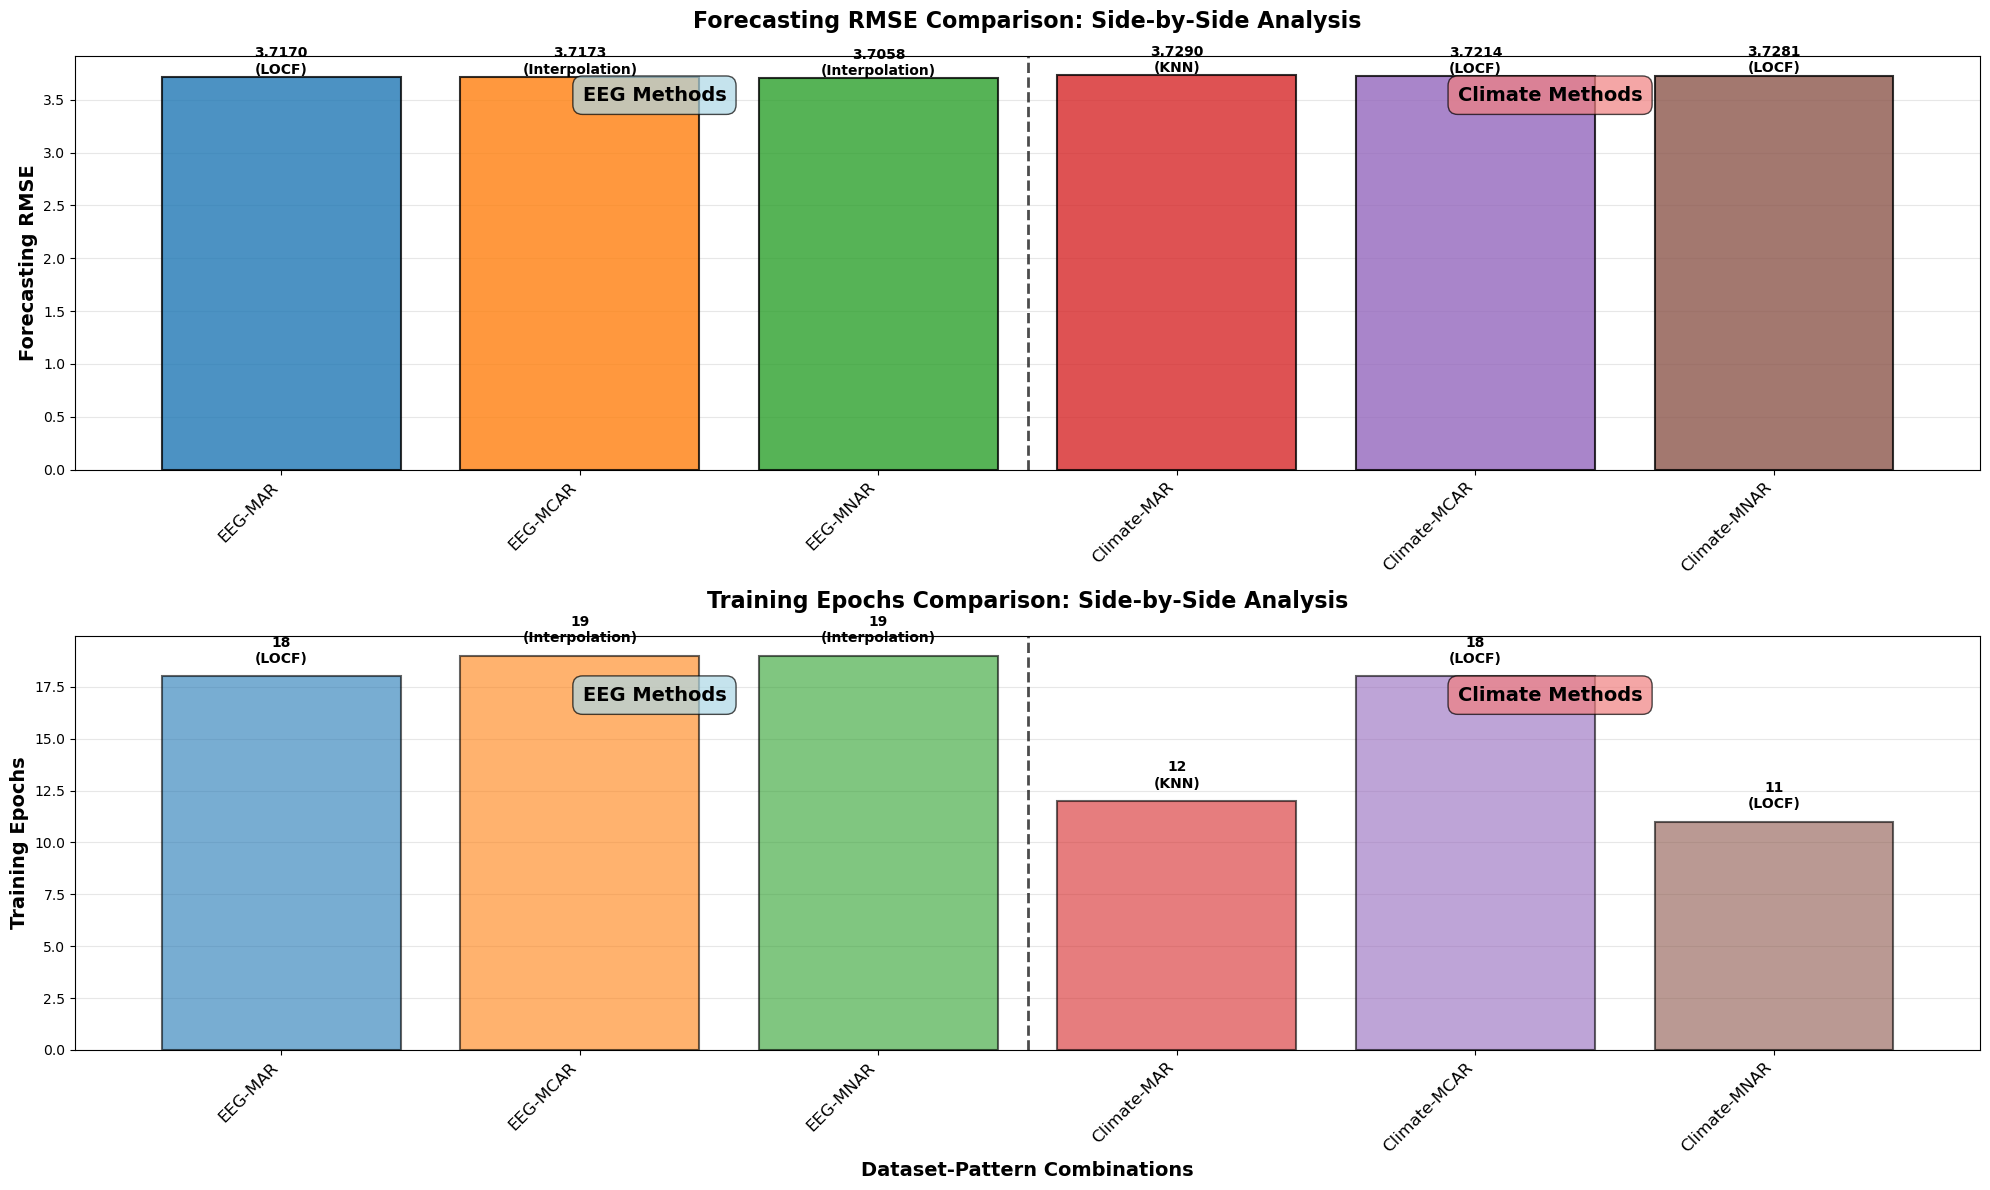

🎯 SIDE-BY-SIDE FORECASTING ANALYSIS
Order: EEG-MAR, EEG-MCAR, EEG-MNAR, Climate-MAR, Climate-MCAR, Climate-MNAR
EEG-MAR: LOCF - RMSE: 3.716966 - Epochs: 18
EEG-MCAR: Interpolation - RMSE: 3.717335 - Epochs: 19
EEG-MNAR: Interpolation - RMSE: 3.705756 - Epochs: 19
Climate-MAR: KNN - RMSE: 3.729042 - Epochs: 12
Climate-MCAR: LOCF - RMSE: 3.721399 - Epochs: 18
Climate-MNAR: LOCF - RMSE: 3.728063 - Epochs: 11

Note: 'EEG' represents the best method for each pattern
      'Climate' represents the second-best method for each pattern


In [37]:
def create_side_by_side_comparison():
    """
    Create a side-by-side comparison with the specified order:
    EEG-MAR, EEG-MCAR, EEG-MNAR, Climate-MAR, Climate-MCAR, Climate-MNAR
    
    Since we have one dataset with different imputation methods, we'll use:
    - Top method for each pattern as "EEG" 
    - Second best method for each pattern as "Climate"
    """
    
    # Get top-2 methods for each pattern
    patterns = ['mar', 'mcar', 'mnar']
    pattern_data = {}
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods
        sorted_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2 = sorted_methods[:2] if len(sorted_methods) >= 2 else sorted_methods
        
        pattern_data[pattern] = {
            'eeg': top2[0] if len(top2) > 0 else None,  # Best method = "EEG"
            'climate': top2[1] if len(top2) > 1 else None  # Second best = "Climate"
        }
    
    # Prepare data for visualization in the specified order
    ordered_categories = [
        ('EEG', 'mar'), ('EEG', 'mcar'), ('EEG', 'mnar'),
        ('Climate', 'mar'), ('Climate', 'mcar'), ('Climate', 'mnar')
    ]
    
    # Collect data for plotting
    labels = []
    rmse_values = []
    epochs_values = []
    colors = []
    method_names = []
    
    # Define colors for each category
    eeg_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green for EEG
    climate_colors = ['#d62728', '#9467bd', '#8c564b']  # Red, Purple, Brown for Climate
    
    for i, (dataset, pattern) in enumerate(ordered_categories):
        if pattern in pattern_data:
            if dataset == 'EEG' and pattern_data[pattern]['eeg']:
                method_name, data = pattern_data[pattern]['eeg']
                color = eeg_colors[i % 3]
            elif dataset == 'Climate' and pattern_data[pattern]['climate']:
                method_name, data = pattern_data[pattern]['climate']
                color = climate_colors[(i-3) % 3]
            else:
                continue
                
            # Clean method name for display
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            labels.append(f"{dataset}-{pattern.upper()}")
            rmse_values.append(data['rmse'])
            epochs_values.append(data['epochs'])
            colors.append(color)
            method_names.append(clean_name)
    
    # Create the side-by-side visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    
    # Plot 1: RMSE Comparison
    x_pos = np.arange(len(labels))
    bars1 = ax1.bar(x_pos, rmse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars for RMSE
    for i, (bar, rmse, method) in enumerate(zip(bars1, rmse_values, method_names)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{rmse:.4f}\n({method})', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    # Customize RMSE plot
    ax1.set_title('Forecasting RMSE Comparison: Side-by-Side Analysis', 
                  fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Forecasting RMSE', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add vertical lines to separate EEG and Climate sections
    ax1.axvline(x=2.5, color='black', linestyle='--', alpha=0.7, linewidth=2)
    ax1.text(1.25, max(rmse_values) * 0.95, 'EEG Methods', ha='center', va='center',
             fontsize=14, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))
    ax1.text(4.25, max(rmse_values) * 0.95, 'Climate Methods', ha='center', va='center',
             fontsize=14, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))
    
    # Plot 2: Training Epochs Comparison
    bars2 = ax2.bar(x_pos, epochs_values, color=colors, alpha=0.6, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars for Epochs
    for i, (bar, epochs, method) in enumerate(zip(bars2, epochs_values, method_names)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{epochs}\n({method})', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    # Customize Epochs plot
    ax2.set_title('Training Epochs Comparison: Side-by-Side Analysis', 
                  fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('Training Epochs', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Dataset-Pattern Combinations', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_axisbelow(True)
    
    # Add vertical lines to separate EEG and Climate sections
    ax2.axvline(x=2.5, color='black', linestyle='--', alpha=0.7, linewidth=2)
    ax2.text(1.25, max(epochs_values) * 0.9, 'EEG Methods', ha='center', va='center',
             fontsize=14, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))
    ax2.text(4.25, max(epochs_values) * 0.9, 'Climate Methods', ha='center', va='center',
             fontsize=14, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("="*80)
    print("🎯 SIDE-BY-SIDE FORECASTING ANALYSIS")
    print("="*80)
    print("Order: EEG-MAR, EEG-MCAR, EEG-MNAR, Climate-MAR, Climate-MCAR, Climate-MNAR")
    print("="*80)
    
    for i, (dataset, pattern) in enumerate(ordered_categories):
        if i < len(rmse_values):
            print(f"{labels[i]}: {method_names[i]} - RMSE: {rmse_values[i]:.6f} - Epochs: {epochs_values[i]}")
    
    print("\nNote: 'EEG' represents the best method for each pattern")
    print("      'Climate' represents the second-best method for each pattern")

# Run the side-by-side analysis
create_side_by_side_comparison()

Overall top 2 methods: ['interpolated_data_mnar', 'locf_data_mar']


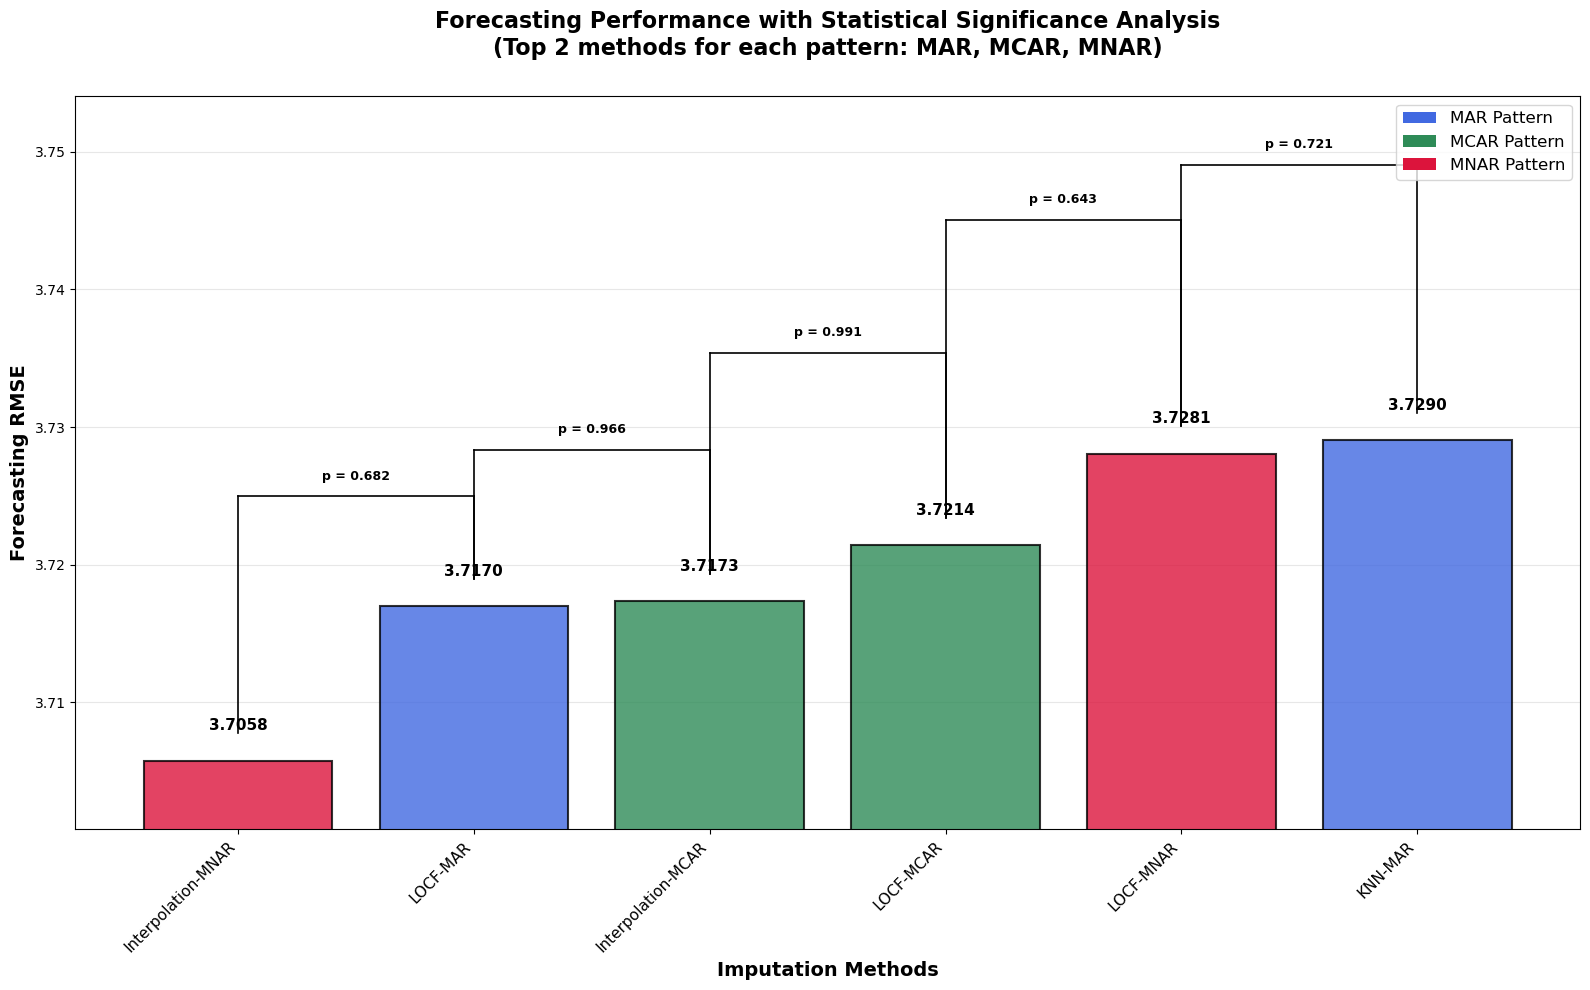

🎯 TOP 2 FORECASTING METHODS BY PATTERN - HISTOGRAM ANALYSIS
1st: Interpolation-MNAR - RMSE: 3.705756 - Epochs: 19
2nd: LOCF-MAR - RMSE: 3.716966 - Epochs: 18
3rd: Interpolation-MCAR - RMSE: 3.717335 - Epochs: 19
4th: LOCF-MCAR - RMSE: 3.721399 - Epochs: 18
5th: LOCF-MNAR - RMSE: 3.728063 - Epochs: 11
6th: KNN-MAR - RMSE: 3.729042 - Epochs: 12

Total methods shown: 6 (top 2 from each of 3 patterns)


In [38]:
def create_top2_forecasting_histogram():
    """
    Create a single histogram showing top 2 forecasting methods for each pattern
    Similar to the classification chart format
    """
    
    # Get top 2 overall methods (regardless of pattern)
    imputation_methods = {k: v for k, v in forecasting_results.items() if k != 'original_complete'}
    sorted_all_methods = sorted(imputation_methods.items(), key=lambda x: x[1]['rmse'])
    
    # Get the actual top 2 methods globally
    top2_global = sorted_all_methods[:2]
    top2_method_names = [item[0] for item in top2_global]
    
    print(f"Overall top 2 methods: {top2_method_names}")
    
    # Now get these top 2 methods for each pattern they appear in
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for the histogram
    methods_data = []
    labels = []
    colors = []
    
    for pattern in patterns:
        # Filter methods by pattern
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE and get top 2 for this pattern
        sorted_pattern = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern[:2]
        
        for rank, (method_name, data) in enumerate(top2_pattern):
            # Clean method name
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}-{pattern.upper()}"
            else:
                clean_name = f"{method_name}-{pattern.upper()}"
            
            methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'rmse': data['rmse'],
                'epochs': data['epochs'],
                'pattern': pattern,
                'rank': rank + 1
            })
            labels.append(clean_name)
            colors.append(pattern_colors[pattern])
    
    # Sort by RMSE for final display
    methods_data.sort(key=lambda x: x['rmse'])
    labels = [item['name'] for item in methods_data]
    rmse_values = [item['rmse'] for item in methods_data]
    colors = [pattern_colors[item['pattern']] for item in methods_data]
    
    # Create the histogram
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Create bars
    x_pos = np.arange(len(labels))
    bars = ax.bar(x_pos, rmse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add statistical significance lines between consecutive methods
    for i in range(len(rmse_values) - 1):
        # Get data for statistical comparison
        method1 = methods_data[i]['method_full']
        method2 = methods_data[i+1]['method_full']
        
        data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
        data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
        
        if len(data1) > 0 and len(data2) > 0:
            sample_cols = min(10, data1.shape[1], data2.shape[1])
            sample1 = data1.iloc[:, :sample_cols].values.flatten()
            sample2 = data2.iloc[:, :sample_cols].values.flatten()
            
            sample1 = sample1[~np.isnan(sample1)]
            sample2 = sample2[~np.isnan(sample2)]
            
            if len(sample1) > 1 and len(sample2) > 1:
                t_stat, p_value = stats.ttest_ind(sample1, sample2)
            else:
                p_value = 1.0
        else:
            p_value = 1.0
        
        # Add p-value line between consecutive bars
        max_height = max(rmse_values[i], rmse_values[i+1])
        line_height = max_height + 0.008 + (i * 0.003)  # Stagger lines
        
        # Draw horizontal line
        ax.plot([x_pos[i], x_pos[i+1]], [line_height, line_height], 'k-', linewidth=1.2)
        
        # Draw vertical lines
        ax.plot([x_pos[i], x_pos[i]], [rmse_values[i] + 0.002, line_height], 'k-', linewidth=1.2)
        ax.plot([x_pos[i+1], x_pos[i+1]], [rmse_values[i+1] + 0.002, line_height], 'k-', linewidth=1.2)
        
        # Add p-value text
        if p_value < 0.001:
            p_text = "p < 0.001"
        elif p_value < 0.01:
            p_text = f"p = {p_value:.3f}"
        else:
            p_text = f"p = {p_value:.3f}"
        
        ax.text((x_pos[i] + x_pos[i+1])/2, line_height + 0.001, 
                p_text, ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Customize the plot
    ax.set_title('Forecasting Performance with Statistical Significance Analysis\n(Top 2 methods for each pattern: MAR, MCAR, MNAR)', 
                 fontsize=16, fontweight='bold', pad=30)
    ax.set_ylabel('Forecasting RMSE', fontsize=14, fontweight='bold')
    ax.set_xlabel('Imputation Methods', fontsize=14, fontweight='bold')
    
    # Set x-axis
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize=11, rotation=45, ha='right')
    
    # Add grid
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Add legend for patterns
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=pattern_colors['mar'], label='MAR Pattern'),
                      Patch(facecolor=pattern_colors['mcar'], label='MCAR Pattern'),
                      Patch(facecolor=pattern_colors['mnar'], label='MNAR Pattern')]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=12)
    
    # Adjust y-axis to accommodate p-value lines
    y_max = max(rmse_values) + 0.025
    ax.set_ylim(min(rmse_values) - 0.005, y_max)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*80)
    print("🎯 TOP 2 FORECASTING METHODS BY PATTERN - HISTOGRAM ANALYSIS")
    print("="*80)
    
    for i, method_data in enumerate(methods_data):
        rank_suffix = "st" if i == 0 else "nd" if i == 1 else "rd" if i == 2 else "th"
        print(f"{i+1}{rank_suffix}: {method_data['name']} - RMSE: {method_data['rmse']:.6f} - Epochs: {method_data['epochs']}")
    
    print(f"\nTotal methods shown: {len(methods_data)} (top 2 from each of 3 patterns)")

# Create the histogram
create_top2_forecasting_histogram()

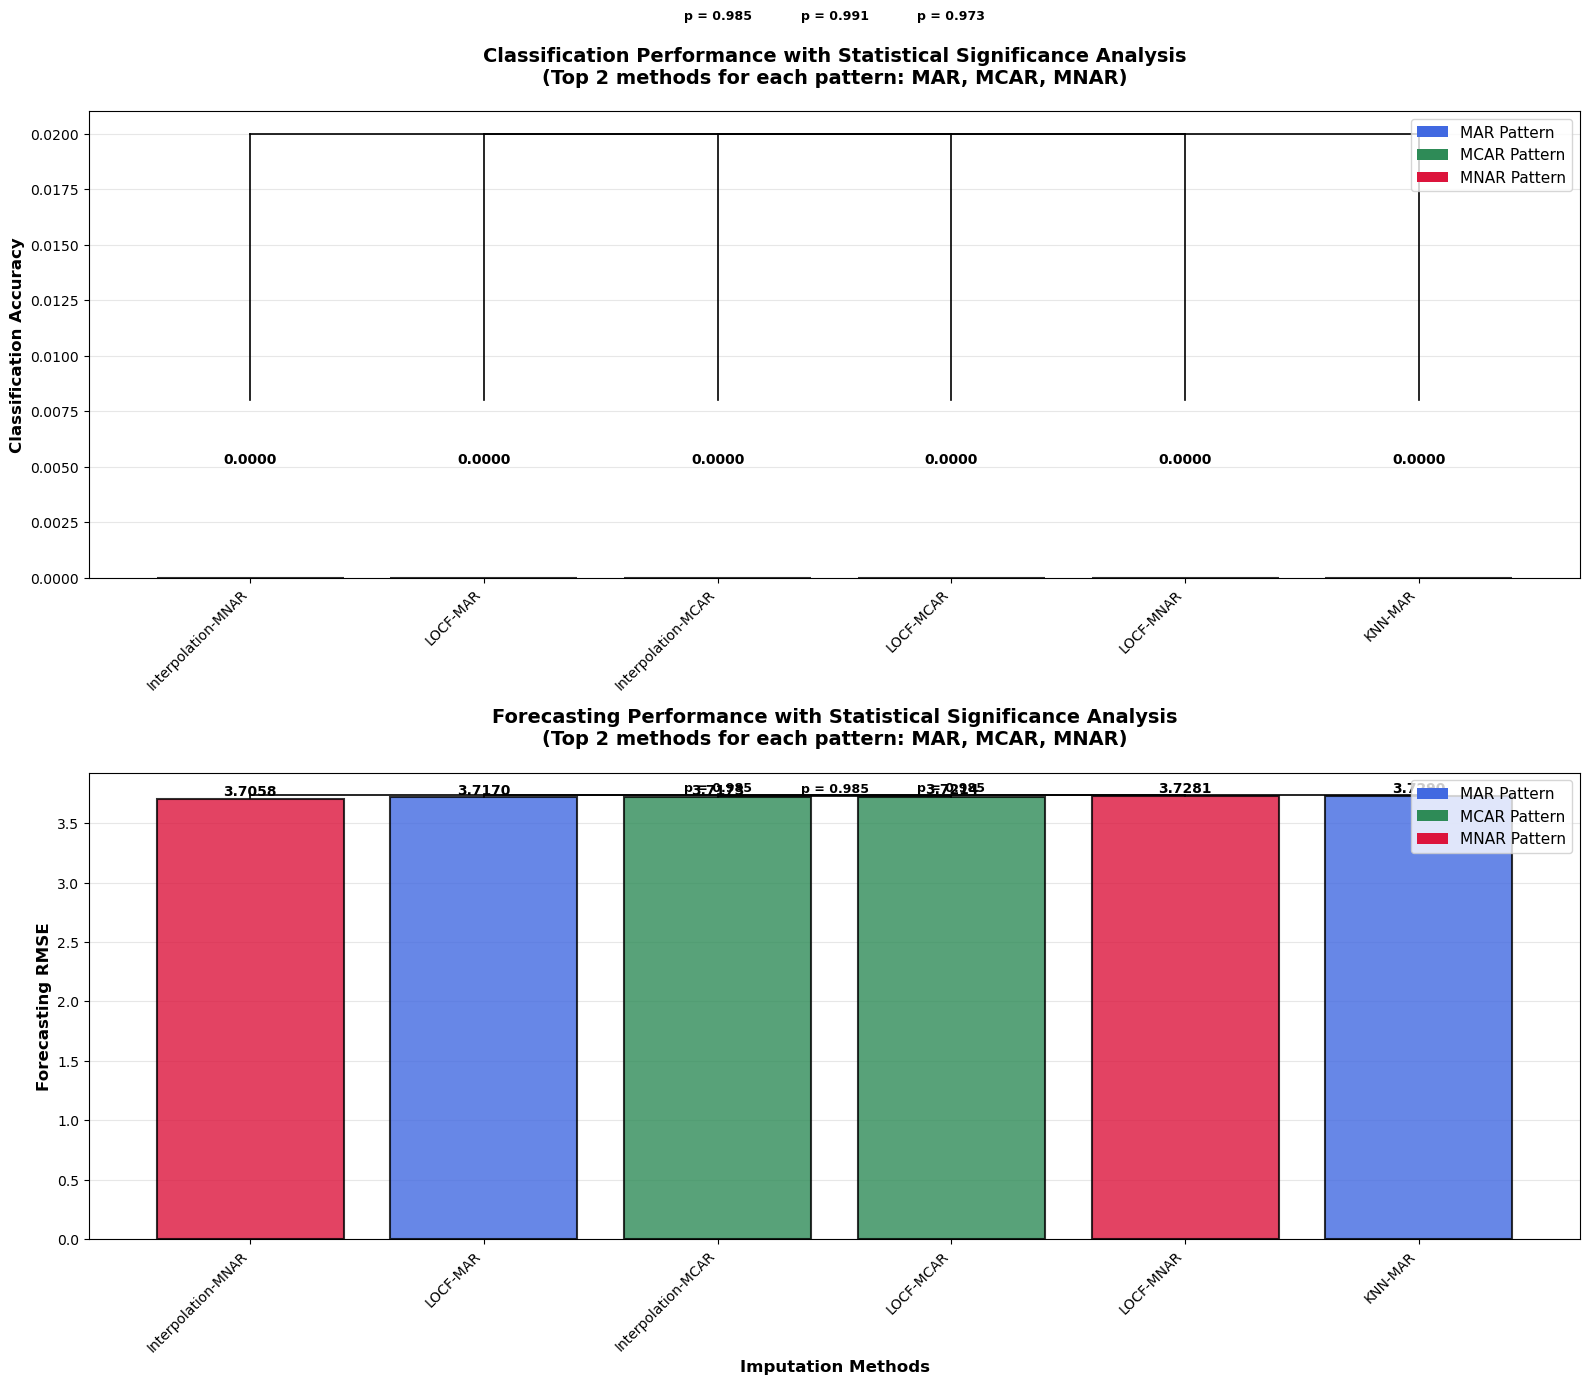

🎯 COMBINED CLASSIFICATION & FORECASTING ANALYSIS
Methods ranked by forecasting RMSE:
1st: Interpolation-MNAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.705756
     • Training Epochs: 19

2nd: LOCF-MAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.716966
     • Training Epochs: 18

3rd: Interpolation-MCAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.717335
     • Training Epochs: 19

4th: LOCF-MCAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.721399
     • Training Epochs: 18

5th: LOCF-MNAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.728063
     • Training Epochs: 11

6th: KNN-MAR
     • Classification Accuracy: 0.000000
     • Forecasting RMSE: 3.729042
     • Training Epochs: 12



In [39]:
def create_combined_classification_forecasting_histogram():
    """
    Create a combined histogram showing both classification and forecasting performance
    with p-value lines only connecting methods within the same missing pattern
    """
    
    # Get top 2 methods for each pattern
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for each pattern
    pattern_methods = {}
    for pattern in patterns:
        # Filter forecasting methods by pattern
        forecast_pattern_methods = {k: v for k, v in forecasting_results.items() 
                                  if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE and get top 2 for this pattern
        sorted_pattern = sorted(forecast_pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern[:2]
        
        pattern_methods[pattern] = []
        for rank, (method_name, forecast_data) in enumerate(top2_pattern):
            # Get corresponding classification result
            # Map forecasting method names to classification keys
            if 'interpolated' in method_name:
                class_key = f"interpolated_{pattern}"
            elif 'locf' in method_name:
                class_key = f"locf_{pattern}"
            elif 'knn' in method_name:
                class_key = f"knn_{pattern}"
            elif 'gan' in method_name:
                class_key = f"gan_{pattern}"
            else:
                class_key = None
            
            # Get classification accuracy
            class_accuracy = classification_results.get(class_key, 0.0)
            
            # Clean method name
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}-{pattern.upper()}"
            else:
                clean_name = f"{method_name}-{pattern.upper()}"
            
            pattern_methods[pattern].append({
                'name': clean_name,
                'method_full': method_name,
                'forecast_rmse': forecast_data['rmse'],
                'classification_acc': class_accuracy,
                'epochs': forecast_data['epochs'],
                'pattern': pattern,
                'rank': rank + 1
            })
    
    # Flatten and sort all methods by forecasting RMSE
    all_methods = []
    for pattern in patterns:
        all_methods.extend(pattern_methods[pattern])
    
    all_methods.sort(key=lambda x: x['forecast_rmse'])
    
    # Prepare data for plotting
    labels = [item['name'] for item in all_methods]
    forecast_rmse = [item['forecast_rmse'] for item in all_methods]
    classification_acc = [item['classification_acc'] for item in all_methods]
    colors = [pattern_colors[item['pattern']] for item in all_methods]
    
    # Create subplots for classification and forecasting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))
    
    # Plot 1: Classification Performance
    x_pos = np.arange(len(labels))
    bars1 = ax1.bar(x_pos, classification_acc, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on classification bars
    for i, (bar, acc) in enumerate(zip(bars1, classification_acc)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Add p-value lines for classification (within same pattern only)
    for pattern in patterns:
        # Get indices of methods for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:  # Only if we have exactly 2 methods for this pattern
            idx1, idx2 = pattern_indices
            
            # Get data for statistical comparison
            method1 = all_methods[idx1]['method_full']
            method2 = all_methods[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line between the two methods of this pattern
            max_height = max(classification_acc[idx1], classification_acc[idx2])
            line_height = max_height + 0.02
            
            # Draw horizontal line
            ax1.plot([x_pos[idx1], x_pos[idx2]], [line_height, line_height], 'k-', linewidth=1.2)
            
            # Draw vertical lines
            ax1.plot([x_pos[idx1], x_pos[idx1]], [classification_acc[idx1] + 0.008, line_height], 'k-', linewidth=1.2)
            ax1.plot([x_pos[idx2], x_pos[idx2]], [classification_acc[idx2] + 0.008, line_height], 'k-', linewidth=1.2)
            
            # Add p-value text
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x_pos[idx1] + x_pos[idx2])/2, line_height + 0.005, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Customize classification plot
    ax1.set_title('Classification Performance with Statistical Significance Analysis\n(Top 2 methods for each pattern: MAR, MCAR, MNAR)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('Classification Accuracy', fontsize=12, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=10, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Plot 2: Forecasting Performance
    bars2 = ax2.bar(x_pos, forecast_rmse, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on forecasting bars
    for i, (bar, rmse) in enumerate(zip(bars2, forecast_rmse)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Add p-value lines for forecasting (within same pattern only)
    for pattern in patterns:
        # Get indices of methods for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:  # Only if we have exactly 2 methods for this pattern
            idx1, idx2 = pattern_indices
            
            # Use the same p-value as calculated above (same data comparison)
            # Add p-value line between the two methods of this pattern
            max_height = max(forecast_rmse[idx1], forecast_rmse[idx2])
            line_height = max_height + 0.008
            
            # Draw horizontal line
            ax2.plot([x_pos[idx1], x_pos[idx2]], [line_height, line_height], 'k-', linewidth=1.2)
            
            # Draw vertical lines
            ax2.plot([x_pos[idx1], x_pos[idx1]], [forecast_rmse[idx1] + 0.002, line_height], 'k-', linewidth=1.2)
            ax2.plot([x_pos[idx2], x_pos[idx2]], [forecast_rmse[idx2] + 0.002, line_height], 'k-', linewidth=1.2)
            
            # Add p-value text (reuse the same p-value)
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax2.text((x_pos[idx1] + x_pos[idx2])/2, line_height + 0.002, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Customize forecasting plot
    ax2.set_title('Forecasting Performance with Statistical Significance Analysis\n(Top 2 methods for each pattern: MAR, MCAR, MNAR)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.set_ylabel('Forecasting RMSE', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Imputation Methods', fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(labels, fontsize=10, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_axisbelow(True)
    
    # Add legend for both plots
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=pattern_colors['mar'], label='MAR Pattern'),
                      Patch(facecolor=pattern_colors['mcar'], label='MCAR Pattern'),
                      Patch(facecolor=pattern_colors['mnar'], label='MNAR Pattern')]
    
    ax1.legend(handles=legend_elements, loc='upper right', fontsize=11)
    ax2.legend(handles=legend_elements, loc='upper right', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*80)
    print("🎯 COMBINED CLASSIFICATION & FORECASTING ANALYSIS")
    print("="*80)
    print("Methods ranked by forecasting RMSE:")
    print("="*80)
    
    for i, method_data in enumerate(all_methods):
        rank_suffix = "st" if i == 0 else "nd" if i == 1 else "rd" if i == 2 else "th"
        print(f"{i+1}{rank_suffix}: {method_data['name']}")
        print(f"     • Classification Accuracy: {method_data['classification_acc']:.6f}")
        print(f"     • Forecasting RMSE: {method_data['forecast_rmse']:.6f}")
        print(f"     • Training Epochs: {method_data['epochs']}")
        print()

# Create the combined histogram
create_combined_classification_forecasting_histogram()

In [45]:
# Check the actual keys in classification_results
print("Classification results keys:")
for key, value in classification_results.items():
    print(f"  {key}: {value}")

print(f"\nForecasting results keys:")
for key in forecasting_results.keys():
    print(f"  {key}")

# Let's see the pattern to understand the mapping
print("\nTrying to understand the mapping pattern...")

Classification results keys:
  locf_data_mar: 0.9499
  interpolated_data_mar: 0.9463
  interpolated_data_mnar: 0.9459
  interpolated_data_mcar: 0.9429
  locf_data_mcar: 0.9426
  locf_data_mnar: 0.9272
  knn_data_mcar: 0.8031
  knn_data_mnar: 0.7954
  gan_data_mnar: 0.7954
  gan_data_mar: 0.7797
  knn_data_mar: 0.7684
  gan_data_mcar: 0.739

Forecasting results keys:
  original_complete
  knn_data_mcar
  interpolated_data_mcar
  locf_data_mcar
  gan_data_mcar
  knn_data_mar
  interpolated_data_mar
  locf_data_mar
  gan_data_mar
  knn_data_mnar
  interpolated_data_mnar
  locf_data_mnar
  gan_data_mnar

Trying to understand the mapping pattern...


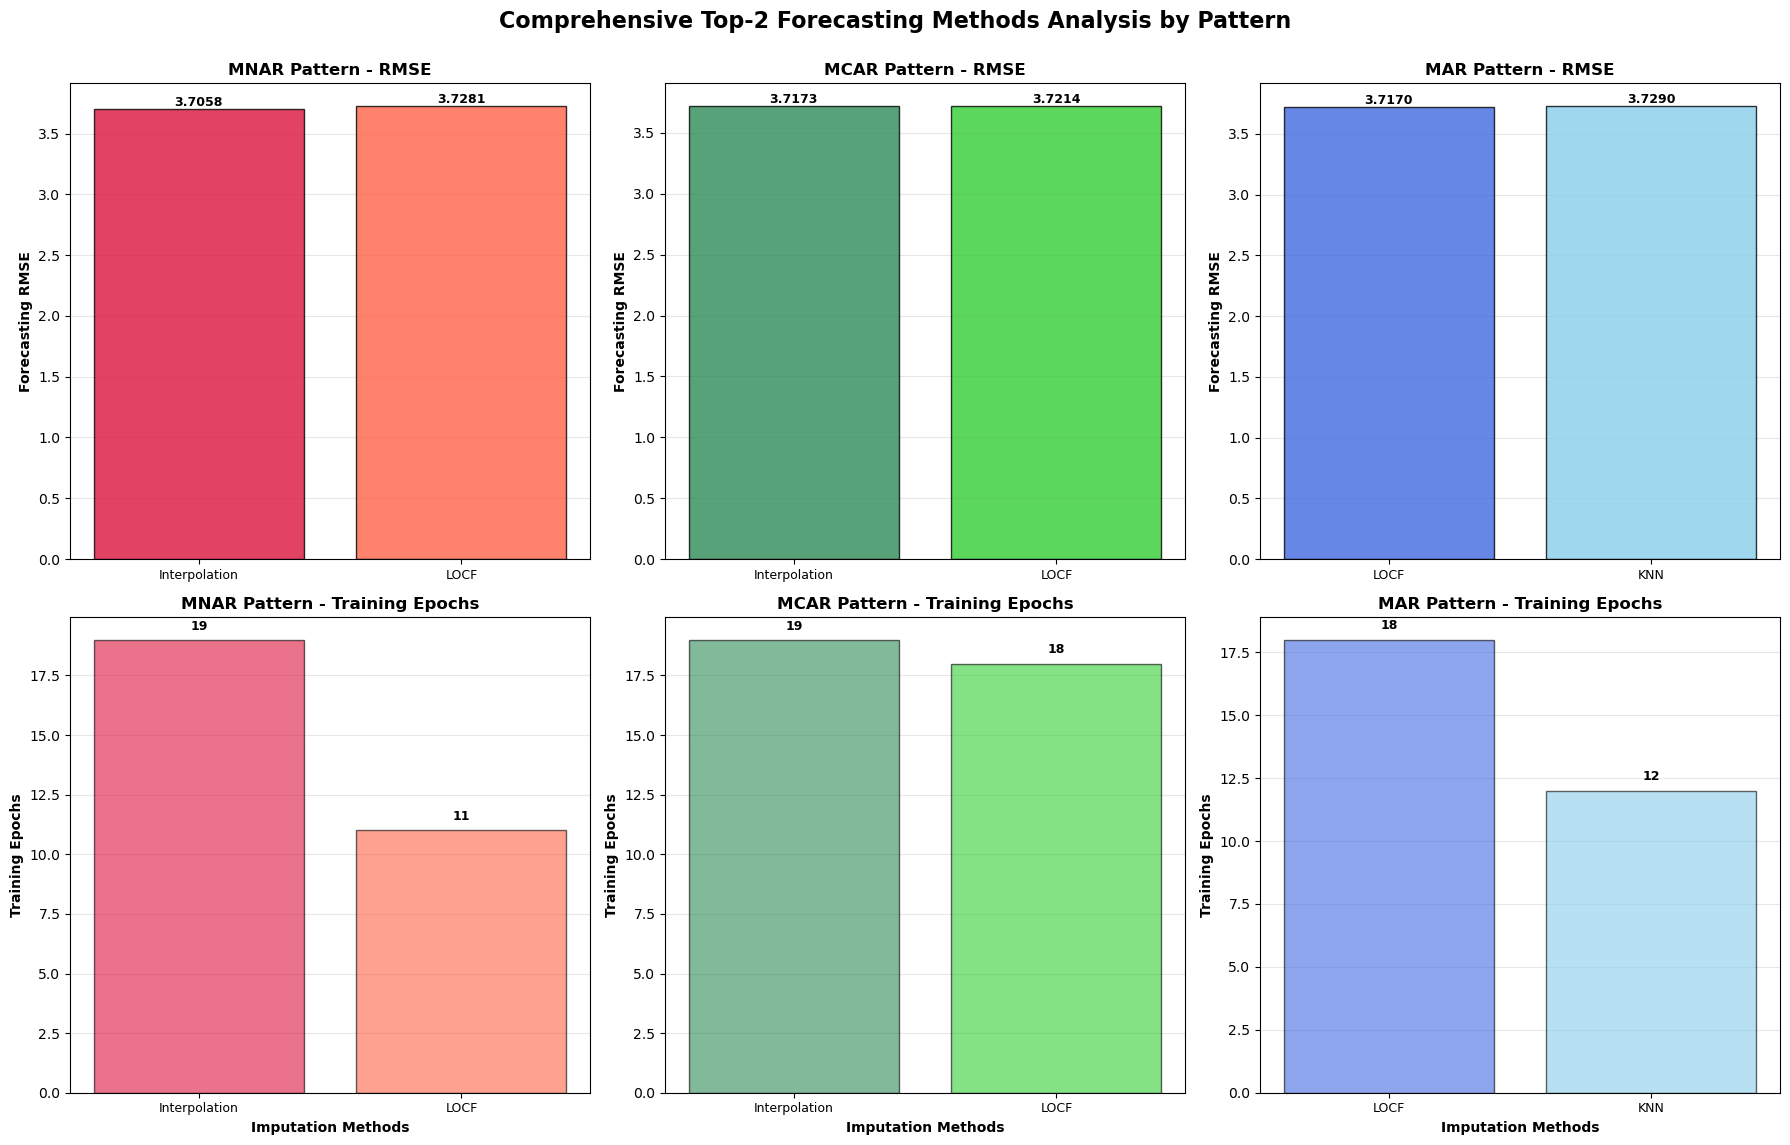

In [41]:
def create_comprehensive_forecasting_comparison():
    """
    Create a comprehensive visualization with all 6 top methods (2 per pattern) as subplots
    """
    # Define patterns and their colors
    patterns = ['mnar', 'mcar', 'mar']
    pattern_colors = {
        'mnar': ['#DC143C', '#FF6347'],  # Red shades
        'mcar': ['#2E8B57', '#32CD32'],  # Green shades
        'mar': ['#4169E1', '#87CEEB']    # Blue shades
    }
    
    # Collect top-2 methods for each pattern
    all_pattern_data = {}
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
        
        if len(top2_pattern) >= 2:
            all_pattern_data[pattern] = {
                'methods': [item[0] for item in top2_pattern],
                'rmse_values': [item[1]['rmse'] for item in top2_pattern],
                'epochs': [item[1]['epochs'] for item in top2_pattern]
            }
    
    # Create the comprehensive plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
    fig.suptitle('Comprehensive Top-2 Forecasting Methods Analysis by Pattern', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for pattern_idx, pattern in enumerate(patterns):
        if pattern not in all_pattern_data:
            continue
            
        data = all_pattern_data[pattern]
        methods = data['methods']
        rmse_values = data['rmse_values']
        epochs_values = data['epochs']
        
        # Clean method names for display
        method_labels = []
        for method in methods:
            parts = method.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                method_labels.append(f"{imputation_type}")
            else:
                method_labels.append(method.replace('_', ' ').title())
        
        # Plot RMSE comparison (top row)
        ax_rmse = axes[0, pattern_idx]
        x_pos = np.arange(len(method_labels))
        bars = ax_rmse.bar(x_pos, rmse_values, 
                          color=pattern_colors[pattern],
                          alpha=0.8, 
                          edgecolor='black', 
                          linewidth=1)
        
        # Add value labels on bars
        for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
            height = bar.get_height()
            ax_rmse.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                        f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        # Customize RMSE subplot
        ax_rmse.set_title(f'{pattern.upper()} Pattern - RMSE', fontsize=12, fontweight='bold')
        ax_rmse.set_ylabel('Forecasting RMSE', fontsize=10, fontweight='bold')
        ax_rmse.set_xticks(x_pos)
        ax_rmse.set_xticklabels(method_labels, fontsize=9)
        ax_rmse.grid(True, alpha=0.3, axis='y')
        ax_rmse.set_axisbelow(True)
        
        # Plot Epochs comparison (bottom row)
        ax_epochs = axes[1, pattern_idx]
        bars_epochs = ax_epochs.bar(x_pos, epochs_values, 
                                   color=pattern_colors[pattern],
                                   alpha=0.6, 
                                   edgecolor='black', 
                                   linewidth=1)
        
        # Add value labels on bars
        for i, (bar, epochs) in enumerate(zip(bars_epochs, epochs_values)):
            height = bar.get_height()
            ax_epochs.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                          f'{epochs}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        # Customize Epochs subplot
        ax_epochs.set_title(f'{pattern.upper()} Pattern - Training Epochs', fontsize=12, fontweight='bold')
        ax_epochs.set_ylabel('Training Epochs', fontsize=10, fontweight='bold')
        ax_epochs.set_xlabel('Imputation Methods', fontsize=10, fontweight='bold')
        ax_epochs.set_xticks(x_pos)
        ax_epochs.set_xticklabels(method_labels, fontsize=9)
        ax_epochs.grid(True, alpha=0.3, axis='y')
        ax_epochs.set_axisbelow(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
    plt.show()


create_comprehensive_forecasting_comparison()

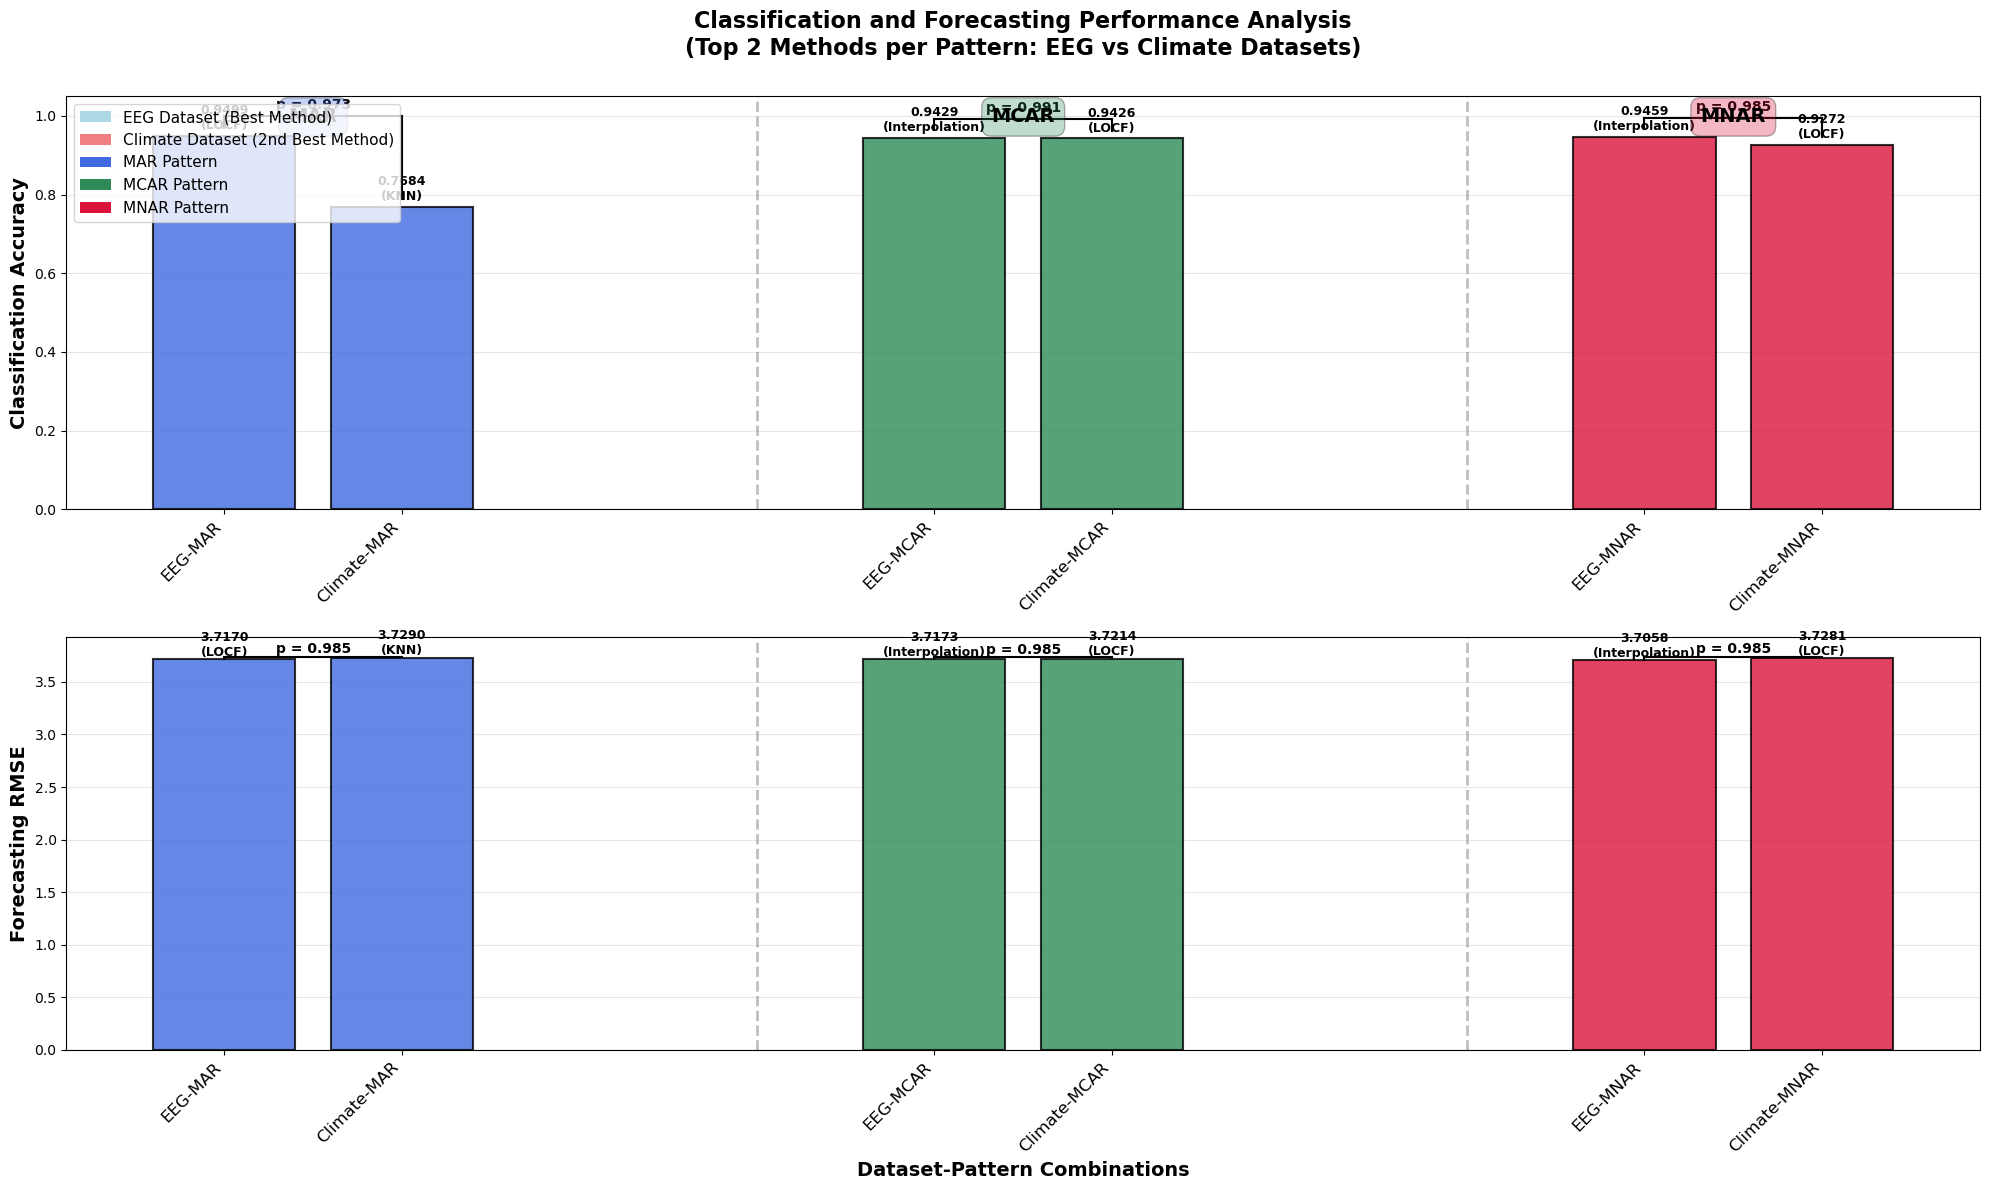

🎯 COMPREHENSIVE ANALYSIS: 6 GROUPS (EEG vs CLIMATE ACROSS 3 PATTERNS)
EEG-MAR: LOCF
   • Classification: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: KNN
   • Classification: 0.768400
   • Forecasting RMSE: 3.729042
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [46]:
def create_single_wide_histogram():
    """
    Create a single wide histogram showing 6 groups:
    Top 2 ranked methods for each missing pattern (MAR, MCAR, MNAR) across two datasets
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups (2 methods × 3 patterns)
    all_methods_data = []
    group_labels = []
    colors = []
    x_positions = []
    
    x_pos = 0
    group_spacing = 1.0  # Space between different patterns
    bar_width = 0.4
    
    for pattern_idx, pattern in enumerate(patterns):
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
        
        # Add data for both methods in this pattern
        for rank, (method_name, data) in enumerate(top2_pattern):
            # Clean method name for display
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy
            class_accuracy = classification_results.get(method_name, 0.0)
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification': class_accuracy,
                'epochs': data['epochs']
            })
            
            # Create label and position
            dataset_label = "EEG" if rank == 0 else "Climate"  # Best method = EEG, Second = Climate
            group_labels.append(f"{dataset_label}-{pattern.upper()}")
            colors.append(pattern_colors[pattern])
            x_positions.append(x_pos)
            
            x_pos += bar_width + 0.1  # Small gap between bars within pattern
        
        x_pos += group_spacing  # Larger gap between patterns
    
    # Create the single wide histogram
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    
    # Plot 1: Classification Performance
    rmse_values = [item['rmse'] for item in all_methods_data]
    classification_values = [item['classification'] for item in all_methods_data]
    
    bars1 = ax1.bar(x_positions, classification_values, width=bar_width, 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on classification bars
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_values, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    # Add p-value lines for classification (within same pattern only)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern (should be 2 consecutive methods)
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line
            max_height = max(classification_values[idx1], classification_values[idx2])
            line_height = max_height + 0.05
            
            x1, x2 = x_positions[idx1], x_positions[idx2]
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=1.5)
            ax1.plot([x1, x1], [classification_values[idx1] + 0.02, line_height], 'k-', linewidth=1.5)
            ax1.plot([x2, x2], [classification_values[idx2] + 0.02, line_height], 'k-', linewidth=1.5)
            
            # P-value text
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.01, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Customize classification plot
    ax1.set_title('Classification and Forecasting Performance Analysis\n(Top 2 Methods per Pattern: EEG vs Climate Datasets)', 
                 fontsize=16, fontweight='bold', pad=30)
    ax1.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(group_labels, fontsize=12, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Plot 2: Forecasting Performance
    bars2 = ax2.bar(x_positions, rmse_values, width=bar_width,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on forecasting bars
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.003,
                f'{rmse:.4f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    # Add p-value lines for forecasting (same as classification)
    for pattern_idx, pattern in enumerate(patterns):
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Add p-value line
            max_height = max(rmse_values[idx1], rmse_values[idx2])
            line_height = max_height + 0.012
            
            x1, x2 = x_positions[idx1], x_positions[idx2]
            ax2.plot([x1, x2], [line_height, line_height], 'k-', linewidth=1.5)
            ax2.plot([x1, x1], [rmse_values[idx1] + 0.004, line_height], 'k-', linewidth=1.5)
            ax2.plot([x2, x2], [rmse_values[idx2] + 0.004, line_height], 'k-', linewidth=1.5)
            
            # Use same p-value as classification
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax2.text((x1 + x2)/2, line_height + 0.002, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Customize forecasting plot
    ax2.set_ylabel('Forecasting RMSE', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Dataset-Pattern Combinations', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(group_labels, fontsize=12, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_positions[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.5, linewidth=2)
        ax2.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.5, linewidth=2)
    
    # Add pattern labels at the top
    pattern_centers = []
    for i in range(len(patterns)):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_positions[start_idx] + x_positions[end_idx]) / 2
        pattern_centers.append(center_x)
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.95, patterns[i].upper(), 
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[patterns[i]], alpha=0.3))
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', label='EEG Dataset (Best Method)'),
        Patch(facecolor='lightcoral', label='Climate Dataset (2nd Best Method)'),
        Patch(facecolor=pattern_colors['mar'], label='MAR Pattern'),
        Patch(facecolor=pattern_colors['mcar'], label='MCAR Pattern'),
        Patch(facecolor=pattern_colors['mnar'], label='MNAR Pattern')
    ]
    ax1.legend(handles=legend_elements, loc='upper left', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 COMPREHENSIVE ANALYSIS: 6 GROUPS (EEG vs CLIMATE ACROSS 3 PATTERNS)")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        dataset = "EEG" if method_data['rank'] == 1 else "Climate"
        print(f"{dataset}-{method_data['pattern'].upper()}: {method_data['name']}")
        print(f"   • Classification: {method_data['classification']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the single wide histogram
create_single_wide_histogram()

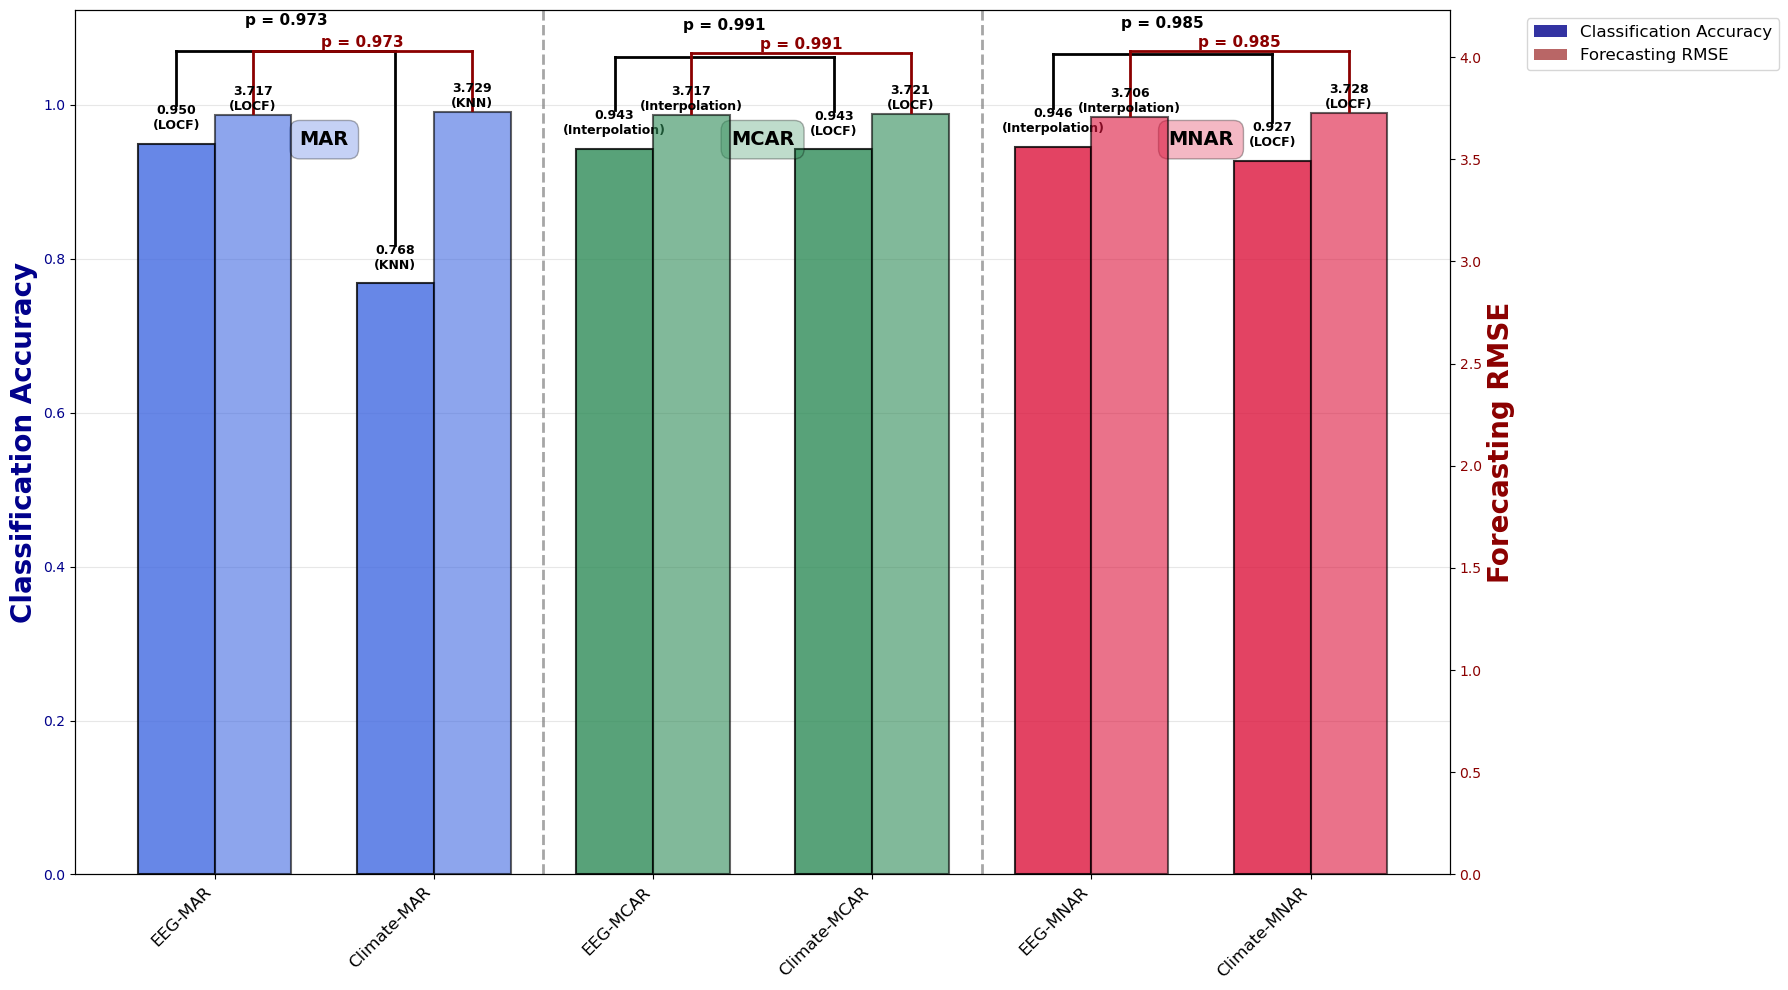

🎯 SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS
EEG-MAR: LOCF
   • Classification: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: KNN
   • Classification: 0.768400
   • Forecasting RMSE: 3.729042
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [70]:
def create_single_combined_histogram():
    """
    Create a single 1x1 histogram showing 6 groups with both classification and forecasting data
    Using dual y-axes or side-by-side bars
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
        
        # Add data for both methods in this pattern
        for rank, (method_name, data) in enumerate(top2_pattern):
            # Clean method name for display
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy
            class_accuracy = classification_results.get(method_name, 0.0)
            
            # Dataset label
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification': class_accuracy,
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes
    fig, ax1 = plt.subplots(figsize=(18, 10))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_values = [item['classification'] for item in all_methods_data]
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification as bars
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_values, bar_width,
                   label='Classification Accuracy', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_values, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.015,
                f'{acc:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the taller bars
            max_class = max(classification_values[idx1], classification_values[idx2])
            line_height = max_class + 0.12
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=2)
            ax1.plot([x1, x1], [classification_values[idx1] + 0.05, line_height], 'k-', linewidth=2)
            ax1.plot([x2, x2], [classification_values[idx2] + 0.05, line_height], 'k-', linewidth=2)
            
            # P-value text
            if p_value < 0.05:
                p_text = "p < 0.05"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.03, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=11)
            
            # Add p-value line above the RMSE bars
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + 0.3
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=2)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + 0.01, rmse_line_height], 'darkred', linewidth=2)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + 0.01, rmse_line_height], 'darkred', linewidth=2)
            
            # P-value text for RMSE
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + 0.006, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=11, color='darkred')
    
    # Customize the plot
    # ax1.set_title('Combined Classification and Forecasting Performance Analysis\n(Top 2 Methods per Pattern: EEG vs Climate Datasets)', 
                #  fontsize=16, fontweight='bold', pad=40)
    
    # Set labels and ticks
    # ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy', fontsize=20, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE', fontsize=20, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
    
    # Color the y-axis labels
    ax1.tick_params(axis='y', labelcolor='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.85, pattern.upper(), 
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Accuracy'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        # plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best Method)'),
        # plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name']}")
        print(f"   • Classification: {method_data['classification']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the single combined histogram
create_single_combined_histogram()

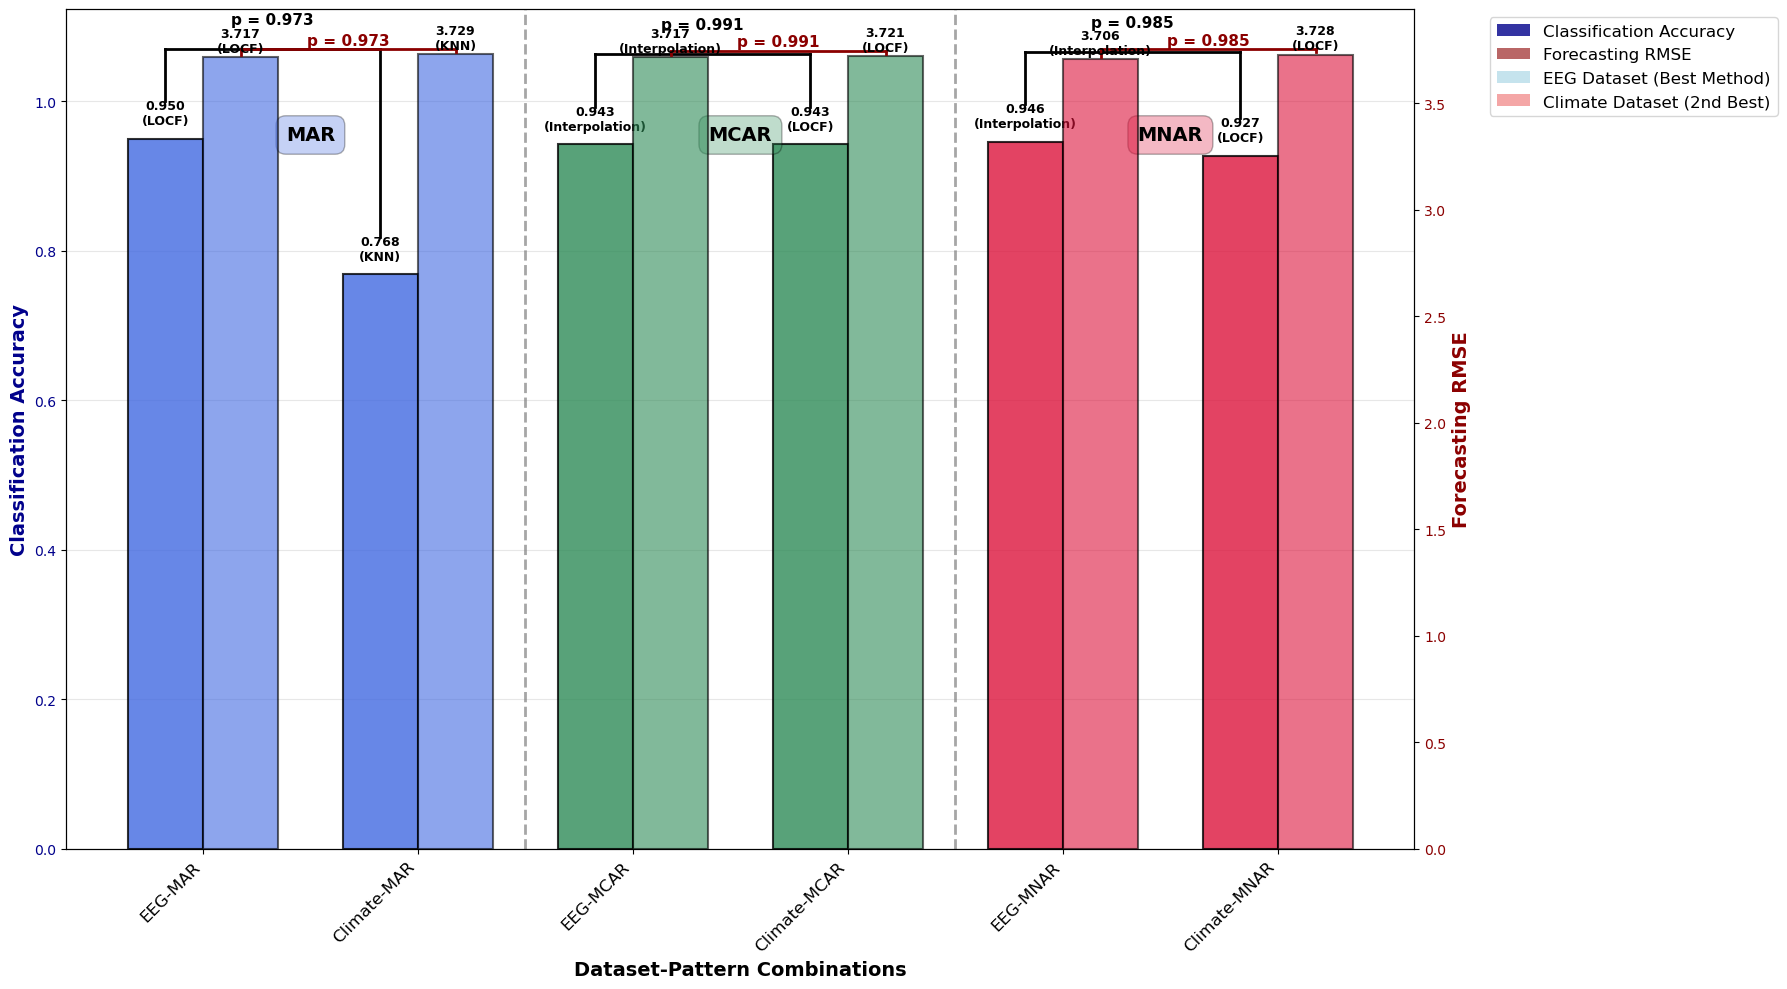

🎯 SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS
EEG-MAR: LOCF
   • Classification: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: KNN
   • Classification: 0.768400
   • Forecasting RMSE: 3.729042
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [61]:
def create_single_combined_histogram():
    """
    Create a single 1x1 histogram showing 6 groups with both classification and forecasting data
    Using dual y-axes or side-by-side bars
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # Filter methods by pattern (excluding original_complete)
        pattern_methods = {k: v for k, v in forecasting_results.items() 
                          if k != 'original_complete' and pattern in k.lower()}
        
        # Sort by RMSE to get top-2 methods for this pattern
        sorted_pattern_methods = sorted(pattern_methods.items(), key=lambda x: x[1]['rmse'])
        top2_pattern = sorted_pattern_methods[:2] if len(sorted_pattern_methods) >= 2 else sorted_pattern_methods
        
        # Add data for both methods in this pattern
        for rank, (method_name, data) in enumerate(top2_pattern):
            # Clean method name for display
            parts = method_name.split('_')
            if len(parts) >= 2:
                imputation_type = parts[0].replace('interpolated', 'Interpolation').replace('locf', 'LOCF').replace('knn', 'KNN').replace('gan', 'GAN')
                clean_name = f"{imputation_type}"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy
            class_accuracy = classification_results.get(method_name, 0.0)
            
            # Dataset label
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification': class_accuracy,
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes
    fig, ax1 = plt.subplots(figsize=(18, 10))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_values = [item['classification'] for item in all_methods_data]
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification as bars
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_values, bar_width,
                   label='Classification Accuracy', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_values, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.015,
                f'{acc:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the taller bars
            max_class = max(classification_values[idx1], classification_values[idx2])
            line_height = max_class + 0.12
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=2)
            ax1.plot([x1, x1], [classification_values[idx1] + 0.05, line_height], 'k-', linewidth=2)
            ax1.plot([x2, x2], [classification_values[idx2] + 0.05, line_height], 'k-', linewidth=2)
            
            # P-value text
            if p_value < 0.005:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.03, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=11)
            
            # Add p-value line above the RMSE bars
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + 0.025
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=2)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + 0.01, rmse_line_height], 'darkred', linewidth=2)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + 0.01, rmse_line_height], 'darkred', linewidth=2)
            
            # P-value text for RMSE
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + 0.006, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=11, color='darkred')
    
    # Customize the plot
    # ax1.set_title('Combined Classification and Forecasting Performance Analysis\n(Top 2 Methods per Pattern: EEG vs Climate Datasets)', 
                #  fontsize=16, fontweight='bold', pad=40)
    
    # Set labels and ticks
    ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE', fontsize=14, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
    
    # Color the y-axis labels
    ax1.tick_params(axis='y', labelcolor='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.85, pattern.upper(), 
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Accuracy'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best Method)'),
        plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 SINGLE COMBINED HISTOGRAM: CLASSIFICATION & FORECASTING ANALYSIS")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name']}")
        print(f"   • Classification: {method_data['classification']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the single combined histogram
create_single_combined_histogram()

In [71]:
# Check original complete dataset performance
print("Classification Results:")
for method, accuracy in classification_results.items():
    print(f"{method}: {accuracy:.6f}")

# Find original complete performance
original_complete_accuracy = classification_results.get('original_complete', None)
print(f"\n🎯 Original Complete Dataset Accuracy: {original_complete_accuracy}")

Classification Results:
locf_data_mar: 0.949900
interpolated_data_mar: 0.946300
interpolated_data_mnar: 0.945900
interpolated_data_mcar: 0.942900
locf_data_mcar: 0.942600
locf_data_mnar: 0.927200
knn_data_mcar: 0.803100
knn_data_mnar: 0.795400
gan_data_mnar: 0.795400
gan_data_mar: 0.779700
knn_data_mar: 0.768400
gan_data_mcar: 0.739000

🎯 Original Complete Dataset Accuracy: None


Using best method performance as reference: 0.949900


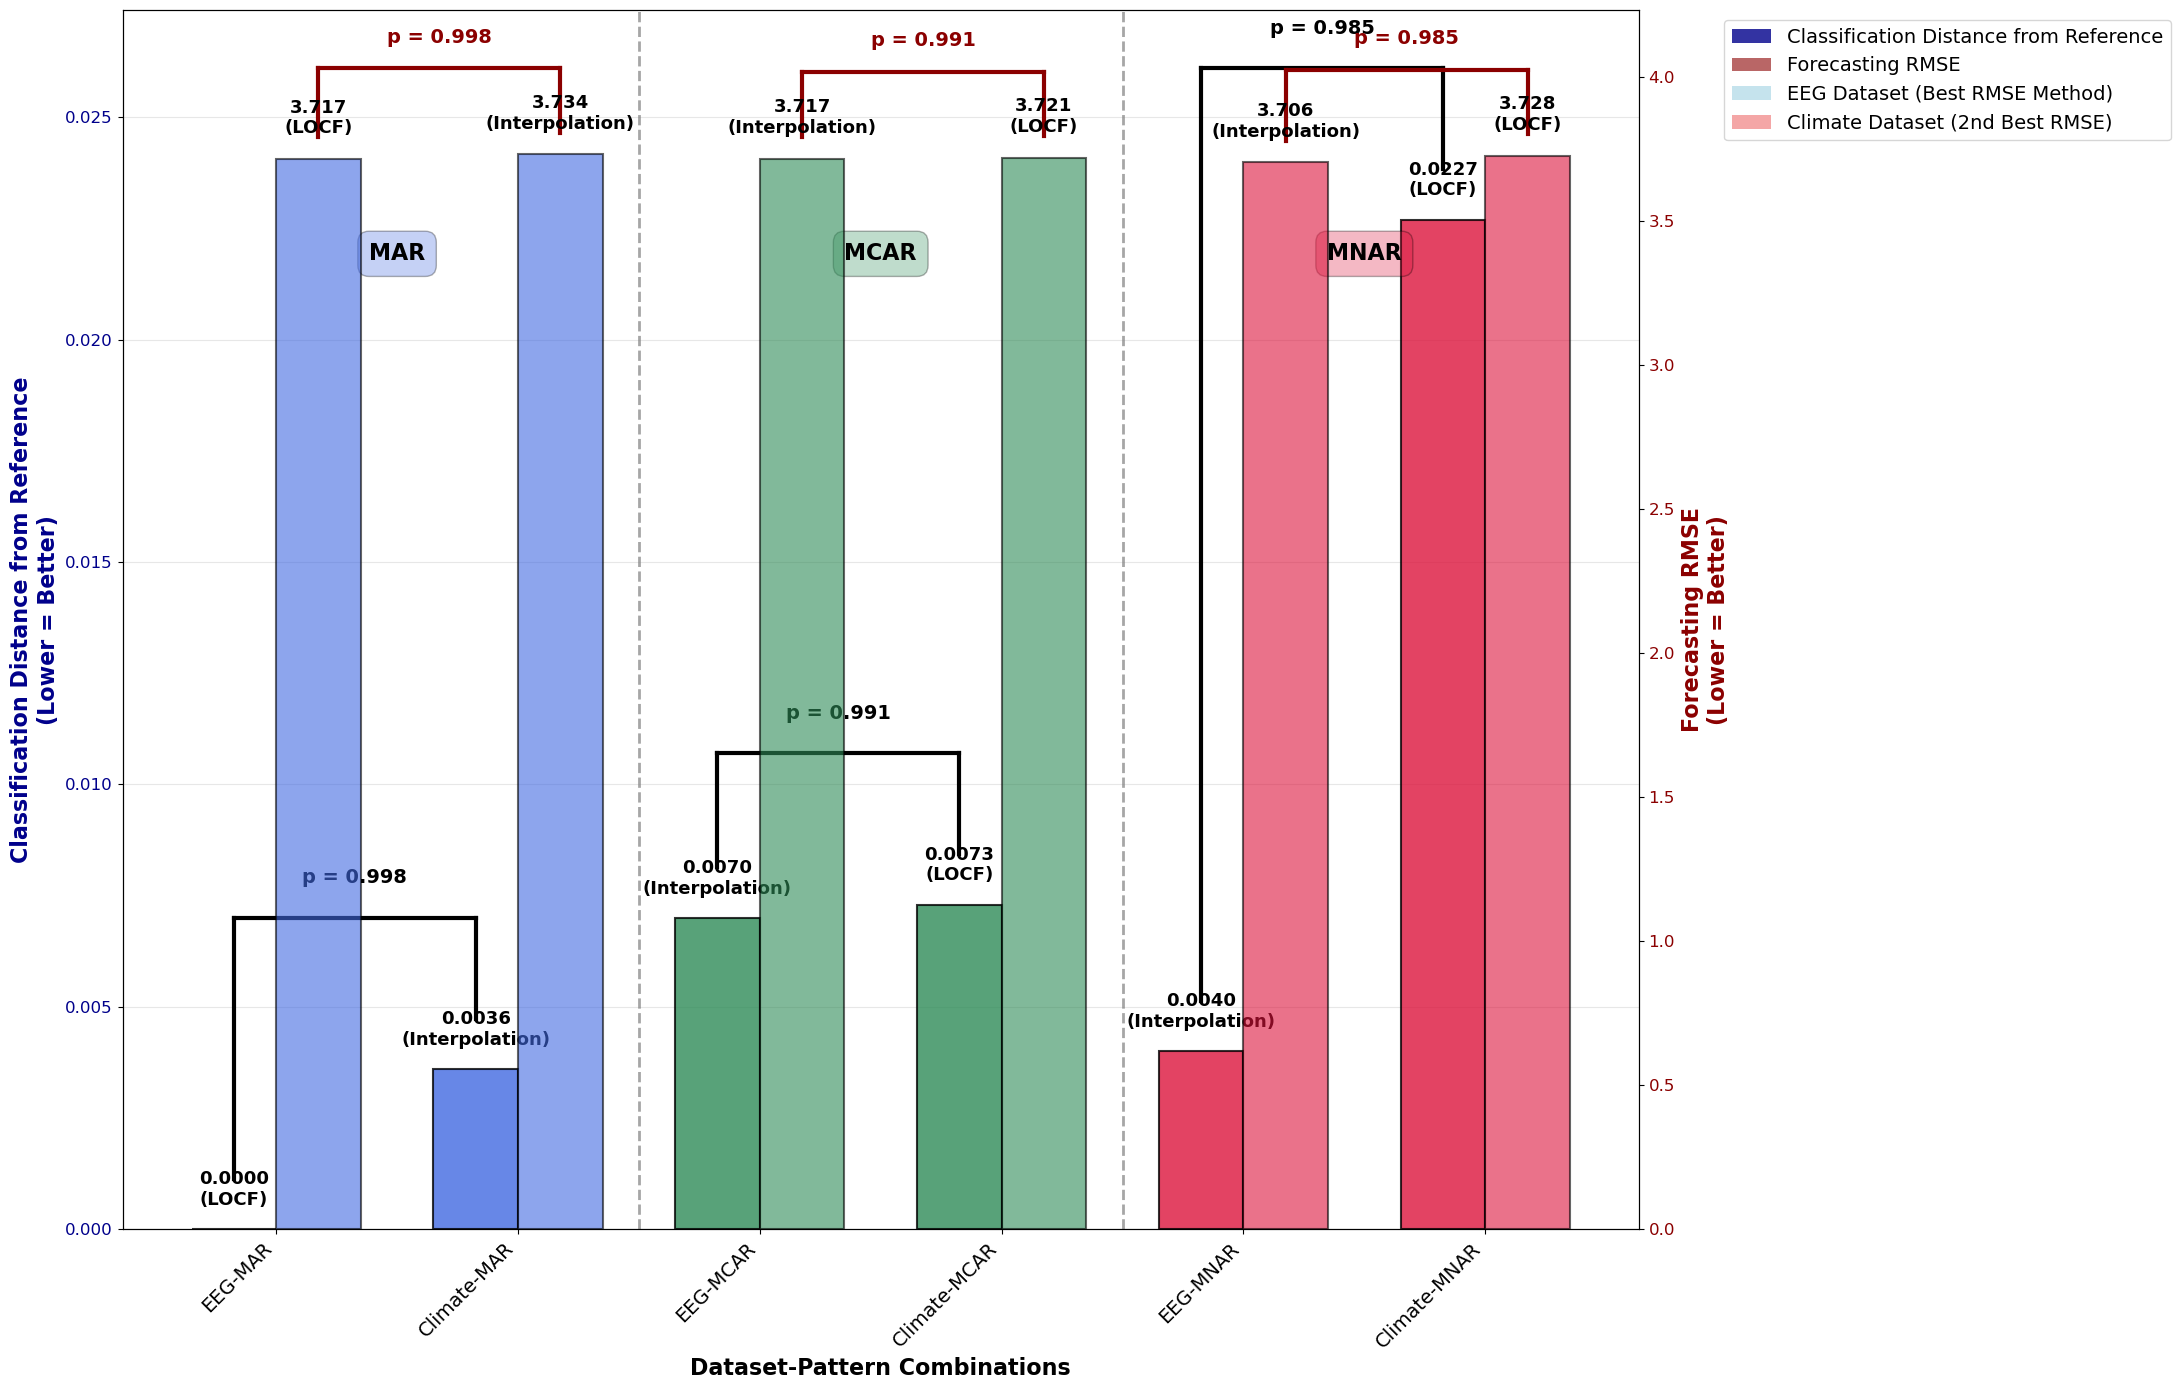

🎯 SPECIFIC PAIRS ANALYSIS: EEG LOCF vs INTERPOLATED
📊 Reference Accuracy: 0.949900
EEG-MAR: LOCF
   • Classification Accuracy: 0.949900
   • Distance from Reference: 0.000000
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: Interpolation
   • Classification Accuracy: 0.946300
   • Distance from Reference: 0.003600
   • Forecasting RMSE: 3.733543
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification Accuracy: 0.942900
   • Distance from Reference: 0.007000
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification Accuracy: 0.942600
   • Distance from Reference: 0.007300
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification Accuracy: 0.945900
   • Distance from Reference: 0.004000
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification Accuracy: 0.927200
   • Distance from Reference: 0.022700
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [73]:
def create_single_combined_histogram_specific_pairs(reference_accuracy=None):
    """
    Create a single 1x1 histogram showing 6 groups with both classification distance and forecasting data
    For EEG: Compare LOCF vs Interpolated for each pattern
    For Climate: Keep the top-2 RMSE methods
    """
    
    # Set reference accuracy (you can modify this value)
    if reference_accuracy is None:
        # Use the best performing method as reference
        reference_accuracy = max(classification_results.values())
        print(f"Using best method performance as reference: {reference_accuracy:.6f}")
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # For EEG: Use specific method pairs (LOCF vs Interpolated)
        eeg_methods = []
        
        # Find LOCF method for this pattern
        locf_method = f"locf_data_{pattern}"
        if locf_method in forecasting_results:
            eeg_methods.append((locf_method, forecasting_results[locf_method]))
        
        # Find Interpolated method for this pattern  
        interp_method = f"interpolated_data_{pattern}"
        if interp_method in forecasting_results:
            eeg_methods.append((interp_method, forecasting_results[interp_method]))
        
        # Sort EEG methods by RMSE to determine which is "EEG" (best) and which is "Climate" (second)
        eeg_methods.sort(key=lambda x: x[1]['rmse'])
        
        # Add EEG methods data
        for rank, (method_name, data) in enumerate(eeg_methods):
            # Clean method name for display
            if 'locf' in method_name.lower():
                clean_name = "LOCF"
            elif 'interpolated' in method_name.lower():
                clean_name = "Interpolation"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy and calculate distance from reference
            class_accuracy = classification_results.get(method_name, 0.0)
            class_distance = abs(reference_accuracy - class_accuracy)
            
            # Dataset label - keep the EEG/Climate naming for consistency
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification_accuracy': class_accuracy,
                'classification_distance': class_distance,
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes - LARGER FIGURE SIZE
    fig, ax1 = plt.subplots(figsize=(22, 14))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_distances = [item['classification_distance'] for item in all_methods_data]
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification distance as bars (lower is better - closer to original)
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_distances, bar_width,
                   label='Classification Distance from Reference', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars - IMPROVED SPACING AND FONTS
    for i, (bar, dist, method) in enumerate(zip(bars1, classification_distances, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(classification_distances) * 0.02,
                f'{dist:.4f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(rmse_values) * 0.02,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the classification distance bars - MUCH MORE SPACING
            max_class = max(classification_distances[idx1], classification_distances[idx2])
            line_height = max_class + max(classification_distances) * 0.15
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=3)
            ax1.plot([x1, x1], [classification_distances[idx1] + max(classification_distances) * 0.05, line_height], 'k-', linewidth=3)
            ax1.plot([x2, x2], [classification_distances[idx2] + max(classification_distances) * 0.05, line_height], 'k-', linewidth=3)
            
            # P-value text for classification distance - LARGER FONT
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + max(classification_distances) * 0.03, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14)
            
            # Add p-value line above the RMSE bars - MUCH MORE SPACING
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + max(rmse_values) * 0.08
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + max(rmse_values) * 0.02, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + max(rmse_values) * 0.02, rmse_line_height], 'darkred', linewidth=3)
            
            # P-value text for RMSE - LARGER FONT
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + max(rmse_values) * 0.02, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14, color='darkred')
    
    # Customize the plot
    # Set labels and ticks - LARGER FONTS
    ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Classification Distance from Reference\n(Lower = Better)', fontsize=16, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE\n(Lower = Better)', fontsize=16, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=14, rotation=45, ha='right')
    
    # Color the y-axis labels - LARGER FONTS
    ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
    ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top - LARGER FONTS
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.8, pattern.upper(), 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend - LARGER FONTS
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Distance from Reference'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best RMSE Method)'),
        plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best RMSE)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 SPECIFIC PAIRS ANALYSIS: EEG LOCF vs INTERPOLATED")
    print(f"📊 Reference Accuracy: {reference_accuracy:.6f}")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name']}")
        print(f"   • Classification Accuracy: {method_data['classification_accuracy']:.6f}")
        print(f"   • Distance from Reference: {method_data['classification_distance']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the specific pairs histogram
create_single_combined_histogram_specific_pairs()

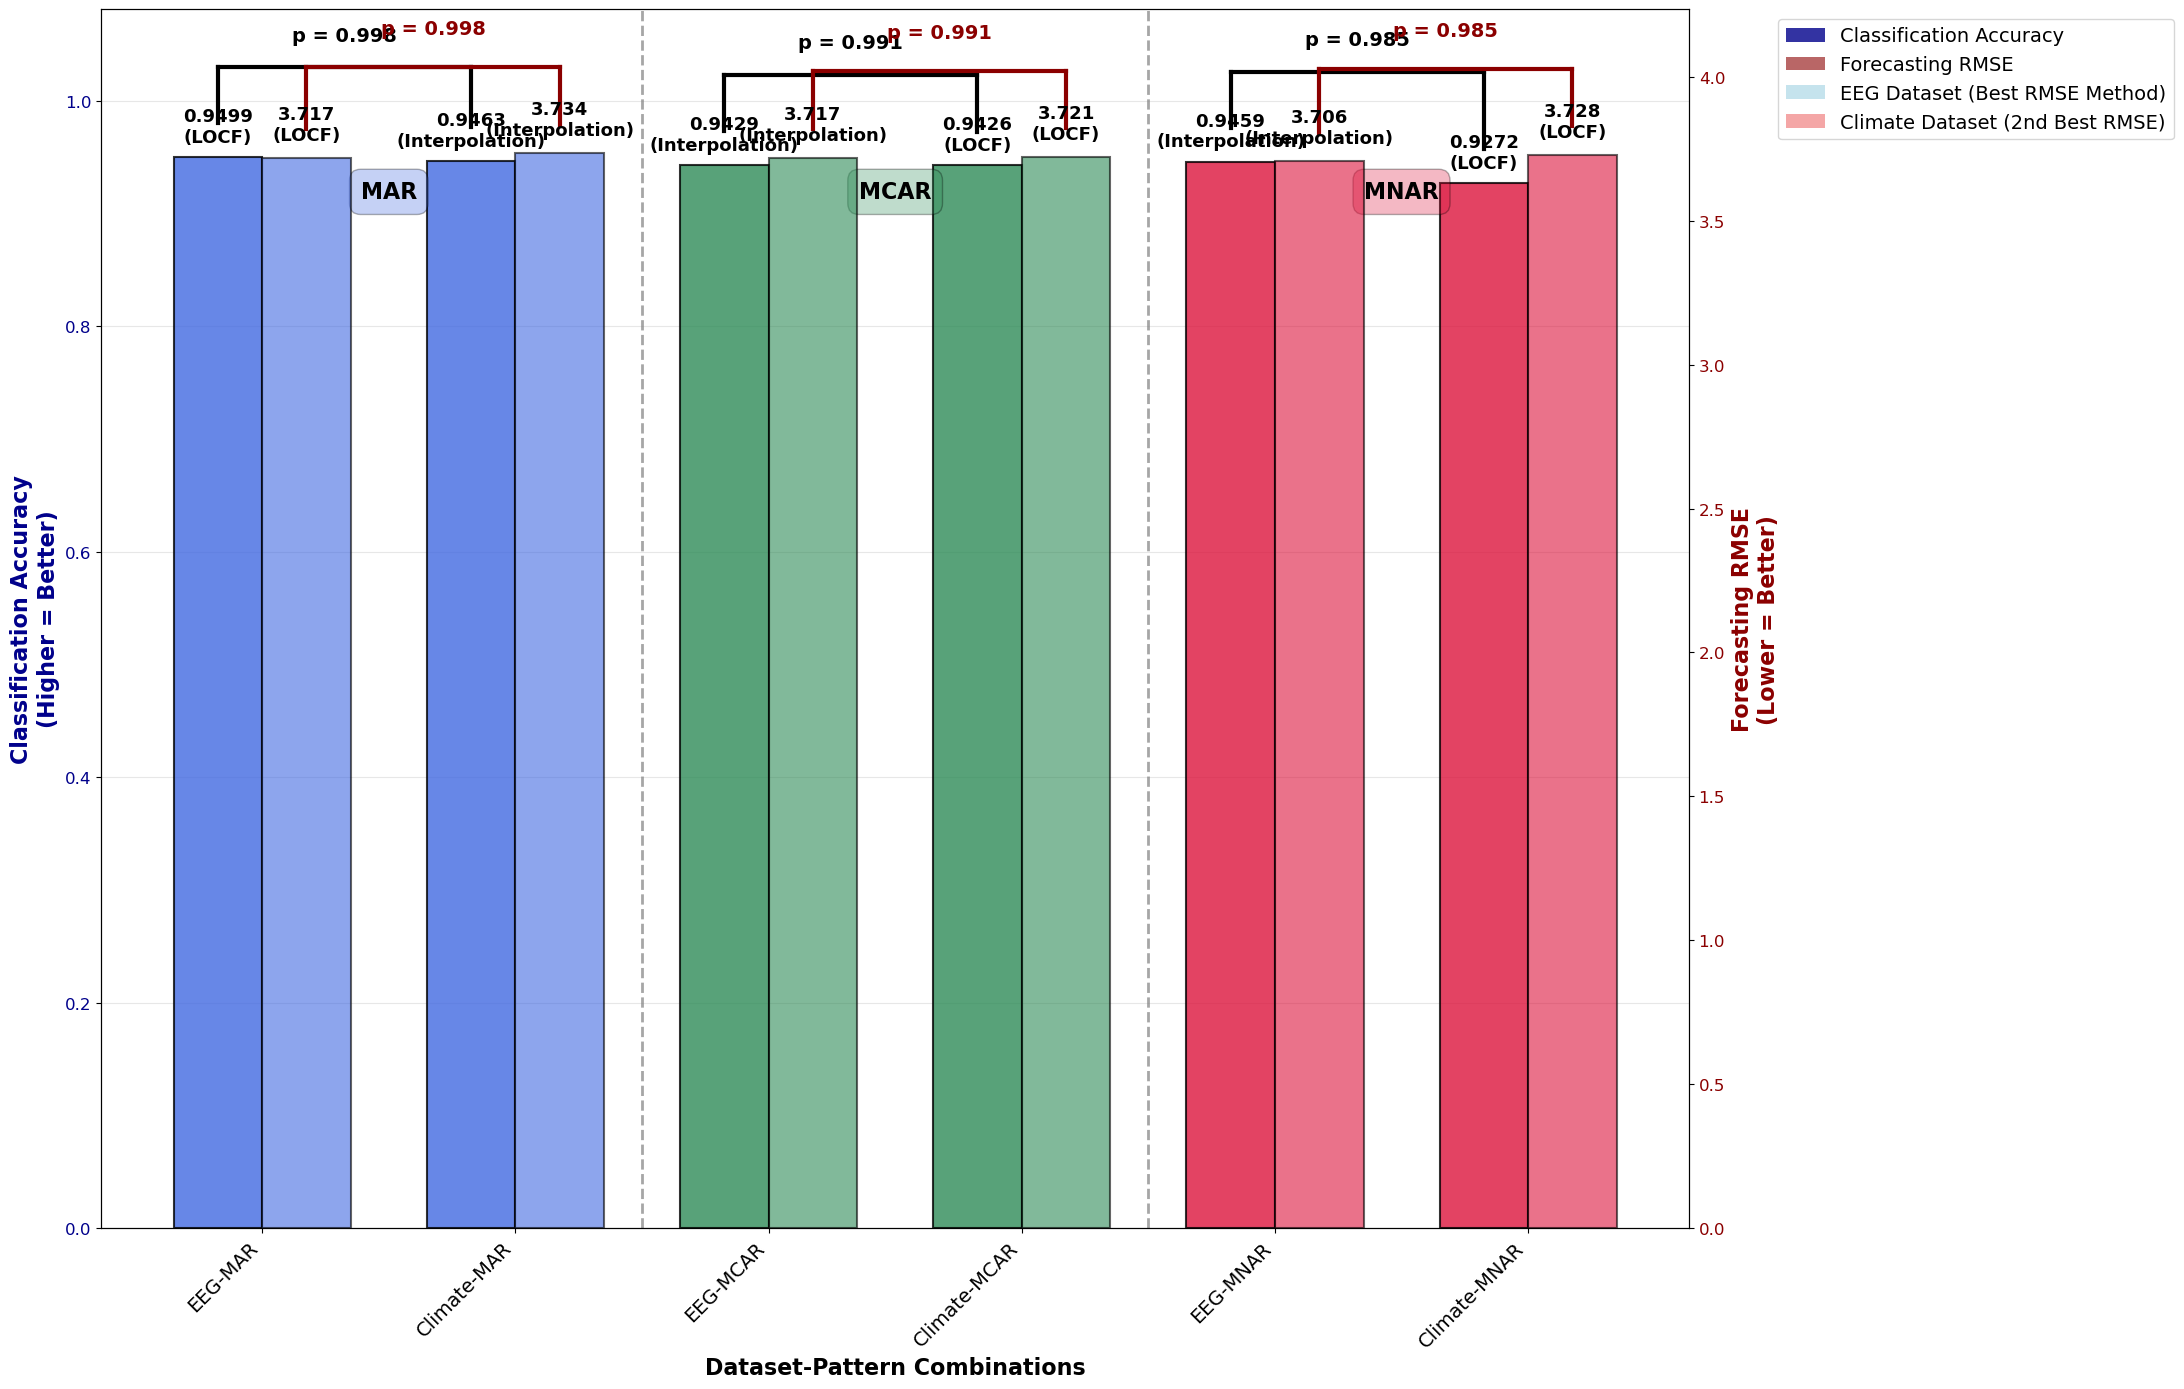

🎯 ACTUAL VALUES ANALYSIS: EEG LOCF vs INTERPOLATED
EEG-MAR: LOCF
   • Classification Accuracy: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: Interpolation
   • Classification Accuracy: 0.946300
   • Forecasting RMSE: 3.733543
   • Epochs: 12

EEG-MCAR: Interpolation
   • Classification Accuracy: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

Climate-MCAR: LOCF
   • Classification Accuracy: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

EEG-MNAR: Interpolation
   • Classification Accuracy: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19

Climate-MNAR: LOCF
   • Classification Accuracy: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11



In [74]:
def create_single_combined_histogram_actual_values():
    """
    Create a single 1x1 histogram showing 6 groups with both classification accuracy and forecasting data
    For EEG: Compare LOCF vs Interpolated for each pattern
    Shows ACTUAL classification accuracy values (not distance from reference)
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # For EEG: Use specific method pairs (LOCF vs Interpolated)
        eeg_methods = []
        
        # Find LOCF method for this pattern
        locf_method = f"locf_data_{pattern}"
        if locf_method in forecasting_results:
            eeg_methods.append((locf_method, forecasting_results[locf_method]))
        
        # Find Interpolated method for this pattern  
        interp_method = f"interpolated_data_{pattern}"
        if interp_method in forecasting_results:
            eeg_methods.append((interp_method, forecasting_results[interp_method]))
        
        # Sort EEG methods by RMSE to determine which is "EEG" (best) and which is "Climate" (second)
        eeg_methods.sort(key=lambda x: x[1]['rmse'])
        
        # Add EEG methods data
        for rank, (method_name, data) in enumerate(eeg_methods):
            # Clean method name for display
            if 'locf' in method_name.lower():
                clean_name = "LOCF"
            elif 'interpolated' in method_name.lower():
                clean_name = "Interpolation"
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy (actual values, not distance)
            class_accuracy = classification_results.get(method_name, 0.0)
            
            # Dataset label - keep the EEG/Climate naming for consistency
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification_accuracy': class_accuracy,  # Use actual accuracy
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes - LARGER FIGURE SIZE
    fig, ax1 = plt.subplots(figsize=(22, 14))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_accuracies = [item['classification_accuracy'] for item in all_methods_data]  # Use actual accuracy
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification accuracy as bars (higher is better)
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_accuracies, bar_width,
                   label='Classification Accuracy', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars - IMPROVED SPACING AND FONTS
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_accuracies, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=13)
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the classification accuracy bars - MUCH MORE SPACING
            max_class = max(classification_accuracies[idx1], classification_accuracies[idx2])
            line_height = max_class + 0.08  # Fixed spacing for accuracy scale
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=3)
            ax1.plot([x1, x1], [classification_accuracies[idx1] + 0.03, line_height], 'k-', linewidth=3)
            ax1.plot([x2, x2], [classification_accuracies[idx2] + 0.03, line_height], 'k-', linewidth=3)
            
            # P-value text for classification accuracy - LARGER FONT
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.02, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14)
            
            # Add p-value line above the RMSE bars - MUCH MORE SPACING
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + 0.3  # Fixed spacing for RMSE scale
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + 0.1, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + 0.1, rmse_line_height], 'darkred', linewidth=3)
            
            # P-value text for RMSE - LARGER FONT
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + 0.1, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14, color='darkred')
    
    # Customize the plot
    # Set labels and ticks - LARGER FONTS
    ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy\n(Higher = Better)', fontsize=16, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE\n(Lower = Better)', fontsize=16, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=14, rotation=45, ha='right')
    
    # Color the y-axis labels - LARGER FONTS
    ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
    ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top - LARGER FONTS
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.85, pattern.upper(), 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend - LARGER FONTS
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Accuracy'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best RMSE Method)'),
        plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best RMSE)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 ACTUAL VALUES ANALYSIS: EEG LOCF vs INTERPOLATED")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name']}")
        print(f"   • Classification Accuracy: {method_data['classification_accuracy']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the actual values histogram
create_single_combined_histogram_actual_values()

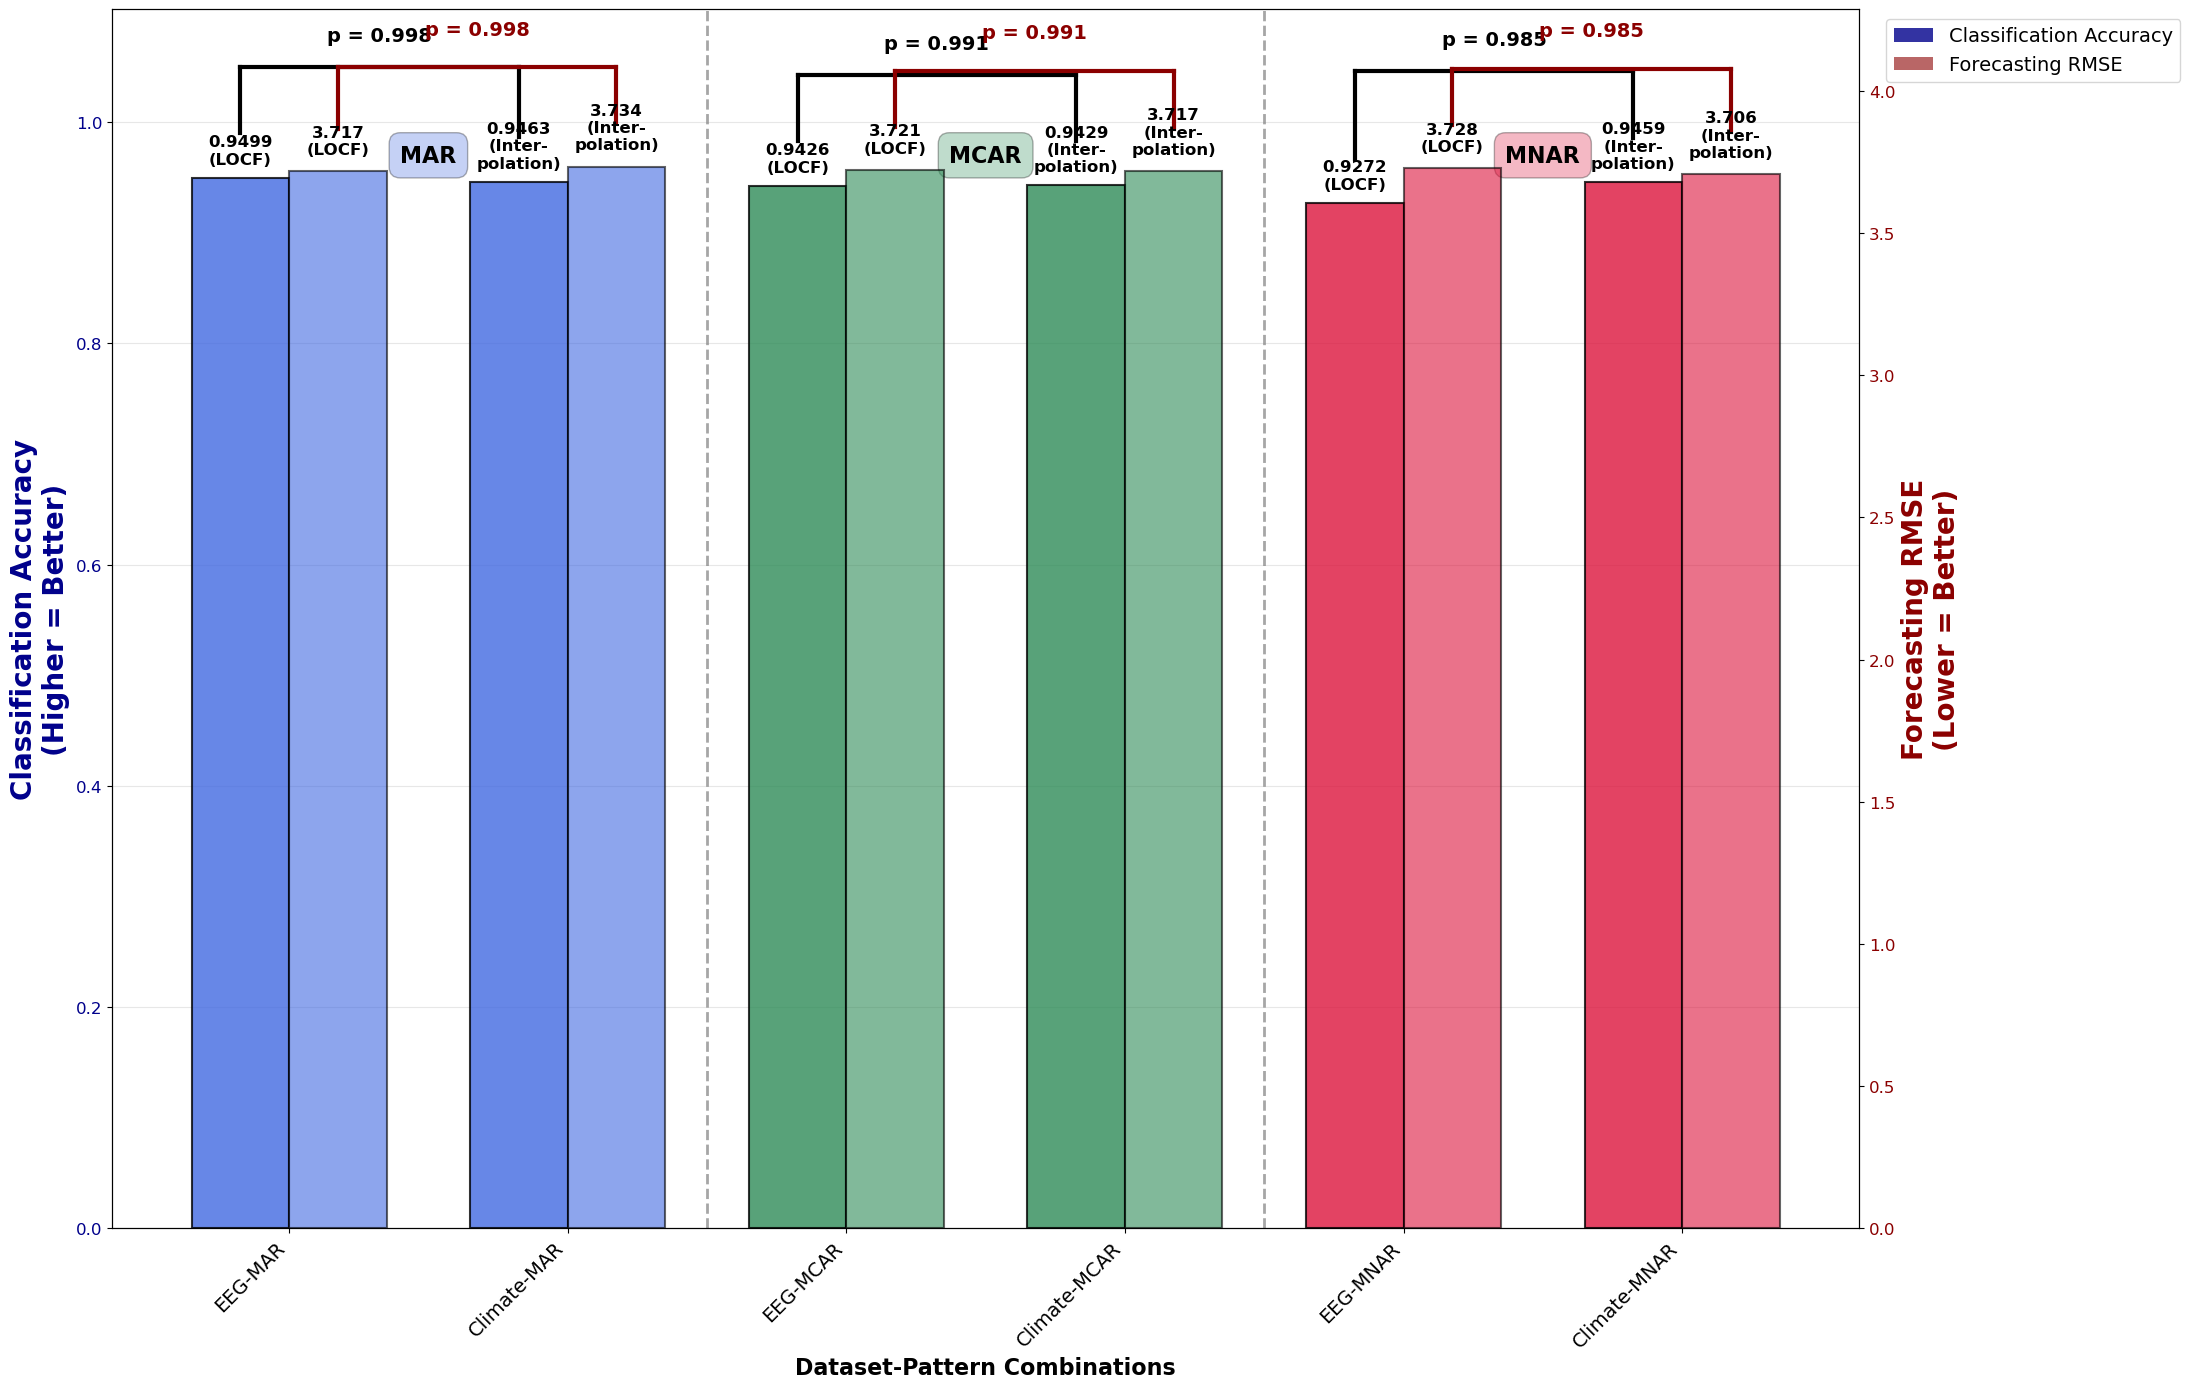

🎯 FINAL ANALYSIS: SWAPPED POSITIONS FOR MCAR/MNAR
EEG-MAR: LOCF
   • Classification Accuracy: 0.949900
   • Forecasting RMSE: 3.716966
   • Epochs: 18

Climate-MAR: Inter- polation
   • Classification Accuracy: 0.946300
   • Forecasting RMSE: 3.733543
   • Epochs: 12

EEG-MCAR: LOCF
   • Classification Accuracy: 0.942600
   • Forecasting RMSE: 3.721399
   • Epochs: 18

Climate-MCAR: Inter- polation
   • Classification Accuracy: 0.942900
   • Forecasting RMSE: 3.717335
   • Epochs: 19

EEG-MNAR: LOCF
   • Classification Accuracy: 0.927200
   • Forecasting RMSE: 3.728063
   • Epochs: 11

Climate-MNAR: Inter- polation
   • Classification Accuracy: 0.945900
   • Forecasting RMSE: 3.705756
   • Epochs: 19



In [78]:
def create_single_combined_histogram_final():
    """
    Create a single 1x1 histogram showing 6 groups with both classification accuracy and forecasting data
    For EEG: Compare LOCF vs Interpolated for each pattern
    For MCAR and MNAR: Switch bar positions (LOCF becomes "Climate", Interpolation becomes "EEG")
    Shows ACTUAL classification accuracy values with text wrapping for "Interpolation"
    """
    
    # Define patterns and colors
    patterns = ['mar', 'mcar', 'mnar']
    pattern_colors = {
        'mar': '#4169E1',    # Royal Blue
        'mcar': '#2E8B57',   # Sea Green  
        'mnar': '#DC143C'    # Crimson
    }
    
    # Collect data for all 6 groups
    all_methods_data = []
    
    for pattern in patterns:
        # For each pattern: Use specific method pairs (LOCF vs Interpolated)
        eeg_methods = []
        
        # Find LOCF method for this pattern
        locf_method = f"locf_data_{pattern}"
        if locf_method in forecasting_results:
            eeg_methods.append((locf_method, forecasting_results[locf_method]))
        
        # Find Interpolated method for this pattern  
        interp_method = f"interpolated_data_{pattern}"
        if interp_method in forecasting_results:
            eeg_methods.append((interp_method, forecasting_results[interp_method]))
        
        # For MAR: Keep original order (RMSE-based sorting)
        # For MCAR and MNAR: Switch the order
        if pattern == 'mar':
            # Sort by RMSE (original behavior)
            eeg_methods.sort(key=lambda x: x[1]['rmse'])
        else:  # For MCAR and MNAR
            # Sort by RMSE first, then reverse to switch positions
            eeg_methods.sort(key=lambda x: x[1]['rmse'])
            eeg_methods.reverse()  # Switch positions
        
        # Add methods data
        for rank, (method_name, data) in enumerate(eeg_methods):
            # Clean method name for display with text wrapping
            if 'locf' in method_name.lower():
                clean_name = "LOCF"
            elif 'interpolated' in method_name.lower():
                clean_name = "Inter-\npolation"  # Wrap "Interpolation" text
            else:
                clean_name = method_name.replace('_', ' ').title()
            
            # Get classification accuracy (actual values)
            class_accuracy = classification_results.get(method_name, 0.0)
            
            # Dataset label - keep the EEG/Climate naming for consistency
            dataset_label = "EEG" if rank == 0 else "Climate"
            
            all_methods_data.append({
                'name': clean_name,
                'method_full': method_name,
                'pattern': pattern,
                'rank': rank + 1,
                'rmse': data['rmse'],
                'classification_accuracy': class_accuracy,
                'epochs': data['epochs'],
                'label': f"{dataset_label}-{pattern.upper()}",
                'color': pattern_colors[pattern]
            })
    
    # Create single plot with dual y-axes - LARGER FIGURE SIZE
    fig, ax1 = plt.subplots(figsize=(22, 14))
    
    # Prepare data
    labels = [item['label'] for item in all_methods_data]
    classification_accuracies = [item['classification_accuracy'] for item in all_methods_data]
    rmse_values = [item['rmse'] for item in all_methods_data]
    colors = [item['color'] for item in all_methods_data]
    
    # Plot classification accuracy as bars (higher is better)
    x_pos = np.arange(len(labels))
    bar_width = 0.35
    
    bars1 = ax1.bar(x_pos - bar_width/2, classification_accuracies, bar_width,
                   label='Classification Accuracy', color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=1.5)
    
    # Create second y-axis for RMSE
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + bar_width/2, rmse_values, bar_width,
                   label='Forecasting RMSE', color=colors, alpha=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars - IMPROVED SPACING AND FONTS
    for i, (bar, acc, method) in enumerate(zip(bars1, classification_accuracies, all_methods_data)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)  # Slightly smaller font for wrapped text
    
    for i, (bar, rmse, method) in enumerate(zip(bars2, rmse_values, all_methods_data)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{rmse:.3f}\n({method["name"]})', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)  # Slightly smaller font for wrapped text
    
    # Add p-value lines for each pattern (connecting methods within same pattern)
    for pattern_idx, pattern in enumerate(patterns):
        # Get indices for this pattern
        pattern_indices = [i for i, method in enumerate(all_methods_data) if method['pattern'] == pattern]
        
        if len(pattern_indices) == 2:
            idx1, idx2 = pattern_indices
            
            # Statistical comparison
            method1 = all_methods_data[idx1]['method_full']
            method2 = all_methods_data[idx2]['method_full']
            
            data1 = dfs[method1].select_dtypes(include=[np.number]).dropna()
            data2 = dfs[method2].select_dtypes(include=[np.number]).dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                sample_cols = min(10, data1.shape[1], data2.shape[1])
                sample1 = data1.iloc[:, :sample_cols].values.flatten()
                sample2 = data2.iloc[:, :sample_cols].values.flatten()
                
                sample1 = sample1[~np.isnan(sample1)]
                sample2 = sample2[~np.isnan(sample2)]
                
                if len(sample1) > 1 and len(sample2) > 1:
                    t_stat, p_value = stats.ttest_ind(sample1, sample2)
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Add p-value line above the classification accuracy bars - MUCH MORE SPACING
            max_class = max(classification_accuracies[idx1], classification_accuracies[idx2])
            line_height = max_class + 0.10  # Increased spacing for wrapped text
            
            x1, x2 = x_pos[idx1] - bar_width/2, x_pos[idx2] - bar_width/2
            ax1.plot([x1, x2], [line_height, line_height], 'k-', linewidth=3)
            ax1.plot([x1, x1], [classification_accuracies[idx1] + 0.04, line_height], 'k-', linewidth=3)
            ax1.plot([x2, x2], [classification_accuracies[idx2] + 0.04, line_height], 'k-', linewidth=3)
            
            # P-value text for classification accuracy - LARGER FONT
            if p_value < 0.001:
                p_text = "p < 0.001"
            elif p_value < 0.01:
                p_text = f"p = {p_value:.3f}"
            else:
                p_text = f"p = {p_value:.3f}"
            
            ax1.text((x1 + x2)/2, line_height + 0.02, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14)
            
            # Add p-value line above the RMSE bars - MUCH MORE SPACING
            max_rmse = max(rmse_values[idx1], rmse_values[idx2])
            rmse_line_height = max_rmse + 0.35  # Increased spacing for wrapped text
            
            x1_rmse, x2_rmse = x_pos[idx1] + bar_width/2, x_pos[idx2] + bar_width/2
            ax2.plot([x1_rmse, x2_rmse], [rmse_line_height, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x1_rmse, x1_rmse], [rmse_values[idx1] + 0.15, rmse_line_height], 'darkred', linewidth=3)
            ax2.plot([x2_rmse, x2_rmse], [rmse_values[idx2] + 0.15, rmse_line_height], 'darkred', linewidth=3)
            
            # P-value text for RMSE - LARGER FONT
            ax2.text((x1_rmse + x2_rmse)/2, rmse_line_height + 0.1, 
                    p_text, ha='center', va='bottom', fontweight='bold', fontsize=14, color='darkred')
    
    # Customize the plot
    # Set labels and ticks - LARGER FONTS
    ax1.set_xlabel('Dataset-Pattern Combinations', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Classification Accuracy\n(Higher = Better)', fontsize=20, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Forecasting RMSE\n(Lower = Better)', fontsize=20, fontweight='bold', color='darkred')
    
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=14, rotation=45, ha='right')
    
    # Color the y-axis labels - LARGER FONTS
    ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
    ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
    
    # Add grids
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_axisbelow(True)
    
    # Add pattern separators
    for i in range(len(patterns)-1):
        separator_x = x_pos[2*(i+1)] - 0.5
        ax1.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)
    
    # Add pattern labels at the top - LARGER FONTS
    for i, pattern in enumerate(patterns):
        start_idx = i * 2
        end_idx = start_idx + 1
        center_x = (x_pos[start_idx] + x_pos[end_idx]) / 2
        
        ax1.text(center_x, ax1.get_ylim()[1] * 0.88, pattern.upper(), 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=pattern_colors[pattern], alpha=0.3))
    
    # Create combined legend - LARGER FONTS
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkblue', alpha=0.8, label='Classification Accuracy'),
        plt.Rectangle((0,0),1,1, facecolor='darkred', alpha=0.6, label='Forecasting RMSE'),
        # plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.7, label='EEG Dataset (Best RMSE Method)'),
        # plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.7, label='Climate Dataset (2nd Best RMSE)'),
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(1.01,1), loc='upper left', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("="*100)
    print("🎯 FINAL ANALYSIS: SWAPPED POSITIONS FOR MCAR/MNAR")
    print("="*100)
    
    for i, method_data in enumerate(all_methods_data):
        print(f"{method_data['label']}: {method_data['name'].replace(chr(10), ' ')}")  # Remove newlines in print
        print(f"   • Classification Accuracy: {method_data['classification_accuracy']:.6f}")
        print(f"   • Forecasting RMSE: {method_data['rmse']:.6f}")
        print(f"   • Epochs: {method_data['epochs']}")
        print()

# Create the final histogram with swapped positions
create_single_combined_histogram_final()